In [1]:
# HOUSE PRICE PROJECT

##### This is a training project for me. The dataset is downloaded from Kaggle and the code was written on my local desktop.
##### The following kernels were extremely helpful and inspiring in doing the project:

##### https://www.kaggle.com/code/serigne/stacked-regressions-top-4-on-leaderboard
##### https://www.kaggle.com/code/pmarcelino/comprehensive-data-exploration-with-python/notebook

##### the results were submitted to kaggle competition and were placed within the top 10% on May 25 - 2022.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# import tqdm as tqdm
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats

In [3]:
# loading datasets

train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')
train['train_test'] = 1
test['train_test'] = 0
all_data = pd.concat ([train,test])
train.SalePrice.describe()
# train.shape
train.shape

(1460, 82)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

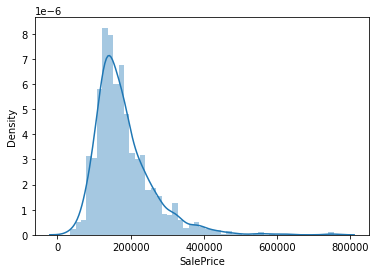

In [4]:
# train.info()
train.describe()
sns.distplot(train['SalePrice'])

In [5]:
print("Skewness: %f" % train['SalePrice'].skew())

#first we normalize SalePrice with lognorm (later on we turn it back with exponential function before submission of the results)

train['SalePrice'] = np.log1p(train["SalePrice"])

Skewness: 1.882876


In [6]:
# separation of numerical and categorical columns
non_numerics = train.loc[:,train.dtypes==np.object]
numerics = train.loc[:,train.dtypes!=np.object]
# non_numerics.Neighborhood.unique()

C:\Users\Pouria\AppData\Local\Temp/ipykernel_11920/724434942.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  non_numerics = train.loc[:,train.dtypes==np.object]
C:\Users\Pouria\AppData\Local\Temp/ipykernel_11920/724434942.py:3: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  numerics = train.loc[:,train.dtypes!=np.object]


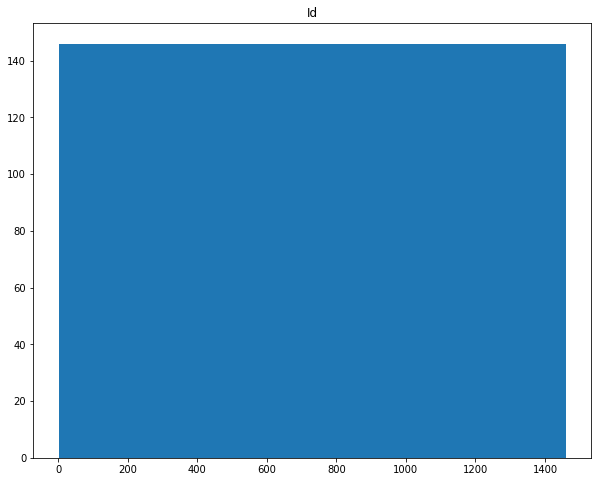

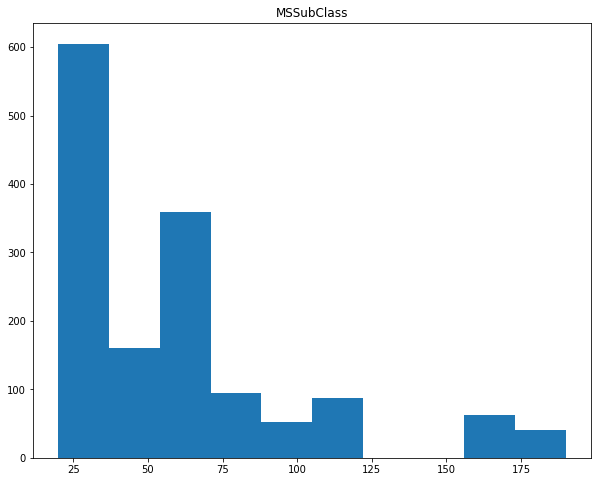

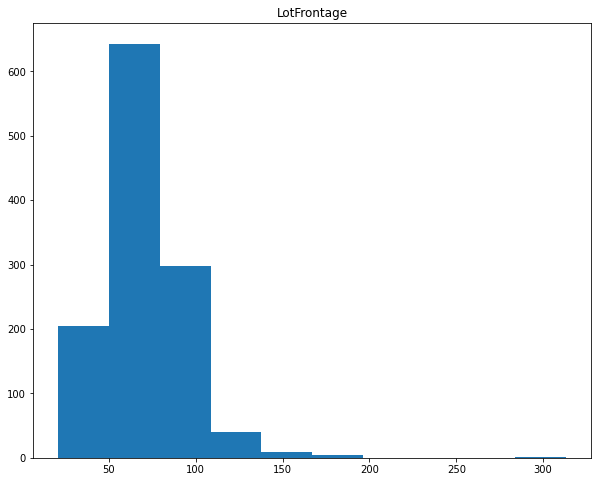

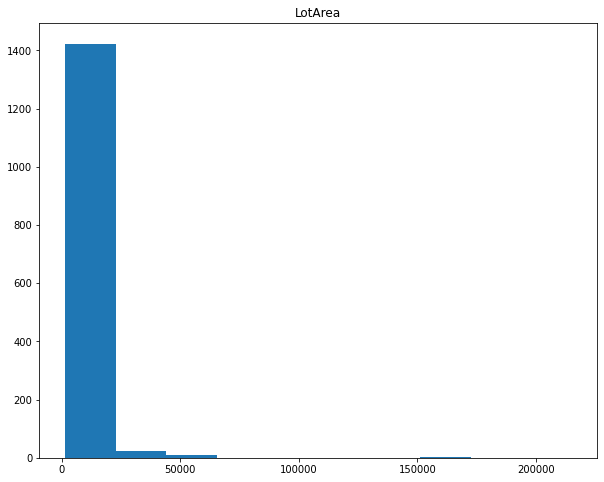

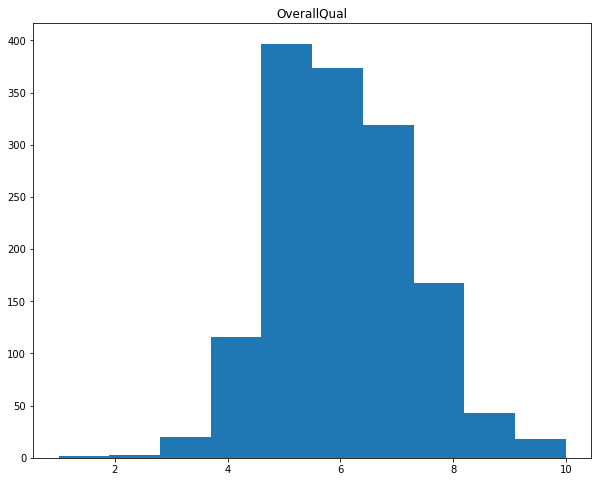

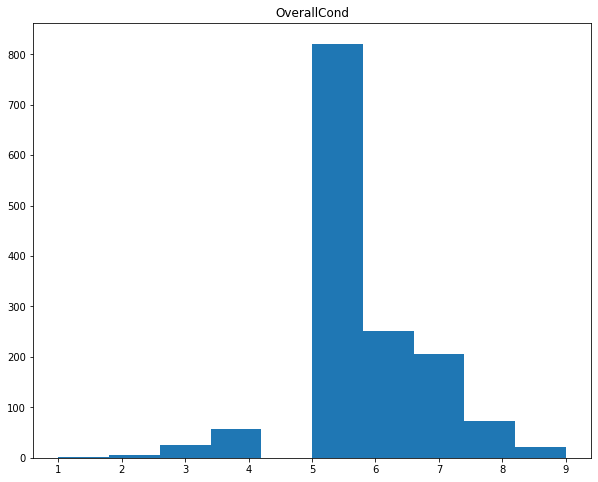

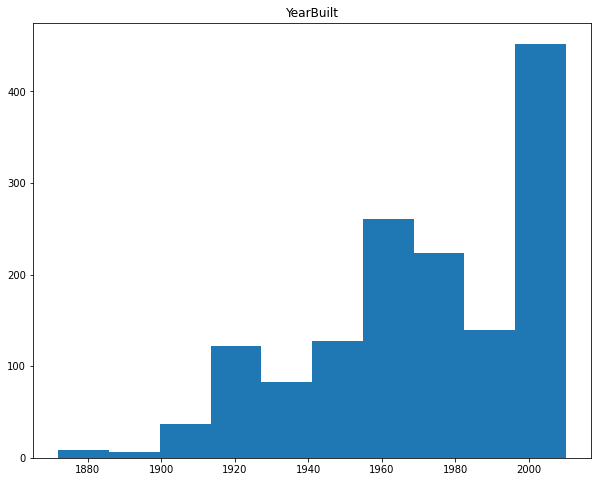

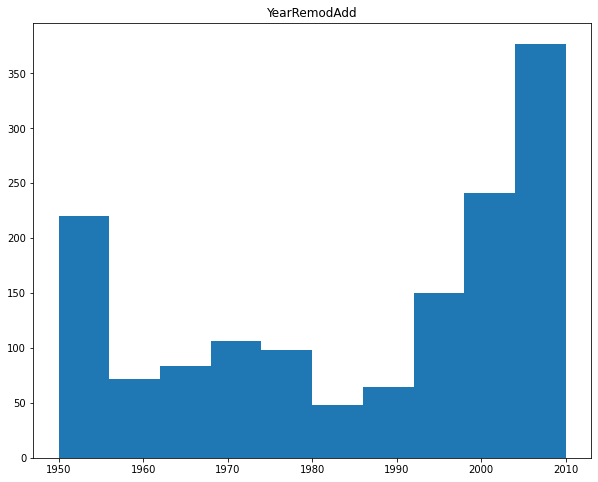

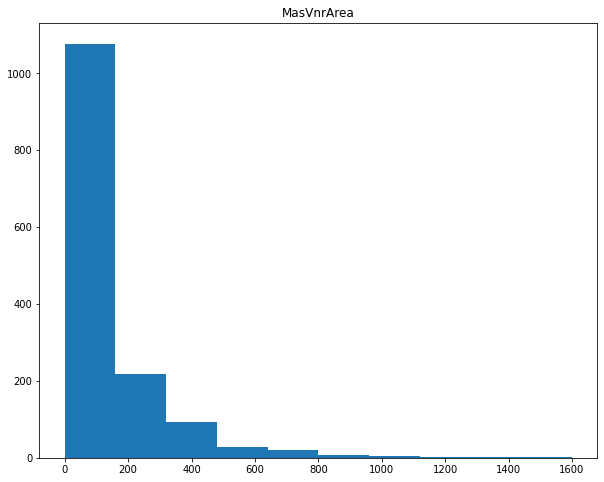

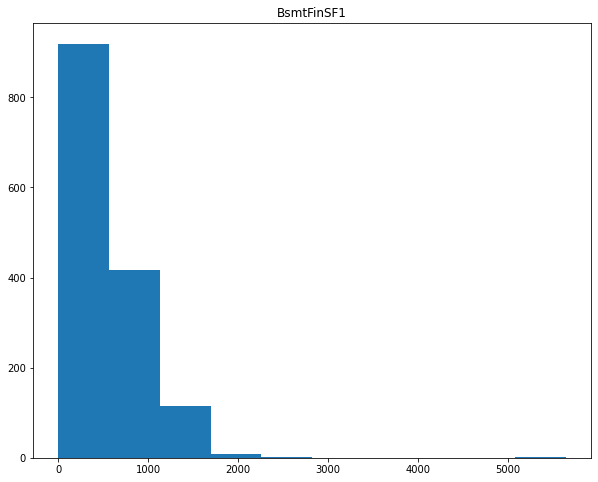

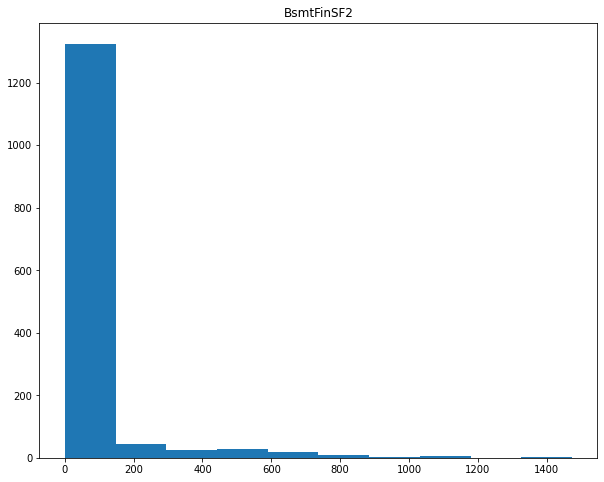

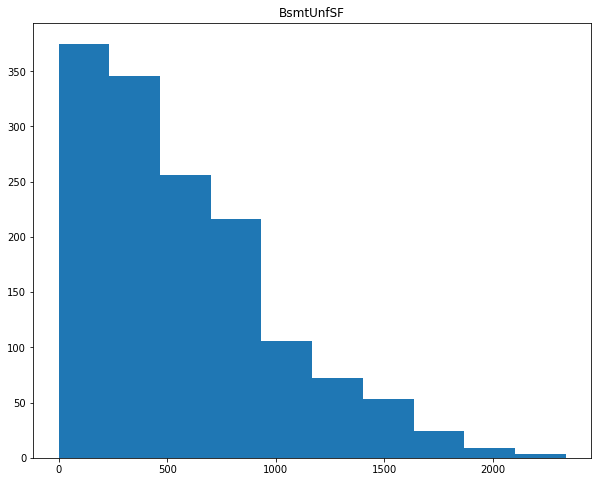

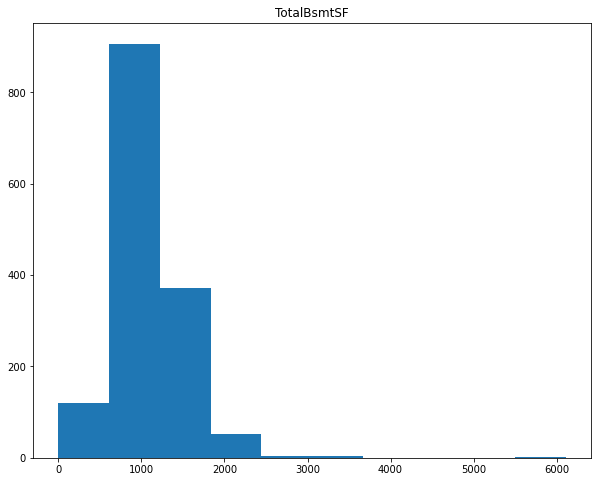

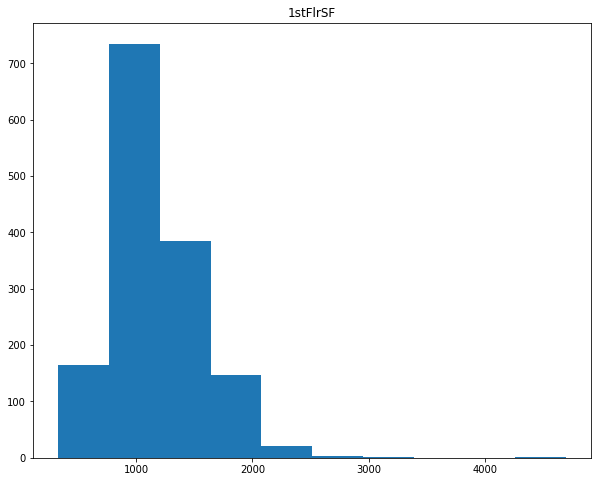

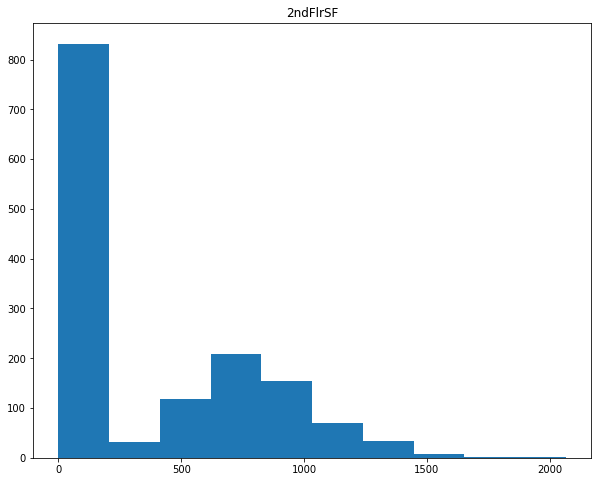

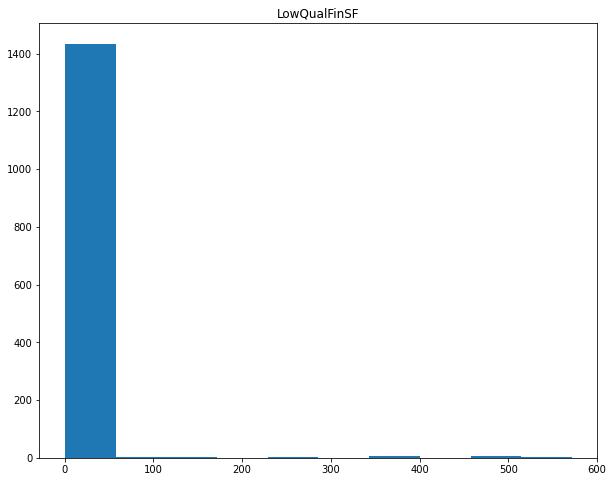

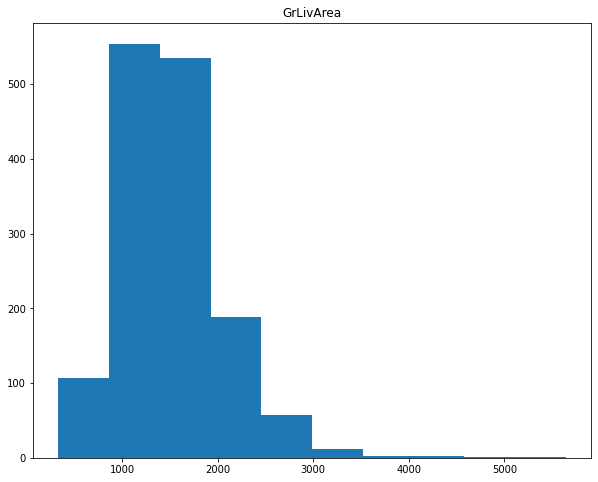

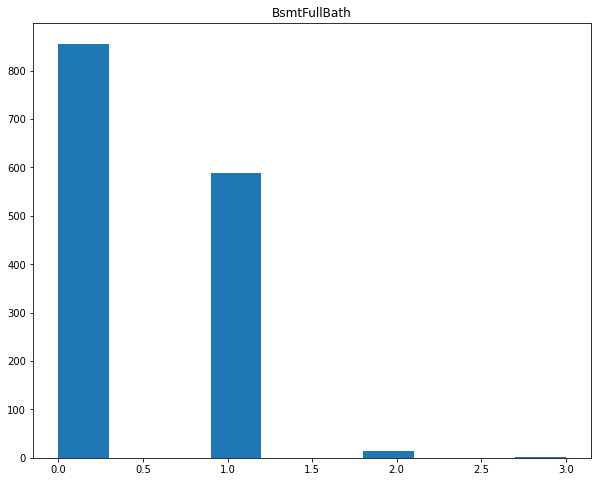

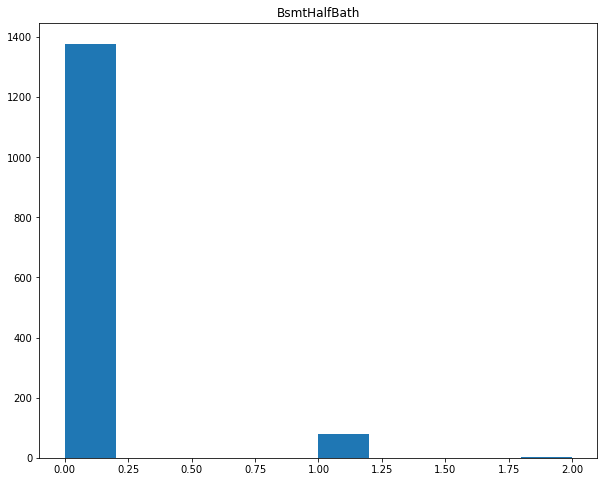

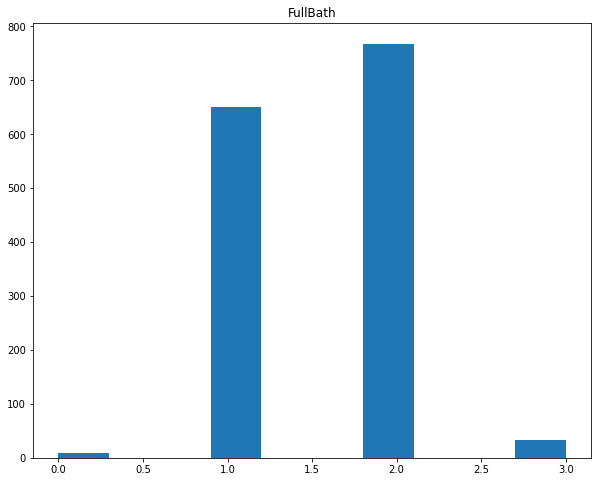

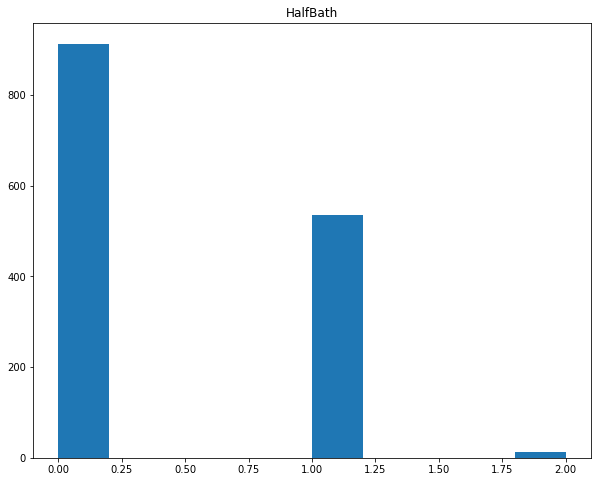

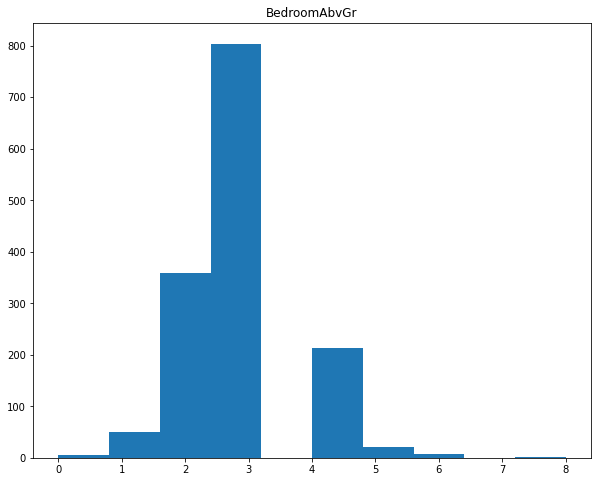

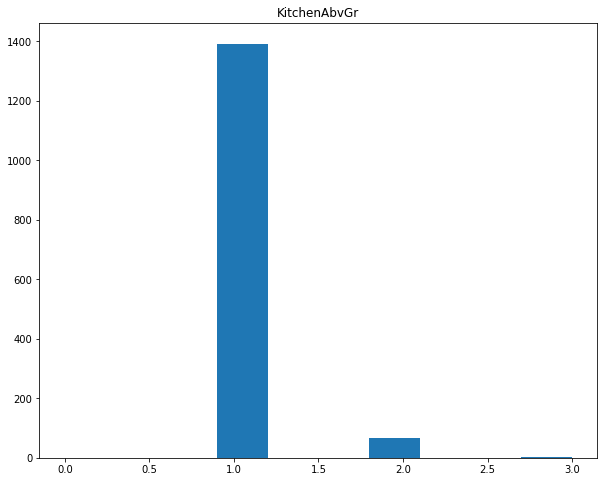

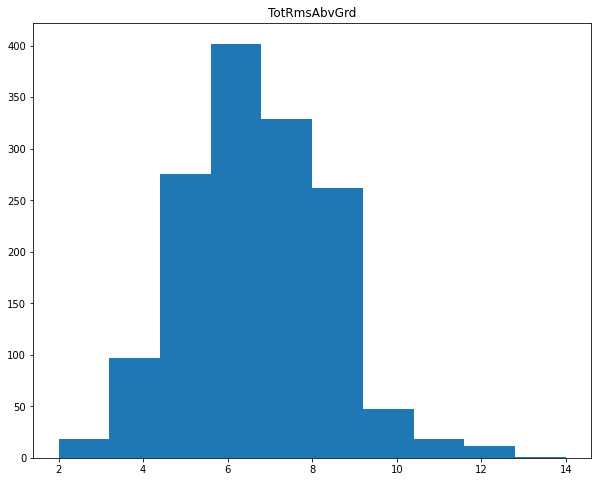

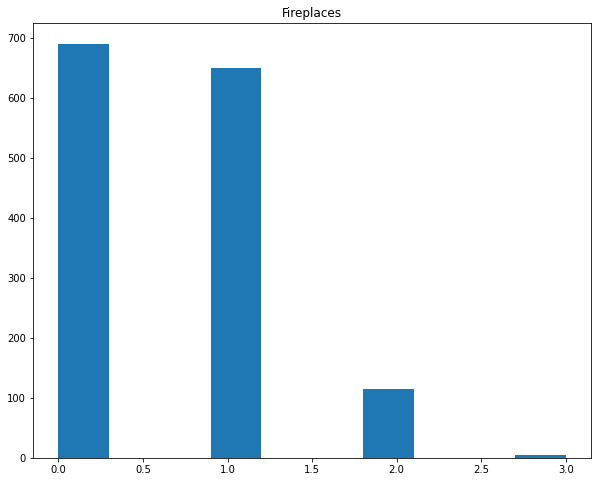

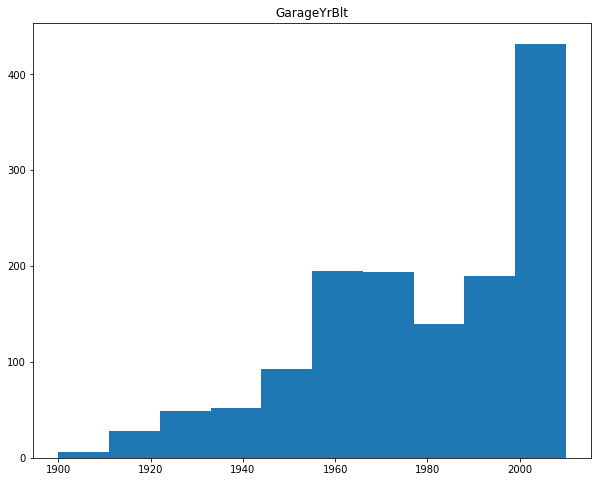

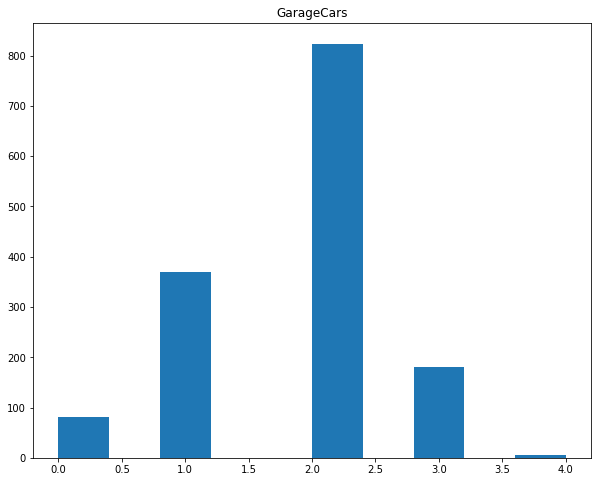

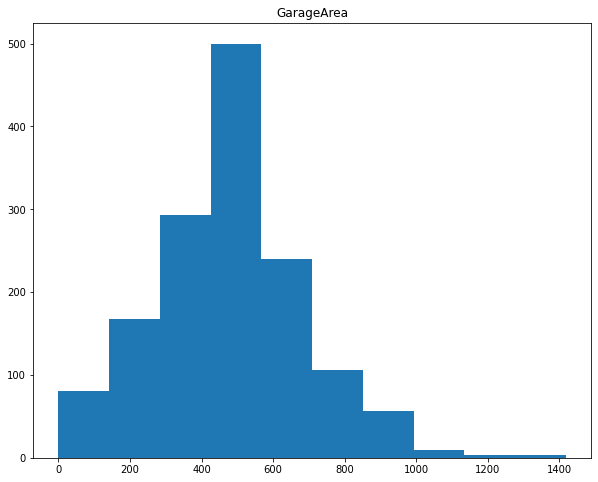

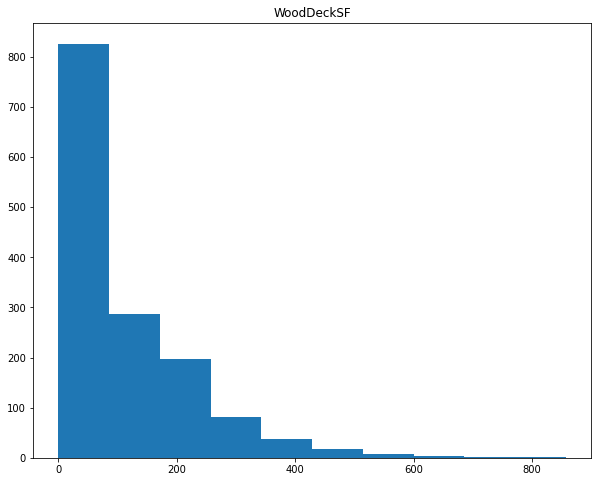

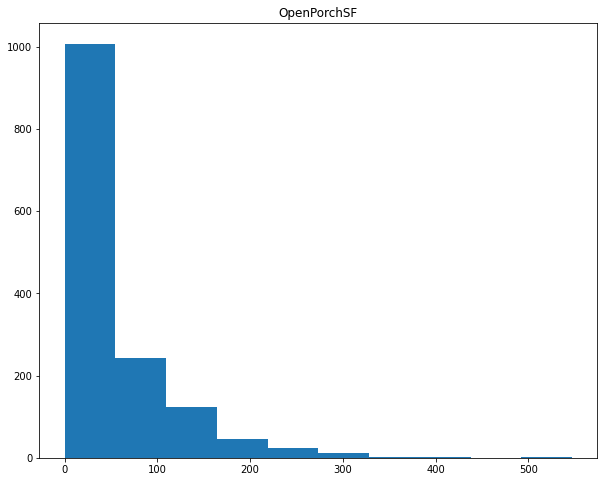

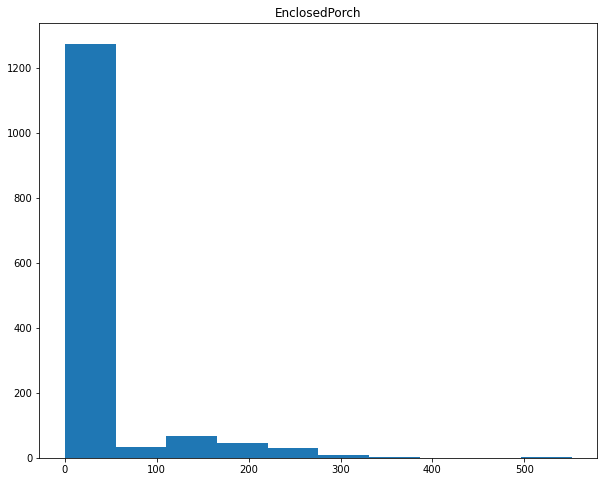

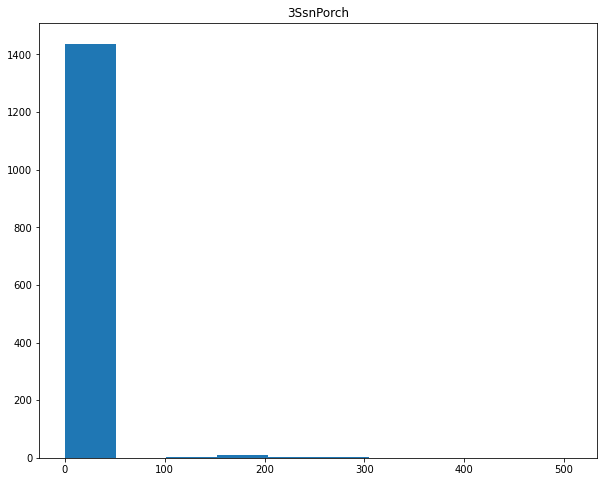

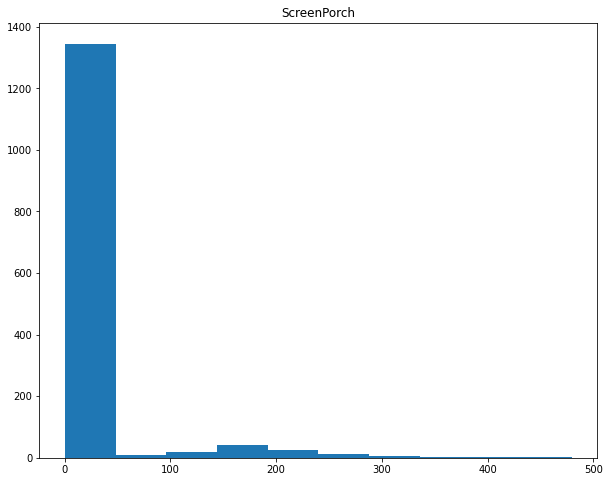

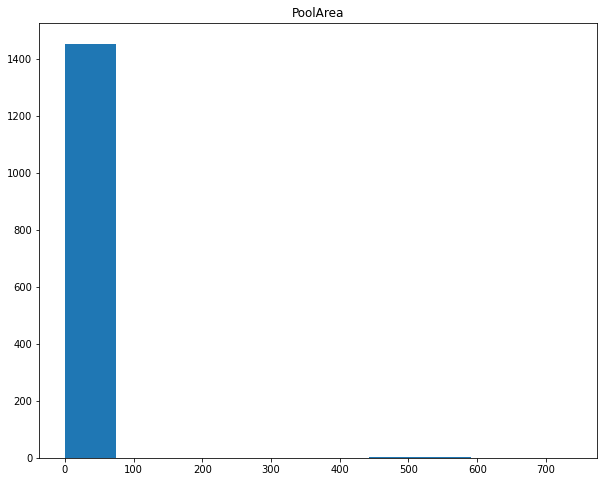

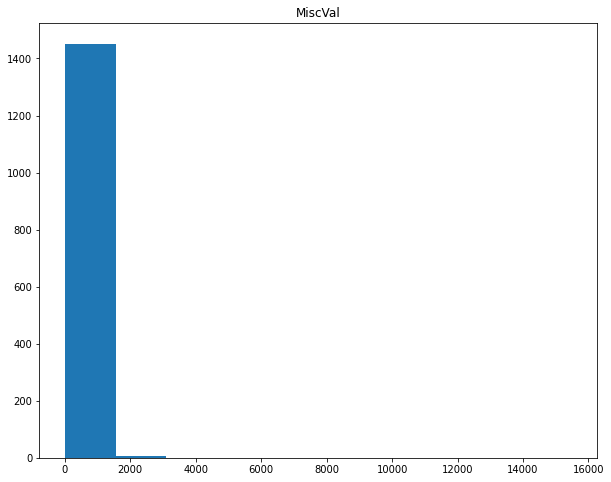

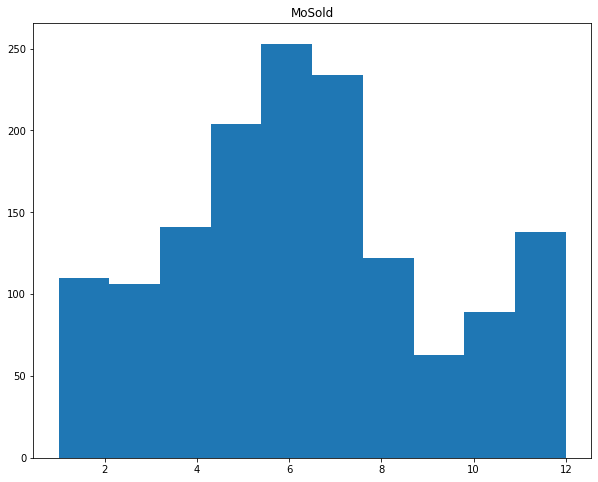

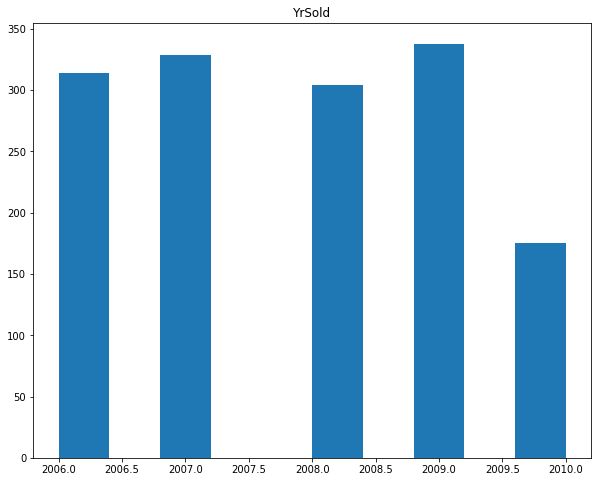

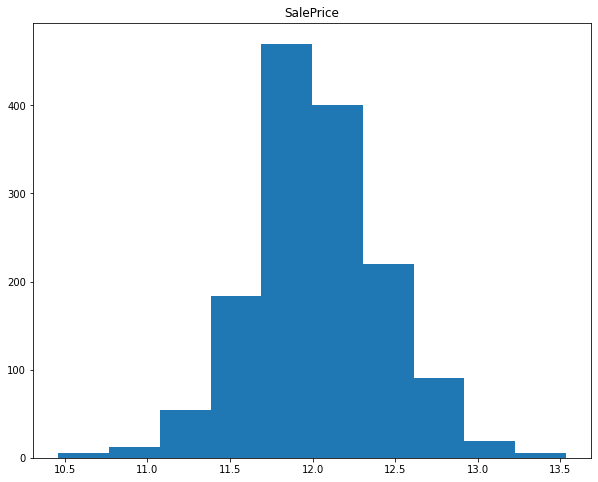

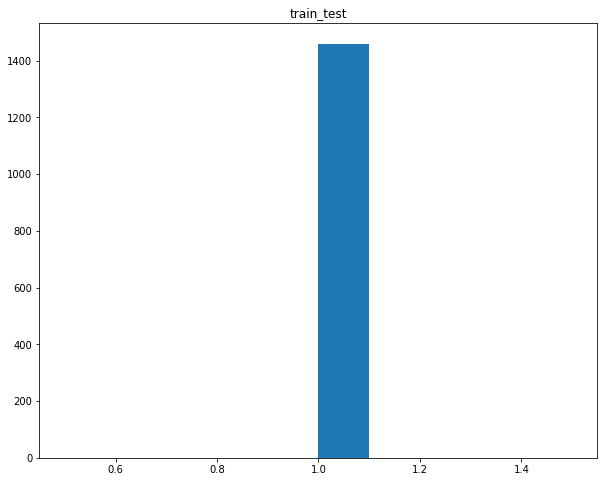

In [7]:
# we use some simple visualization to have a better understanding of the parameters distributions
for i in numerics.columns:
    plt.rcParams['figure.figsize'] = [10, 8]
    plt.hist(numerics[i])# we can change the bins to cut down the rsanges
    plt.title(i)
    plt.show()

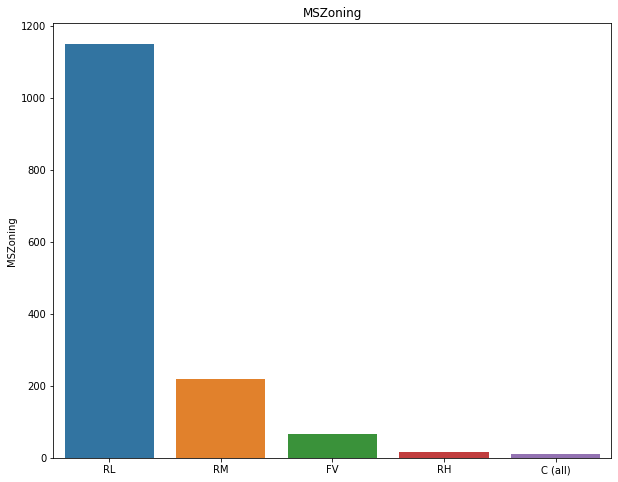

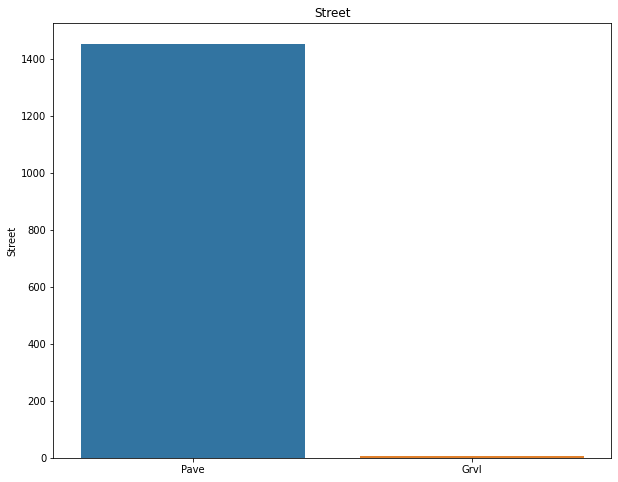

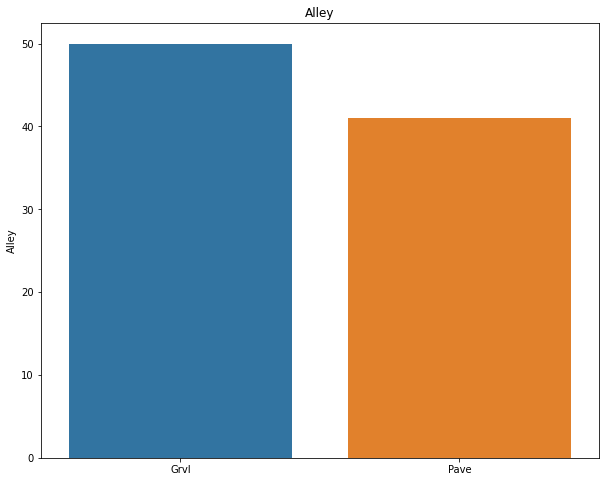

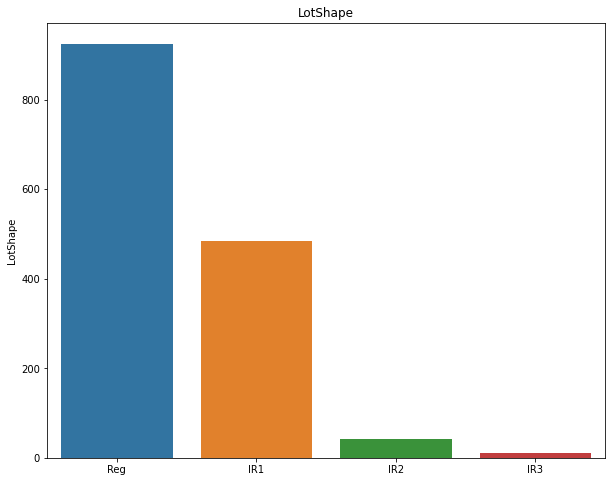

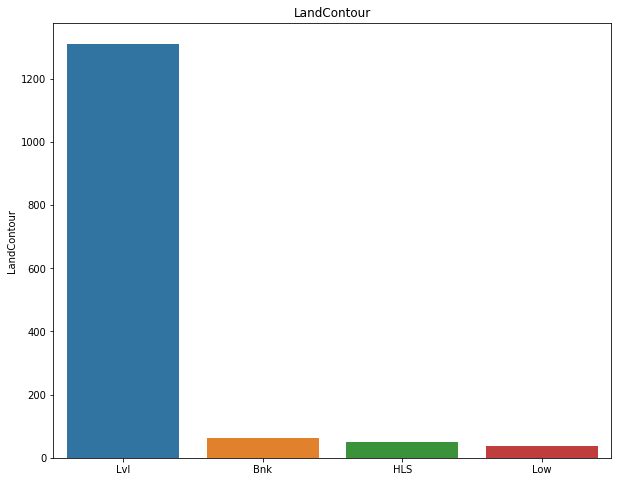

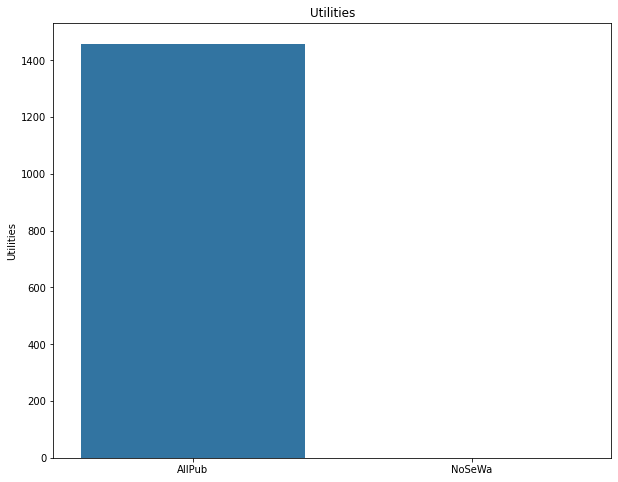

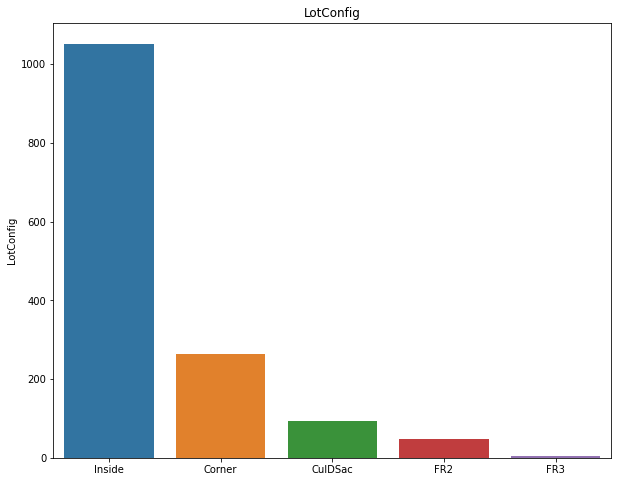

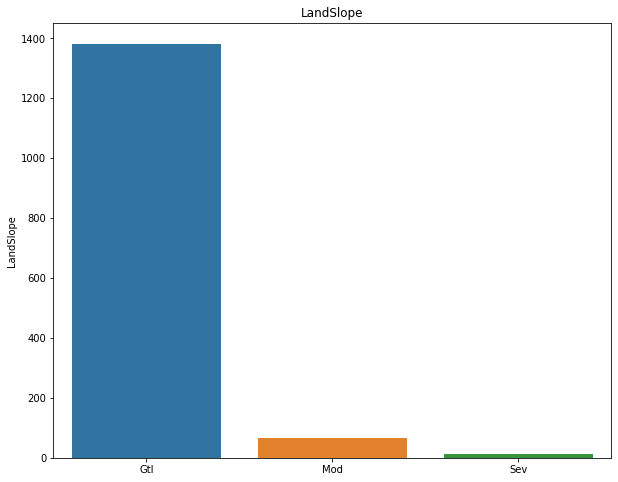

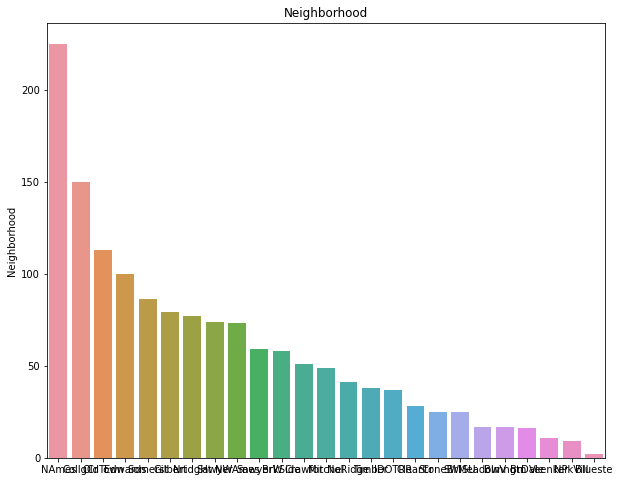

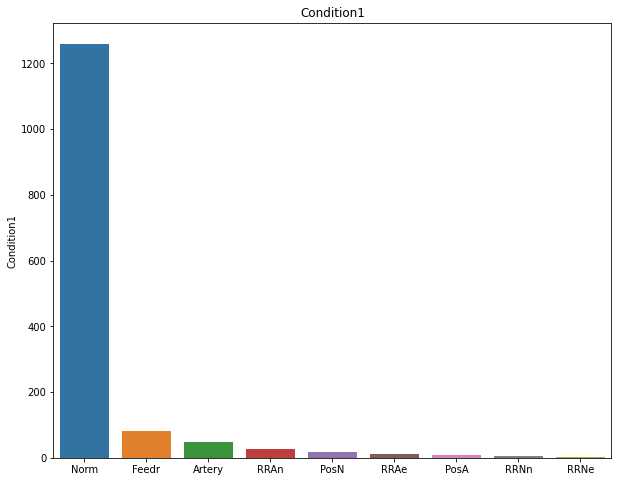

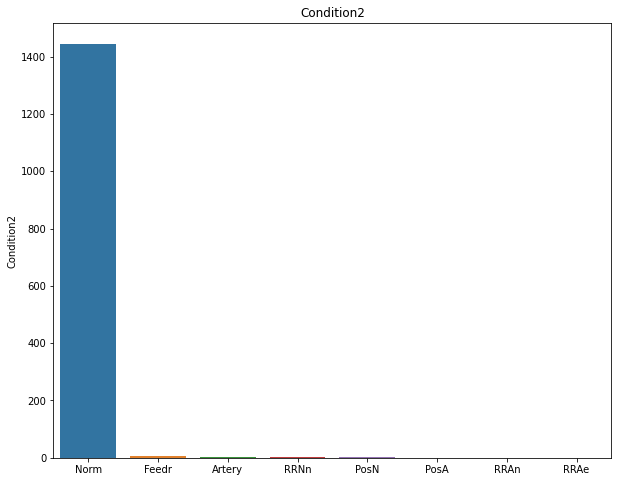

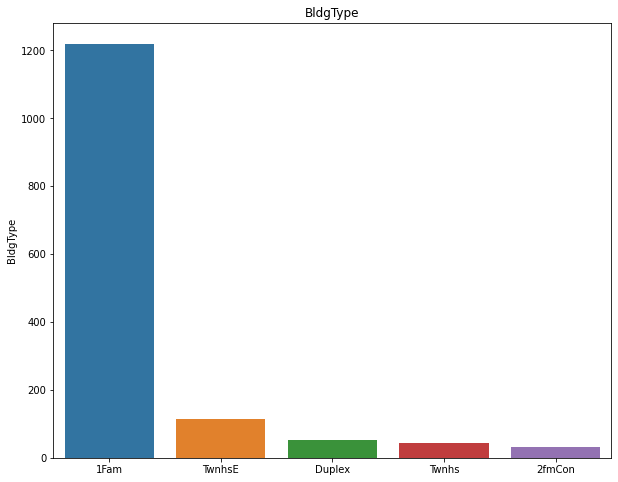

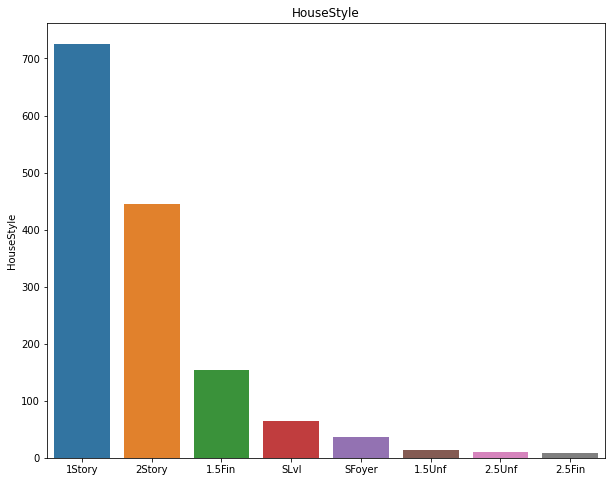

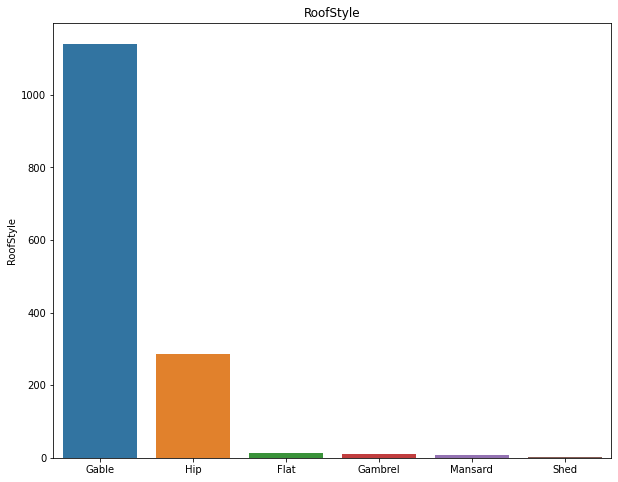

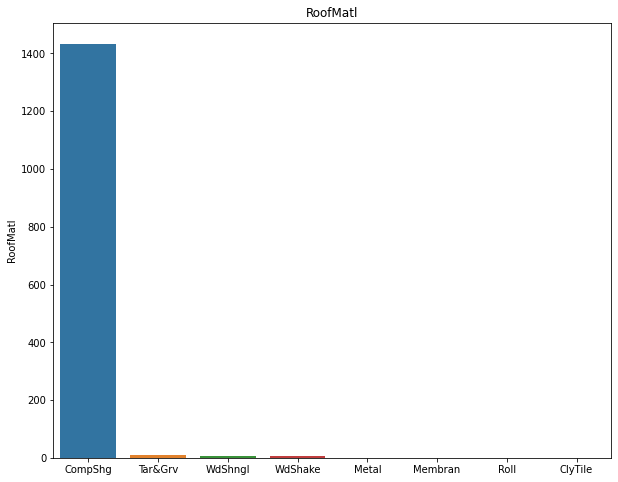

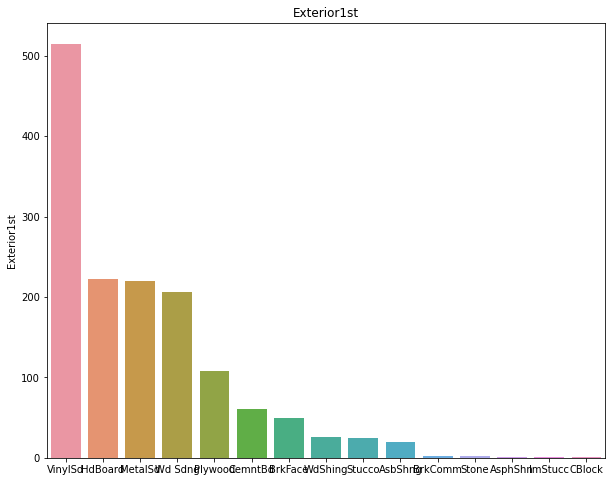

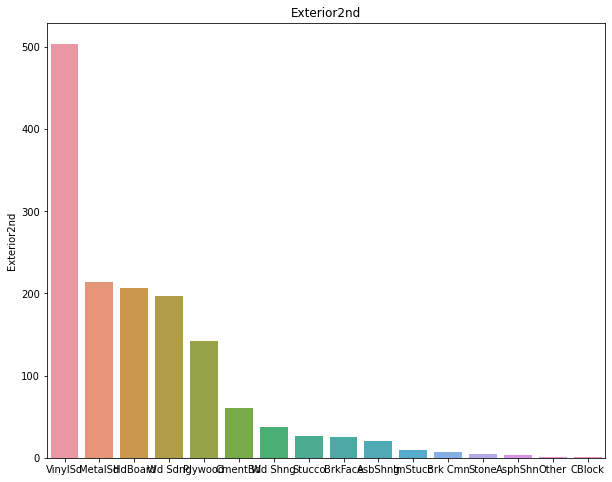

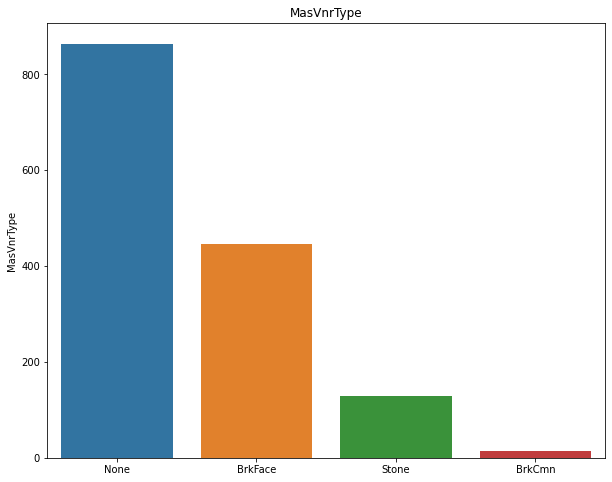

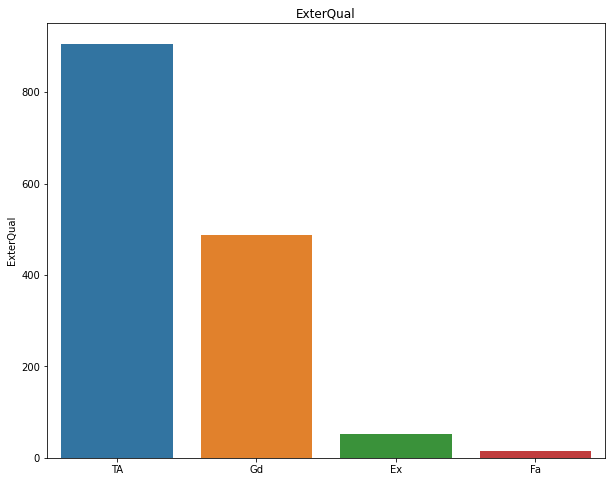

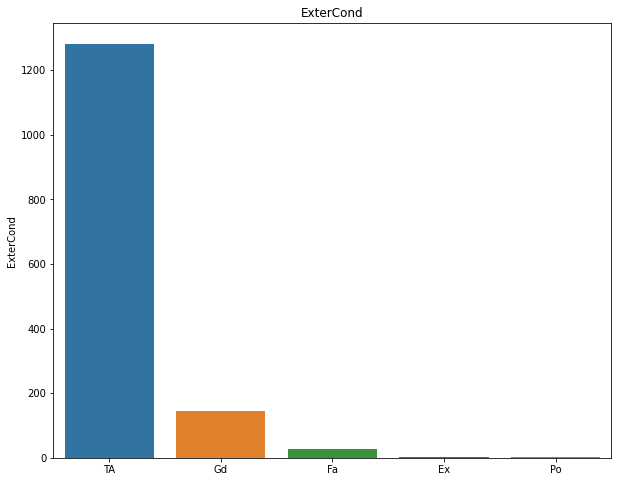

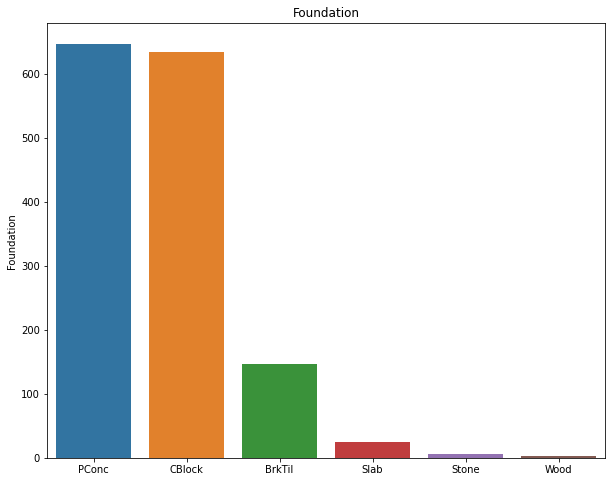

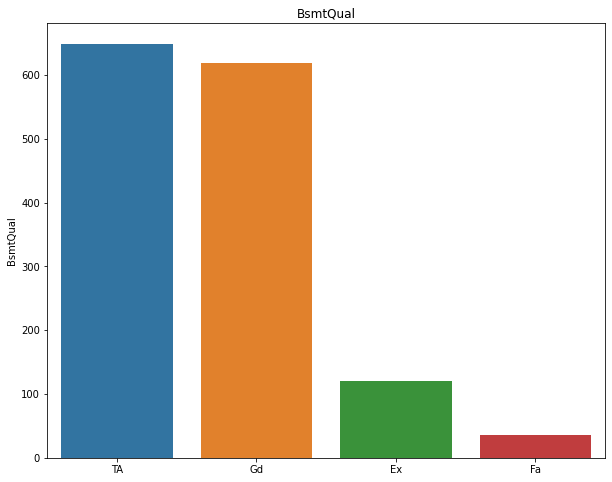

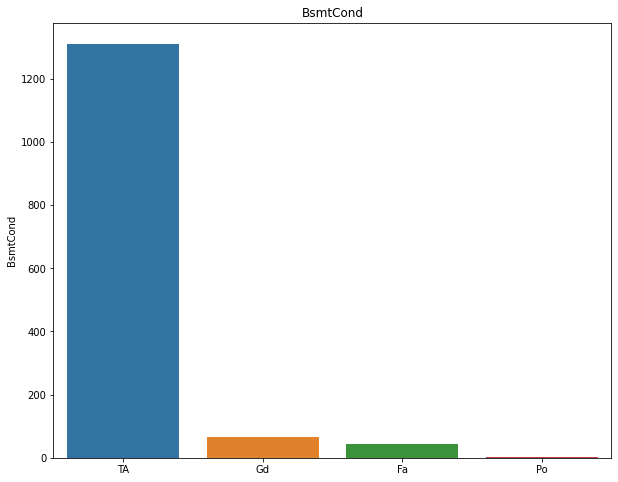

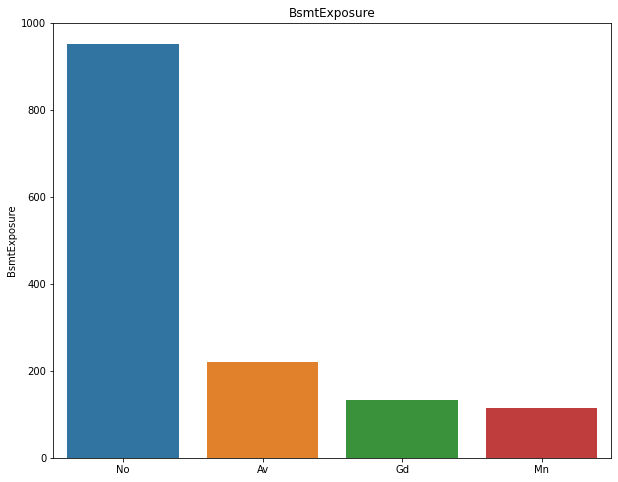

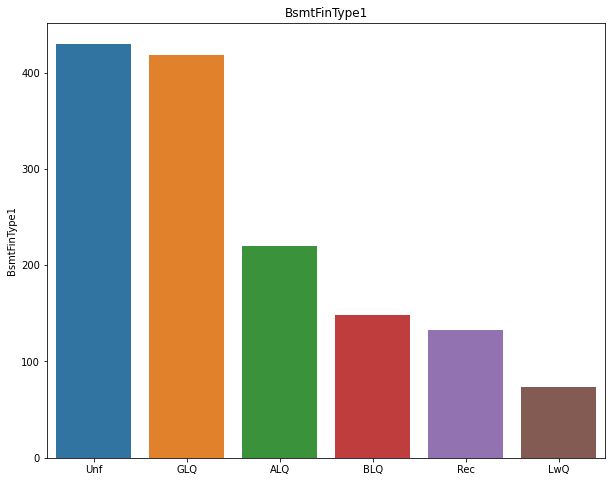

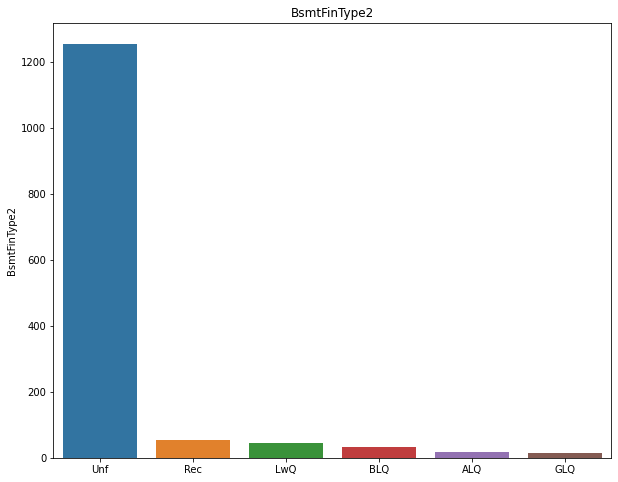

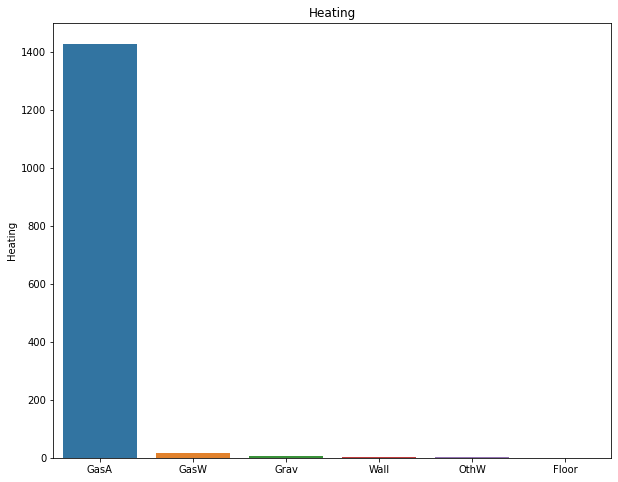

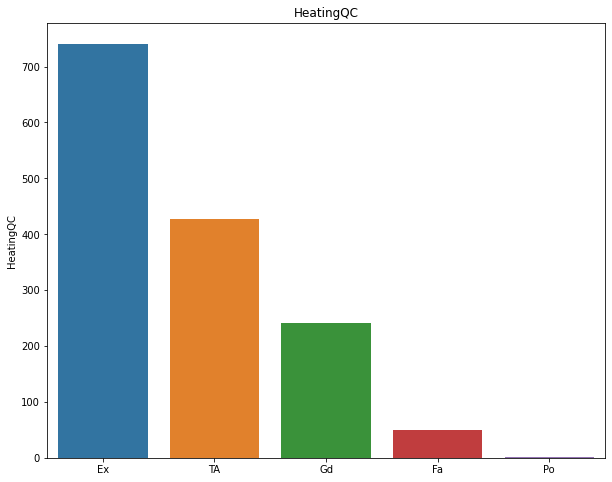

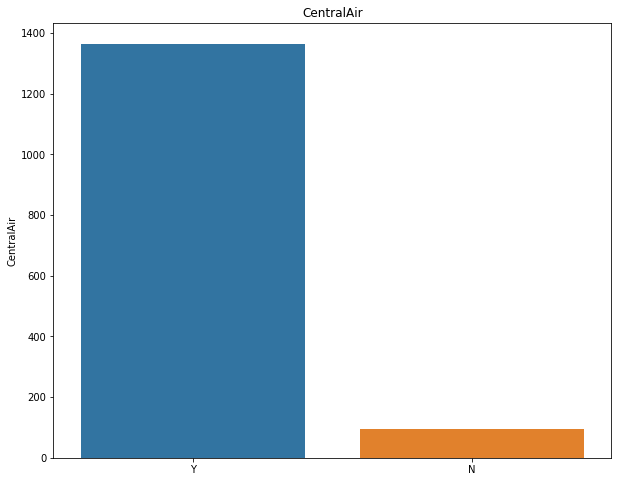

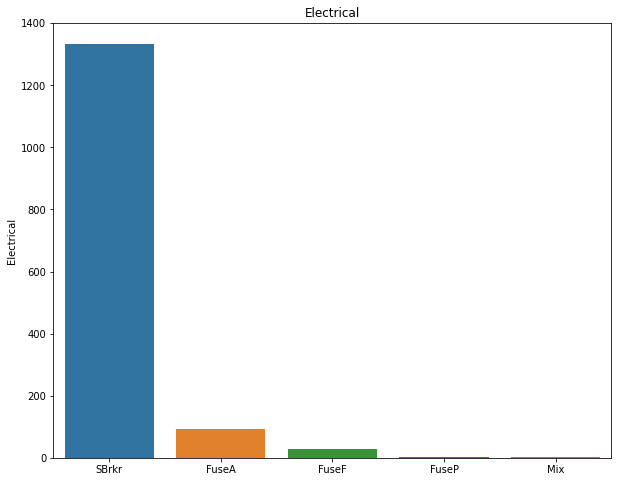

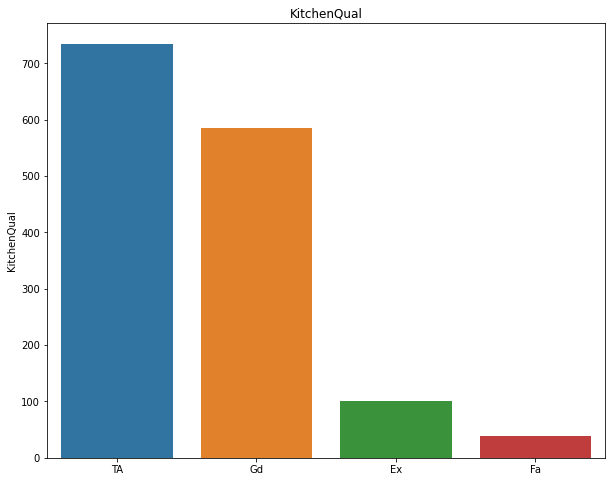

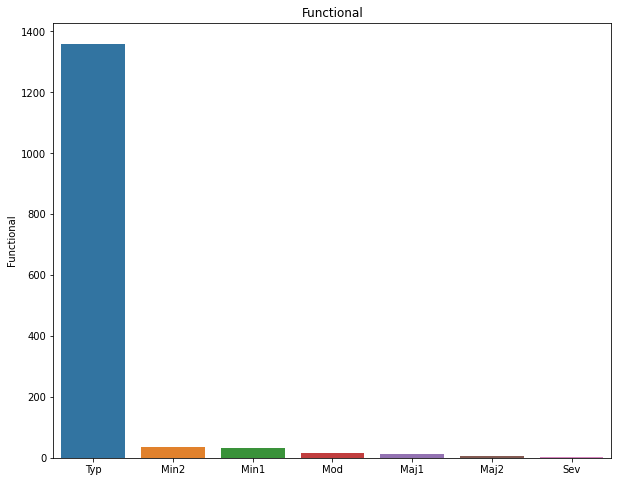

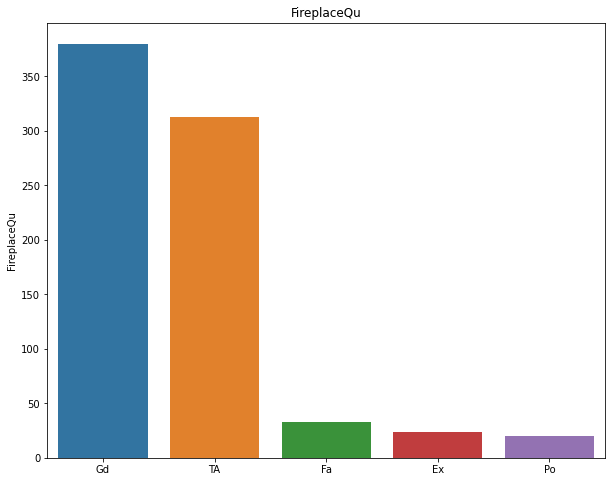

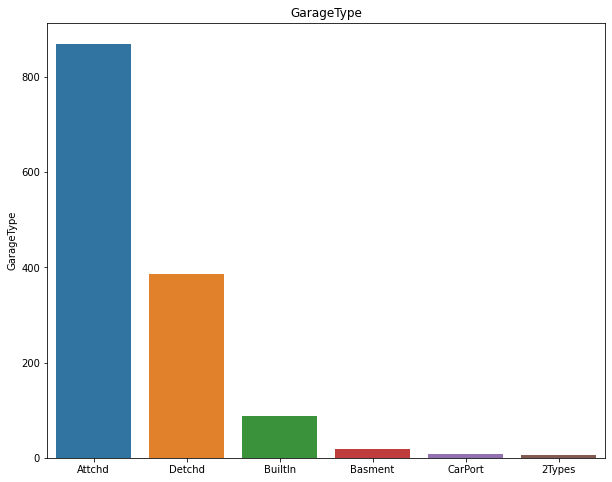

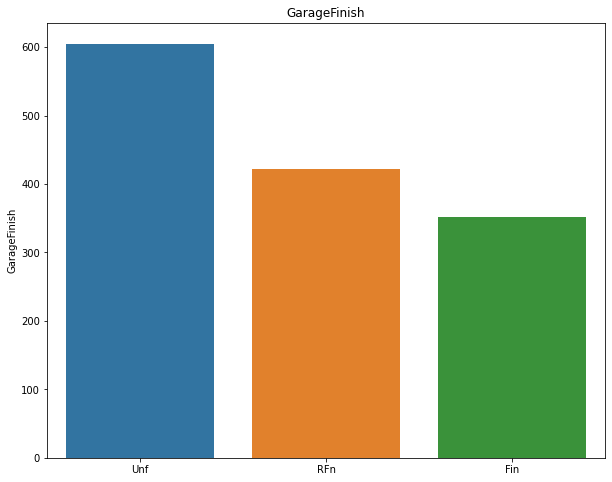

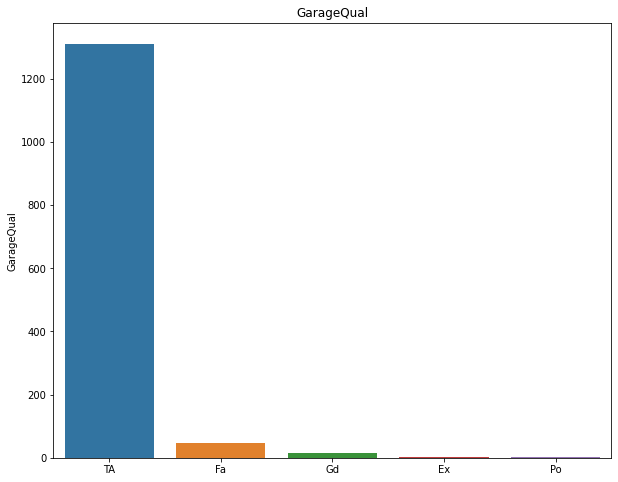

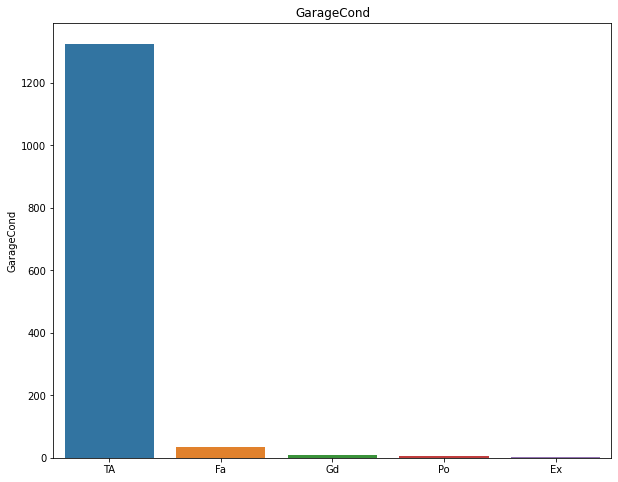

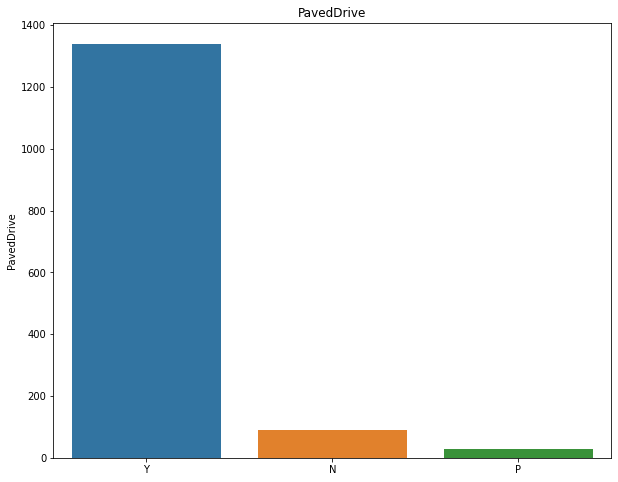

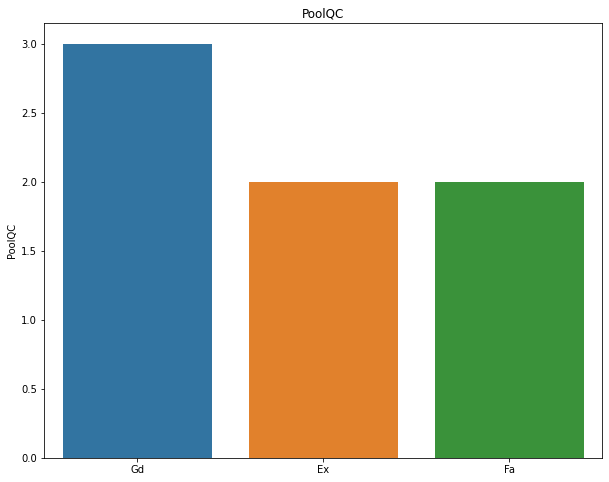

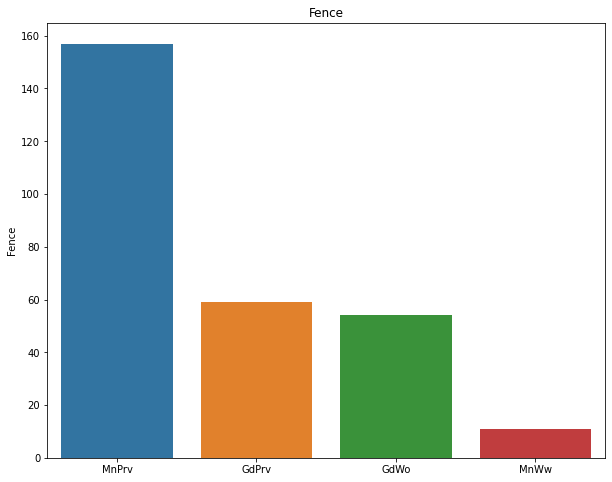

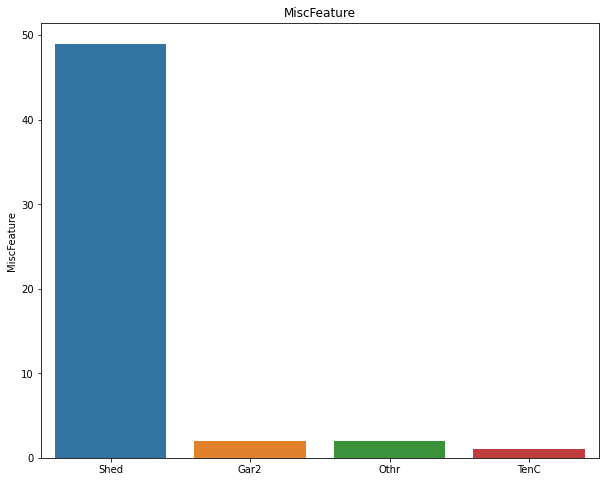

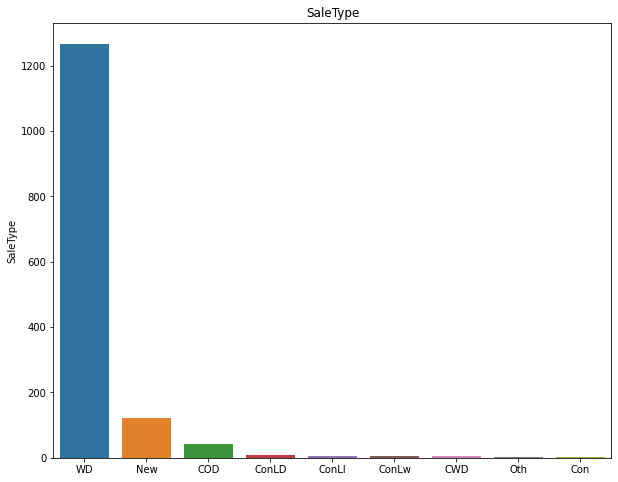

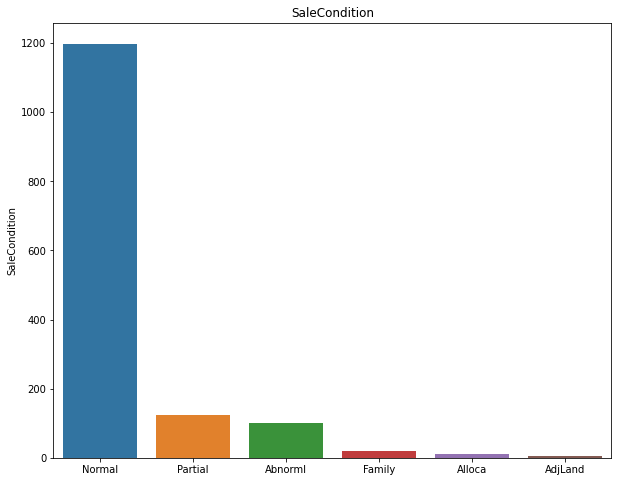

In [8]:
for i in non_numerics.columns:
    sns.barplot(x = non_numerics[i].value_counts().index, y = non_numerics[i].value_counts()).set_title(i)
    plt.title(i)
    plt.show()

                     Id  MSSubClass  LotFrontage   LotArea  OverallQual  \
Id             1.000000    0.011156    -0.010601 -0.033226    -0.028365   
MSSubClass     0.011156    1.000000    -0.386347 -0.139781     0.032628   
LotFrontage   -0.010601   -0.386347     1.000000  0.426095     0.251646   
LotArea       -0.033226   -0.139781     0.426095  1.000000     0.105806   
OverallQual   -0.028365    0.032628     0.251646  0.105806     1.000000   
OverallCond    0.012609   -0.059316    -0.059213 -0.005636    -0.091932   
YearBuilt     -0.012713    0.027850     0.123349  0.014228     0.572323   
YearRemodAdd  -0.021998    0.040581     0.088866  0.013788     0.550684   
MasVnrArea    -0.050298    0.022936     0.193458  0.104160     0.411876   
BsmtFinSF1    -0.005024   -0.069836     0.233633  0.214103     0.239666   
BsmtFinSF2    -0.005968   -0.065649     0.049900  0.111170    -0.059119   
BsmtUnfSF     -0.007940   -0.140759     0.132644 -0.002618     0.308159   
TotalBsmtSF   -0.015415  

<AxesSubplot:>

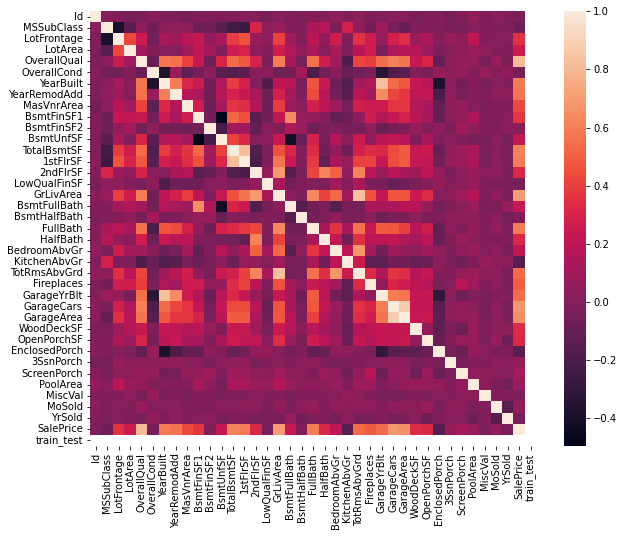

In [9]:
print(numerics.corr())
sns.heatmap(numerics.corr())

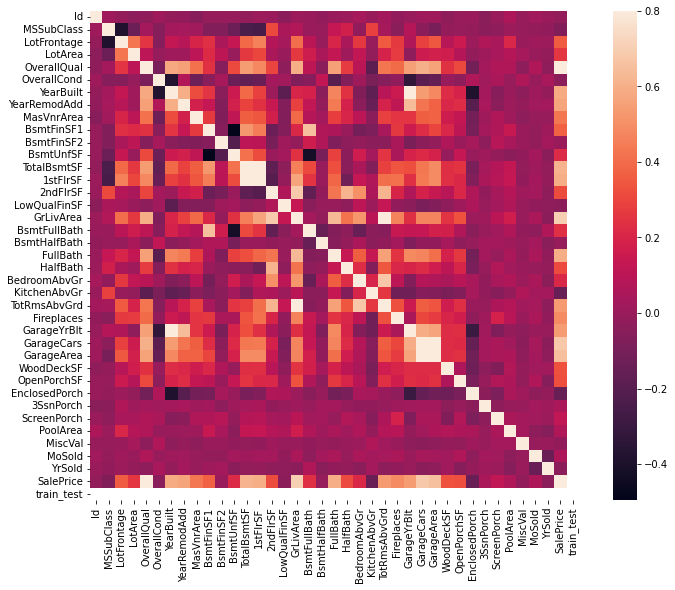

In [10]:
#correlation matrix
corrmat = train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

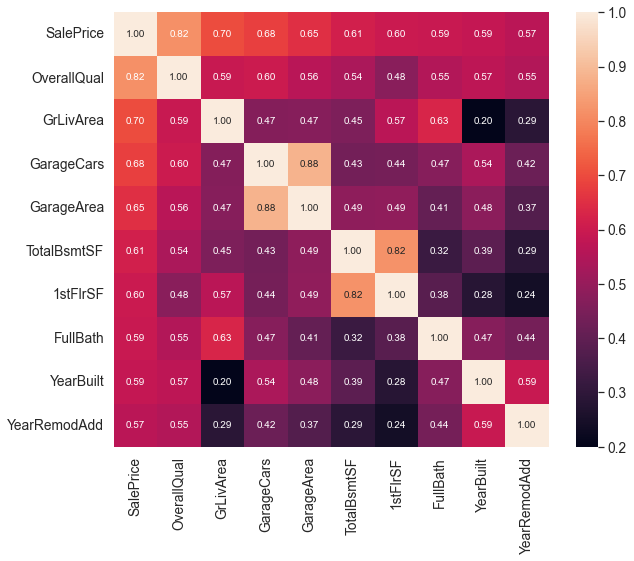

In [11]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.transpose())
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [12]:
train.columns.values.transpose()

array(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'Pav

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


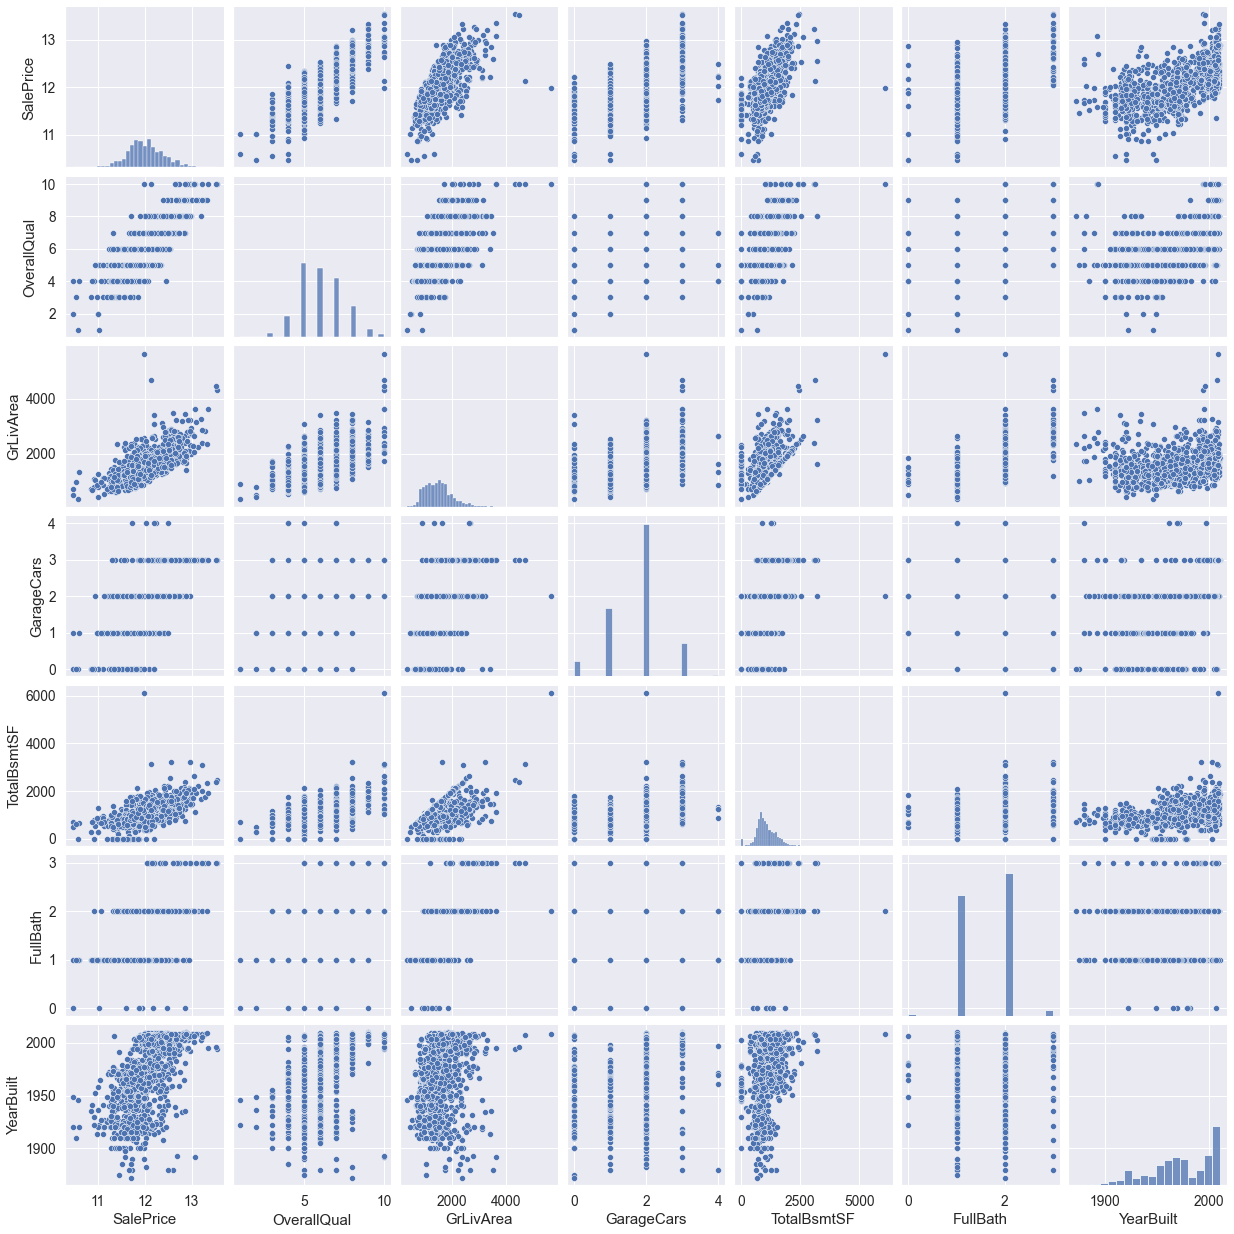

In [13]:
# sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train[cols], size = 2.5)
plt.show();

# Getting rid of outliers

In [14]:
[train["GrLivArea"].isin([4476,4676])]

[0       False
 1       False
 2       False
 3       False
 4       False
         ...  
 1455    False
 1456    False
 1457    False
 1458    False
 1459    False
 Name: GrLivArea, Length: 1460, dtype: bool]

In [15]:
train['TotalBsmtSF'].sort_values()

646        0
1035       0
392        0
749        0
1011       0
        ... 
440     3094
523     3138
496     3200
332     3206
1298    6110
Name: TotalBsmtSF, Length: 1460, dtype: int64

In [16]:
# before combining train and test data into an 'all_data', we should get rid of outliers in the training data
# looking at the pairplot we figure out that there are two outliers in 'GRlivarea', and one in 'TotalBsmtSF'
# we drop these outliers to helf improve our model performance as below.

sorted(train['GrLivArea'].values)[-3:-1]
train = train.drop(train[train["GrLivArea"].isin([4476,4676])].index)
train = train.drop(train[train["TotalBsmtSF"].isin([6110])].index)

# done with outliers

In [17]:
# pd.set_option('display.max_rows', 500)
# pd.set_option('display.max_columns', 500)
# pd.set_option('display.width', 1000)

In [18]:
# understanding the missing data
# are they missing for a reason
missing_tot = train.isnull().sum().sort_values(ascending = False)
missing_percentage = missing_tot/train.shape[0]
missing = pd.concat([missing_tot, missing_percentage], axis = 1, keys = ['missing_items', 'missing_percentage'])

missing

missing_items  missing_percentage
PoolQC                1452            0.996568
MiscFeature           1403            0.962938
Alley                 1366            0.937543
Fence                 1177            0.807824
FireplaceQu            690            0.473576
...                    ...                 ...
ExterQual                0            0.000000
Exterior2nd              0            0.000000
Exterior1st              0            0.000000
RoofMatl                 0            0.000000
train_test               0            0.000000

[82 rows x 2 columns]

In [19]:
missing_tot = test.isnull().sum().sort_values(ascending = False)
missing_percentage = missing_tot/test.shape[0]
missing = pd.concat([missing_tot, missing_percentage], axis = 1, keys = ['missing_items', 'missing_percentage'])

missing

missing_items  missing_percentage
PoolQC                 1456            0.997944
MiscFeature            1408            0.965045
Alley                  1352            0.926662
Fence                  1169            0.801234
FireplaceQu             730            0.500343
...                     ...                 ...
Electrical                0            0.000000
1stFlrSF                  0            0.000000
2ndFlrSF                  0            0.000000
LowQualFinSF              0            0.000000
train_test                0            0.000000

[81 rows x 2 columns]

In [20]:
# It is convenient to define a function for data cleaning:
# this function takes a dataframe and also a treshold for missing data per column. If the missing data on 
# that column exceeds the treshold, it drops the whole column from the dataframe ! (not the best way to deal with missing data)
# we will use this method for the first submission, and will improve our kernet by dealing with the missing data later on on this notebook. 


# def clean_data (df, tresh):
#     missing_tot = df.isnull().sum().sort_values(ascending = False)
#     missing_percentage = missing_tot/df.shape[0]
#     missing = pd.concat([missing_tot, missing_percentage], axis = 1, keys = ['missing_items', 'missing_percentage'])
#     j = 0
#     for i in missing.missing_percentage.values:
#         if i > tresh:
#             df = df.drop(missing_percentage.index[j], axis = 1)
#         j +=1
#     return df


# train_clean = train[train.columns.value] 

In [21]:
# df_train = train.copy()
# df_train.sort_values(by = 'GrLivArea', ascending = False)[:2]
# # bad_cols = [1299,1297]
# df_train = df_train[df_train['Id'] != 1299]
# df_train = df_train[df_train['Id'] != 524]
# df_train = df_train.reset_index(drop = True)
# df_train

# no_nan = clean_data (df_train, .0053)
# df_train = df_train.drop(df_train[df_train['Id'] == 1299].index)
# df_train = df_train.drop(df_train[df_train['Id'] == 524].index)

In [22]:


# here we check if our variables are dist

# sns.distplot(df_train['SalePrice'], fit=norm);
# fig = plt.figure()
# res = stats.probplot(df_train['SalePrice'], plot=plt)

In [23]:
# # Now we scale our data to help regression models (mostly linear models) to give the same weight on the parameters
# # Tree based models do not care that much about normalization :D

# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# scaled_dummied = scaler.fit_transform (dummied)
# # pd.DataFrame(dummied)
# scaled_dummied = pd.DataFrame(scaled_dummied, columns = dummied.columns)
# scaled_dummied
# dummied = scaled_dummied

In [24]:
#                MODEL
# from sklearn.model_selection import train_test_split, cross_val_score
# from sklearn.ensemble import RandomForestRegressor
# X = dummied.drop (['SalePrice'], axis = 1)
# y = dummied['SalePrice']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# rf_model = RandomForestRegressor()
# rf_model.fit (X_train, y_train)

# cvs = cross_val_score (rf_model, X_train, y_train, cv = 5)
# print (cvs)
# print (cvs.mean())


In [25]:
# feat_importances = pd.Series(rf_model.feature_importances_, index=X_train.columns)
# feat_importances.nlargest(20).plot(kind='barh')

In [26]:
# from sklearn.metrics import mean_absolute_error as MAE

# y_pred = rf_model.predict (X_test)
# print('sklearn MAE = ', MAE(y_test, y_pred))

In [27]:
# since we scaled out dataFRame with a MIN-MAX scaler, MAE isalso scaled with our data.
# the result show that the error is approximately equal to 2 percent of the maximum of the house price.


In [28]:
# so far we did out data manipulation on training data. Now we want to submit the results to a kaggle competition.
# for this reason we need to doo all of the data cleaning/preprocessing on the test data too
# in the following we will see how we should to on the test data



In [29]:
# # we wanna find how much missing data we have on the test set
# missing_tot = test.isnull().sum().sort_values(ascending = False)
# missing_percentage = missing_tot/train.shape[0]
# missing = pd.concat([missing_tot, missing_percentage], axis = 1, keys = ['missing_items', 'missing_percentage'])

# missing

In [30]:
# test_no_nan = clean_data (test, 0.0005) 
# test_no_nan

In [31]:
# # dummying and scaling
# test_dummied = pd.get_dummies(test_no_nan)
# test_scaled_dummied = scaler.fit_transform (test_dummied)
# # pd.DataFrame(dummied)
# test_scaled_dummied = pd.DataFrame(test_scaled_dummied, columns = test_dummied.columns)
# test_scaled_dummied
# # dummied = scaled_dummied

# FEATURE ENGINEERING

In [32]:
# we have to attach train and test to make an all_datatrain
train['train_test'] = 1
test['train_test'] = 0
all_data = pd.concat([train, test])

In [33]:
missing_tot = all_data.isnull().sum().sort_values(ascending = False)
missing_percentage = missing_tot/all_data.shape[0]
missing = pd.concat([missing_tot, missing_percentage], axis = 1, keys = ['missing_items', 'missing_percentage'])

missing

missing_items  missing_percentage
PoolQC                 2908            0.997257
MiscFeature            2811            0.963992
Alley                  2718            0.932099
Fence                  2346            0.804527
SalePrice              1459            0.500343
...                     ...                 ...
1stFlrSF                  0            0.000000
2ndFlrSF                  0            0.000000
LowQualFinSF              0            0.000000
GrLivArea                 0            0.000000
train_test                0            0.000000

[82 rows x 2 columns]

### we do some feature engineering to impute the missing data

In [34]:
cols = ['MasVnrType' ,'BsmtFinType1', 'BsmtFinType2','BsmtQual','BsmtExposure','BsmtCond','PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageYrBlt', 'GarageQual', 'GarageFinish', 'GarageType', 'GarageCond']
all_data[cols] = all_data[cols].fillna ('none')
all_data['MasVnrArea'] = all_data['MasVnrArea'].fillna (0)
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])
grouped = all_data.groupby(['Neighborhood'])['LotFrontage'].transform(lambda x: x.fillna(x.median()))
all_data['LotFrontage'] = grouped
cols0 = ['BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF']

all_data['Functional'] = all_data['Functional'].fillna(all_data['Functional'].mode()[0])
all_data['Utilities'] = all_data['Utilities'].fillna(all_data['Utilities'].mode()[0])
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])
# to stop repeating the same line we do the rest of the filling in a loop:
col_modes = ['Exterior1st', 'Exterior2nd', 'KitchenQual', 'SaleType']
for col in col_modes:
    all_data[col] = all_data[col].fillna(all_data[col].mode()[0])
    
all_data[cols0] = all_data[cols0].fillna (0)
cols01 = ['GarageCars', 'GarageArea']
all_data[cols01] = all_data[cols01].fillna (0)
# when MasVnrType is none the area is zero 

In [35]:
# now we double check if there is any missing, missing data!
missing_tot = all_data.isnull().sum().sort_values(ascending = False)
missing_percentage = missing_tot/all_data.shape[0]
missing = pd.concat([missing_tot, missing_percentage], axis = 1, keys = ['missing_items', 'missing_percentage'])

missing

missing_items  missing_percentage
SalePrice              1459            0.500343
Id                        0            0.000000
BedroomAbvGr              0            0.000000
GarageYrBlt               0            0.000000
GarageType                0            0.000000
...                     ...                 ...
MasVnrArea                0            0.000000
MasVnrType                0            0.000000
Exterior2nd               0            0.000000
Exterior1st               0            0.000000
train_test                0            0.000000

[82 rows x 2 columns]

### we are done with the feature engineering

# dealing with skewness

C:\Users\Pouria\AppData\Local\Temp/ipykernel_11920/423091663.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  all_data_numeric = all_data.loc[:, all_data.dtypes != np.object]
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `di

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

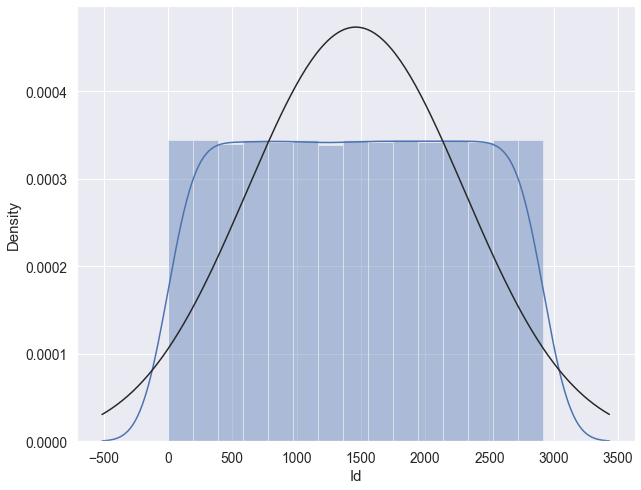

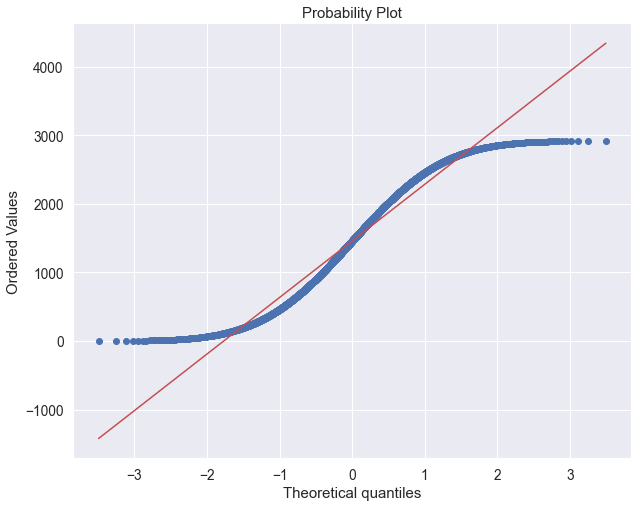

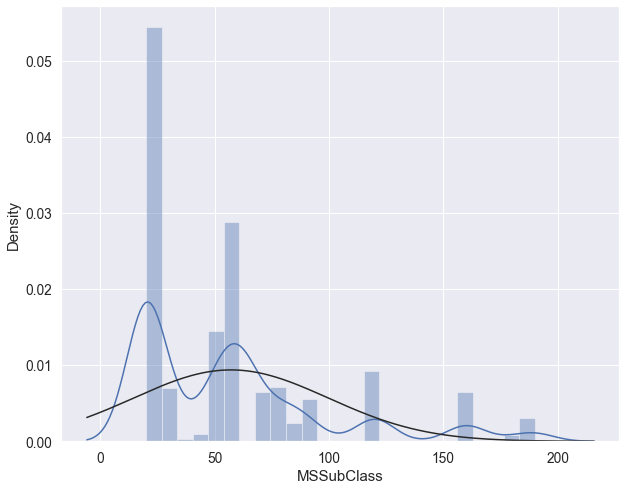

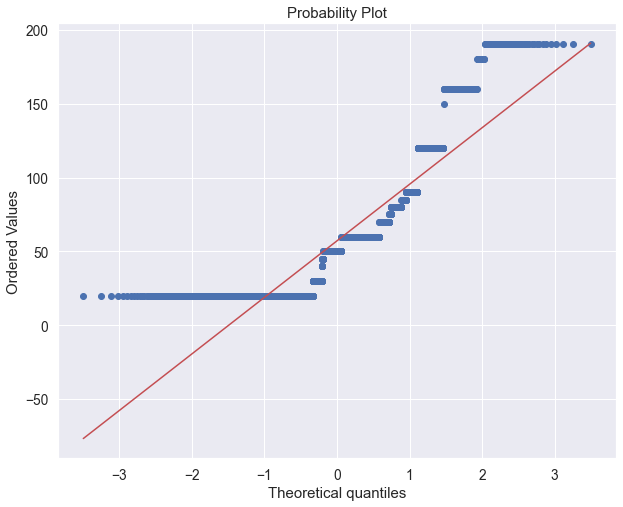

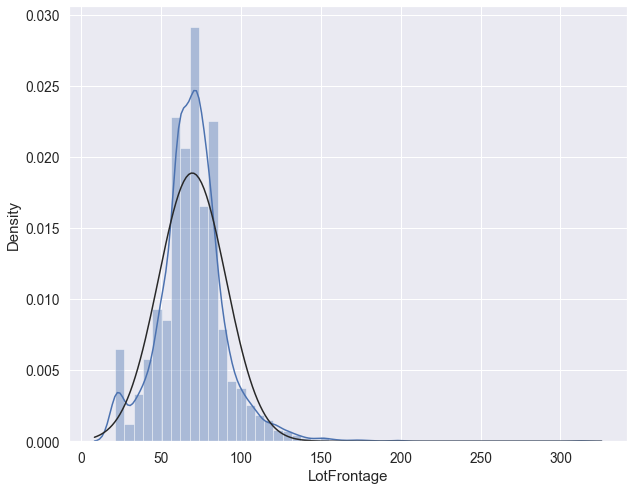

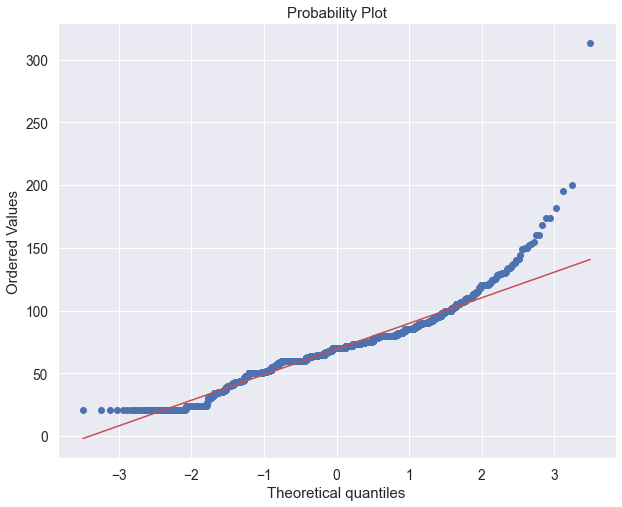

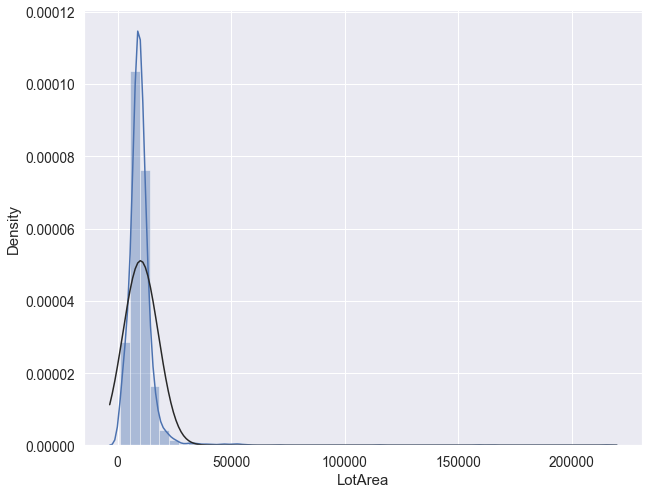

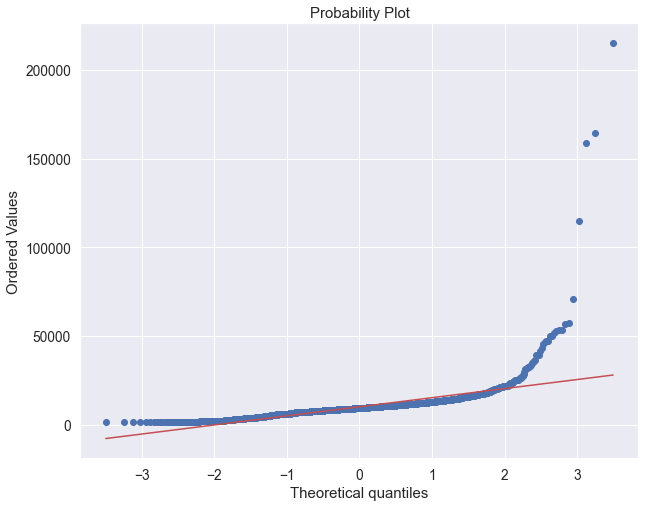

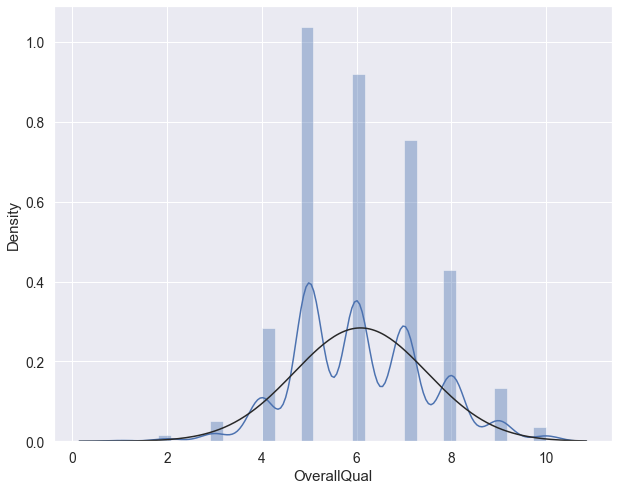

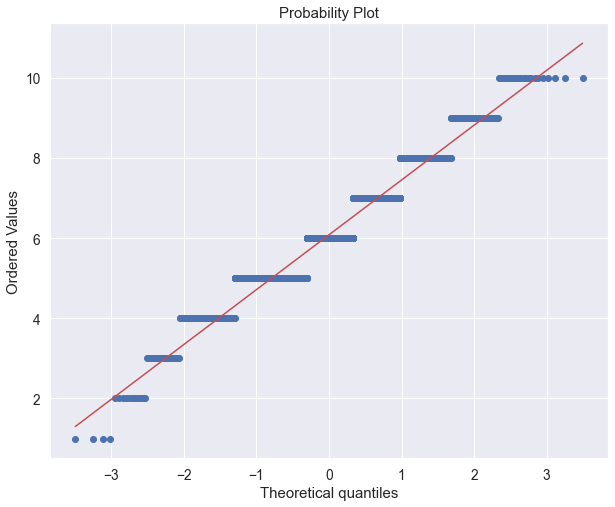

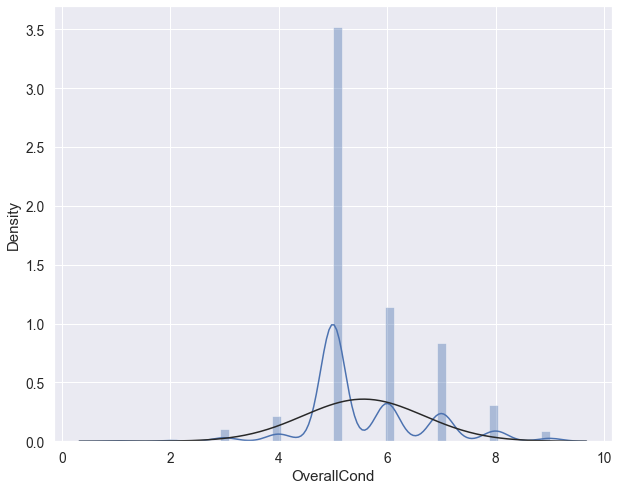

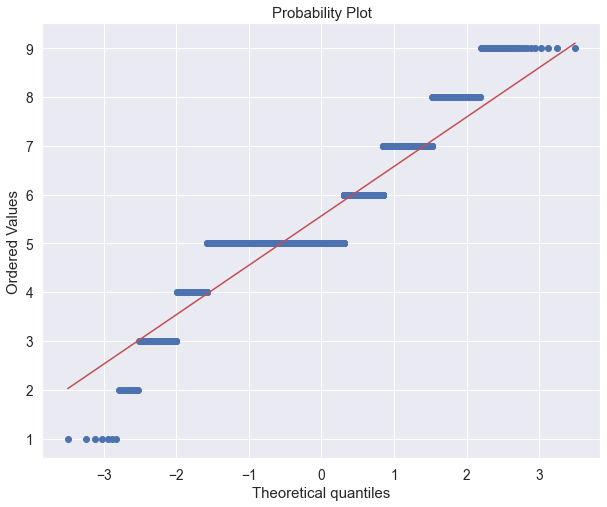

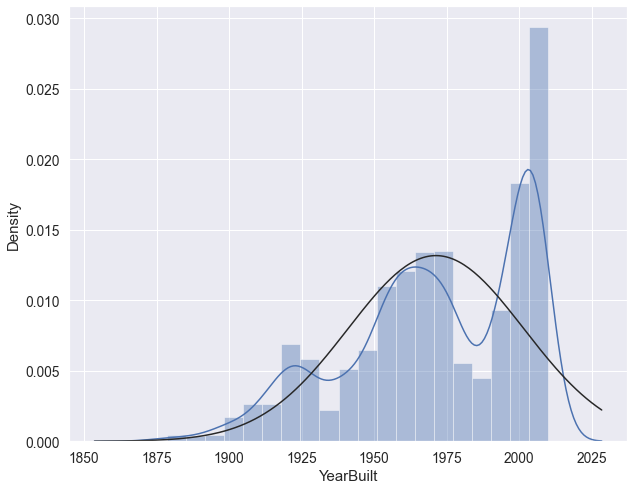

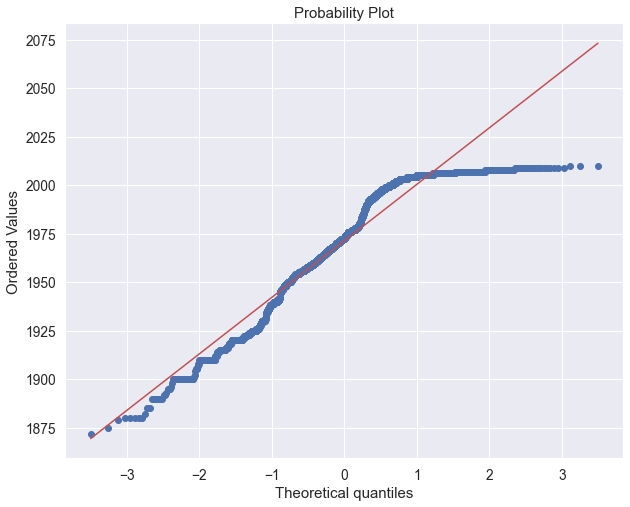

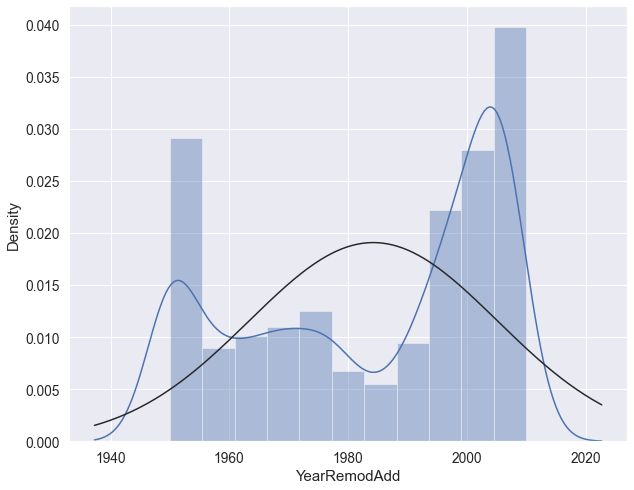

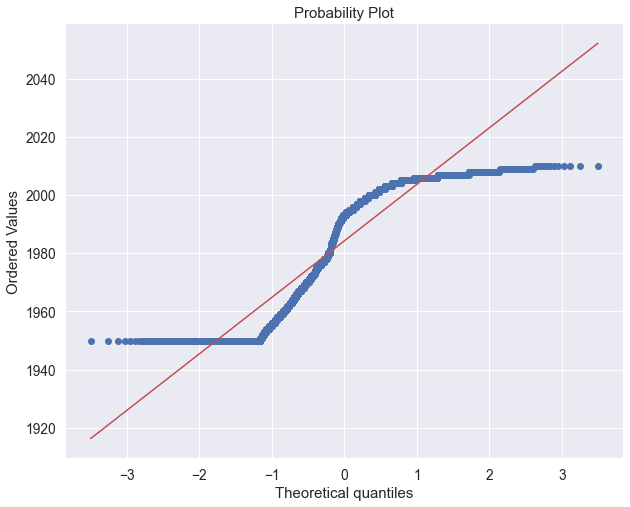

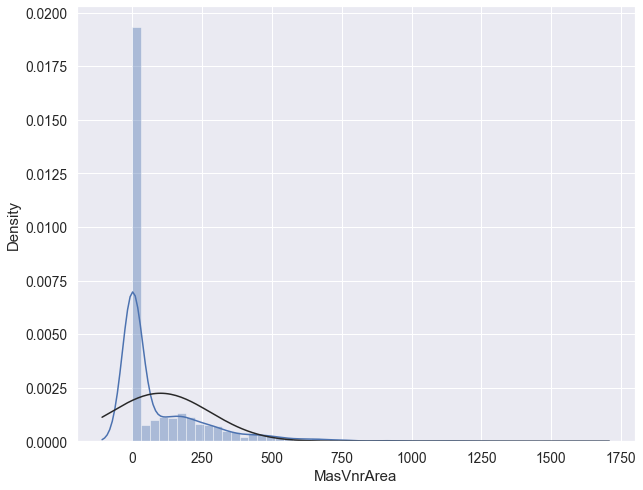

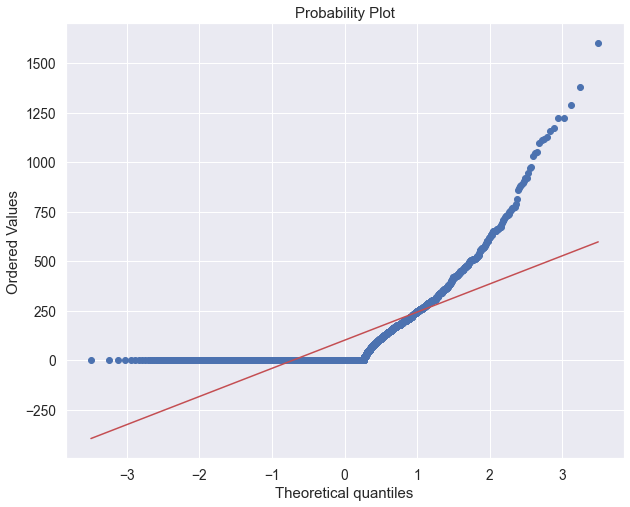

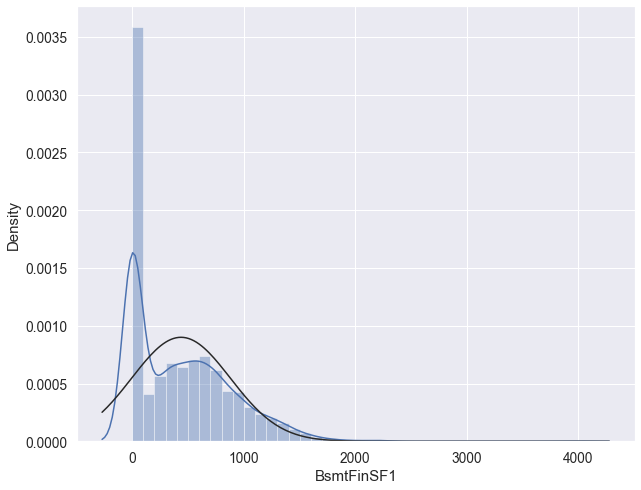

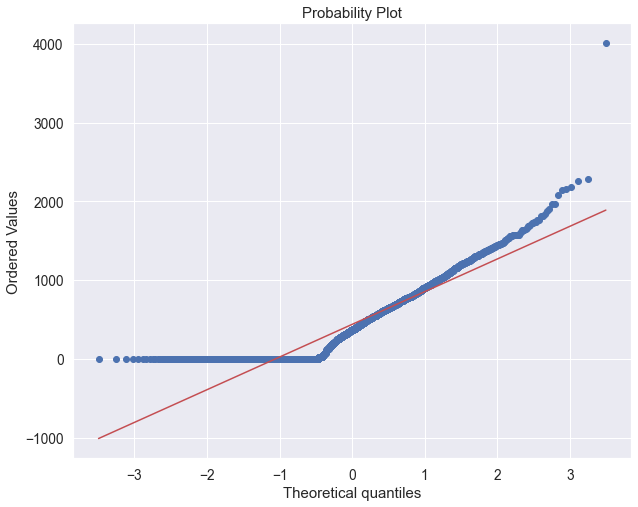

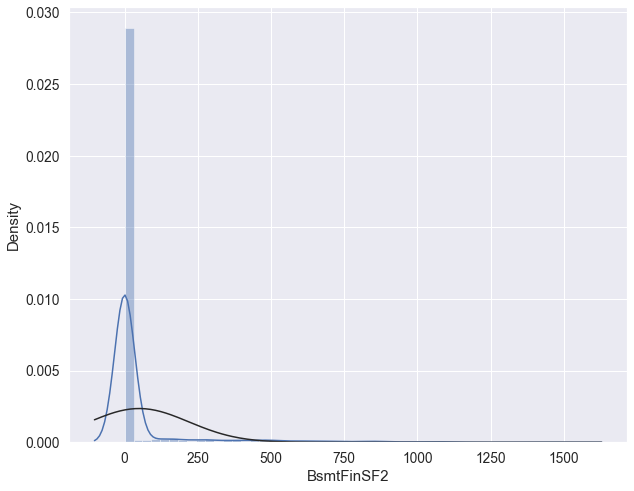

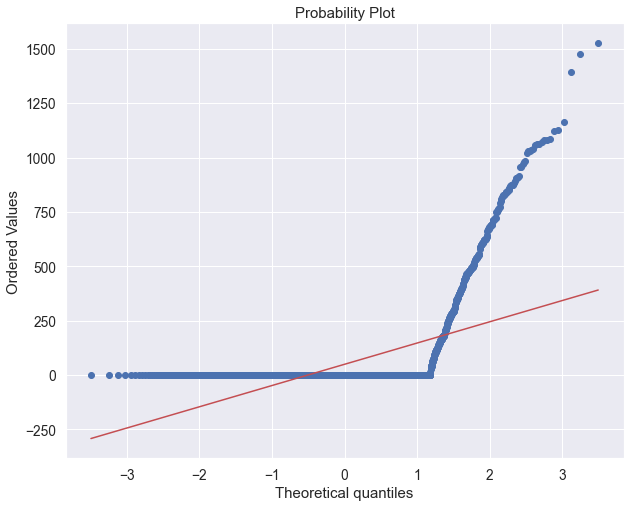

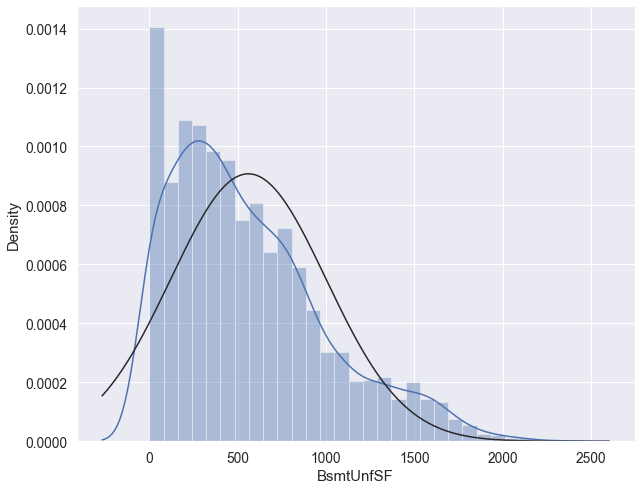

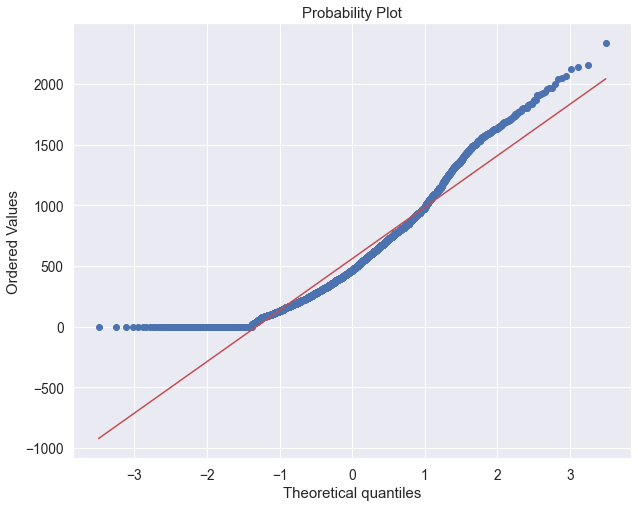

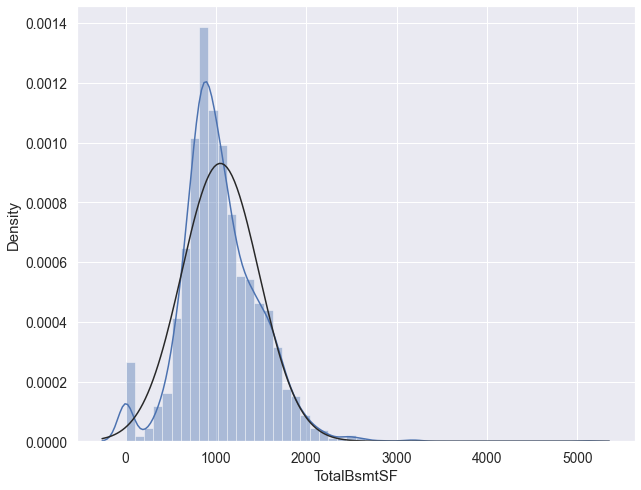

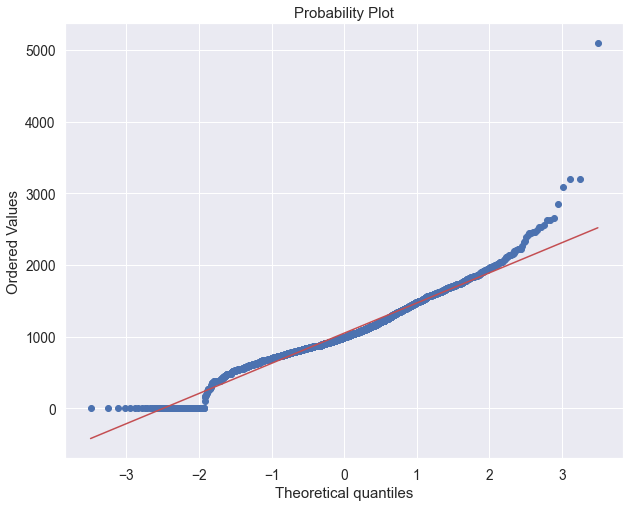

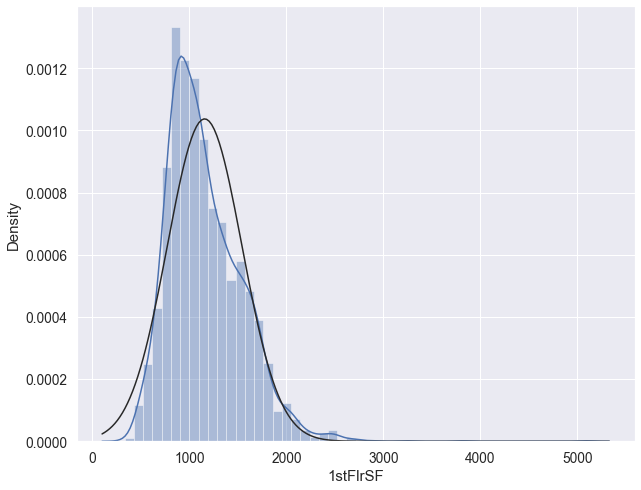

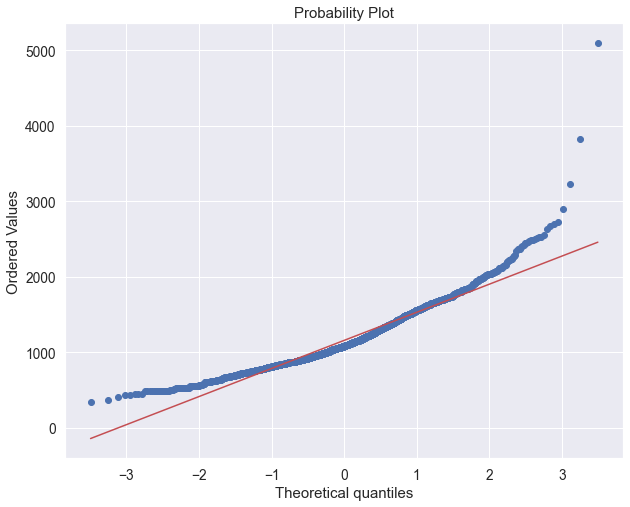

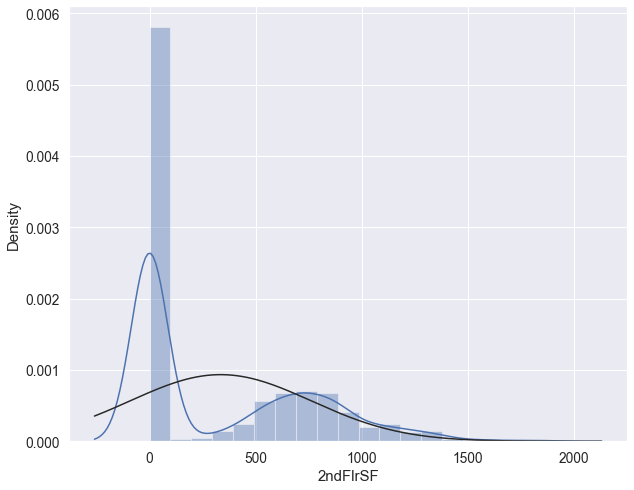

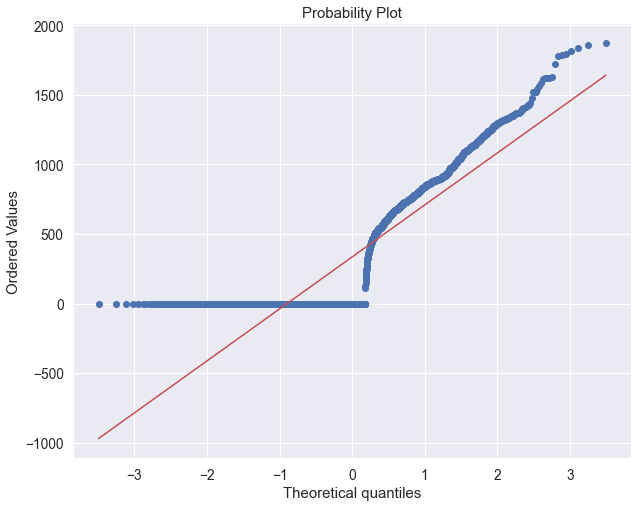

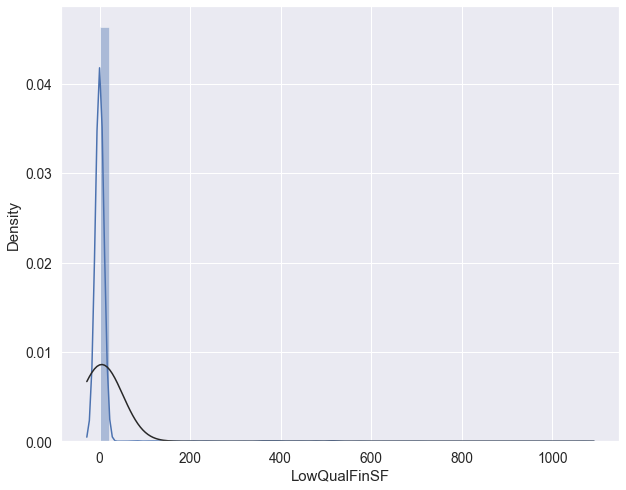

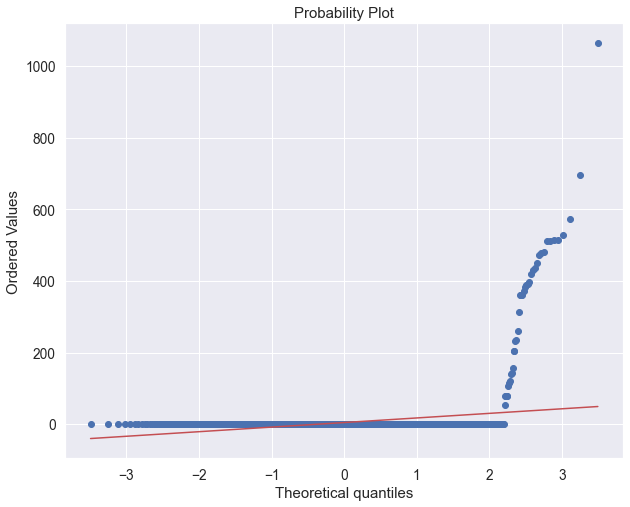

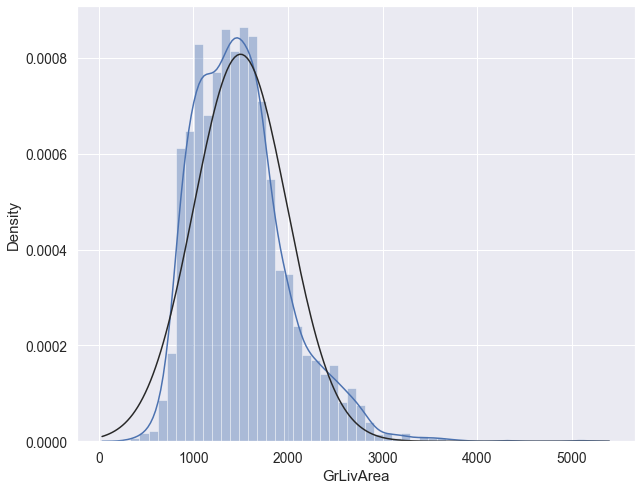

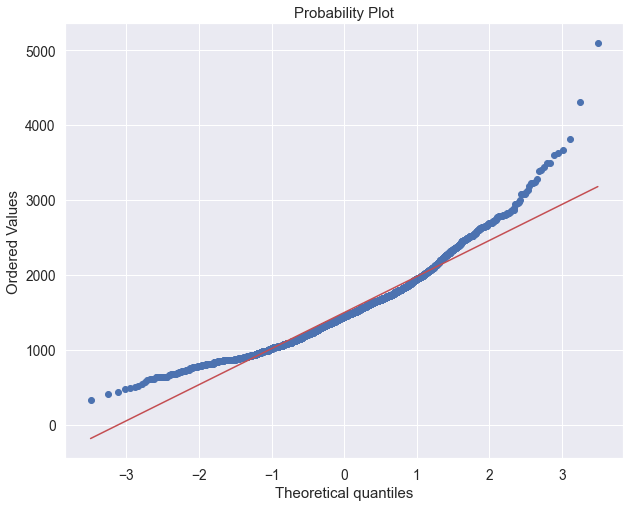

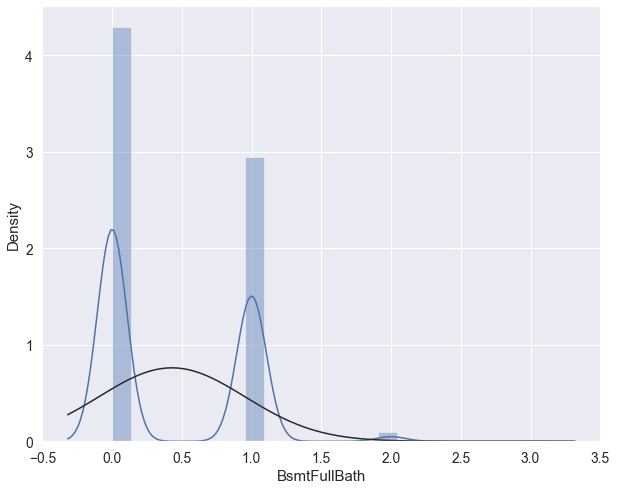

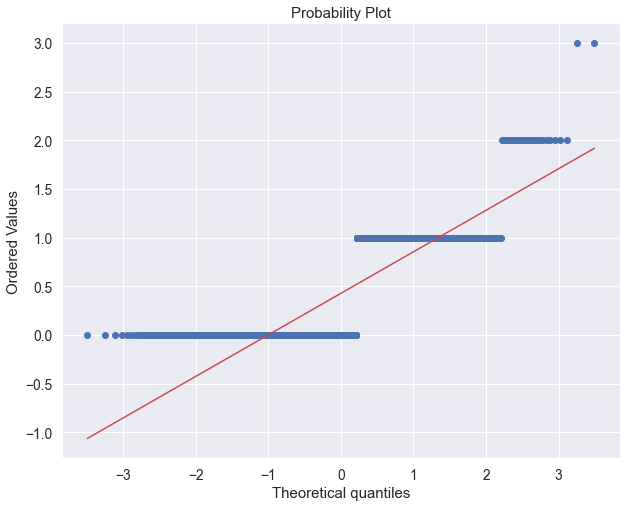

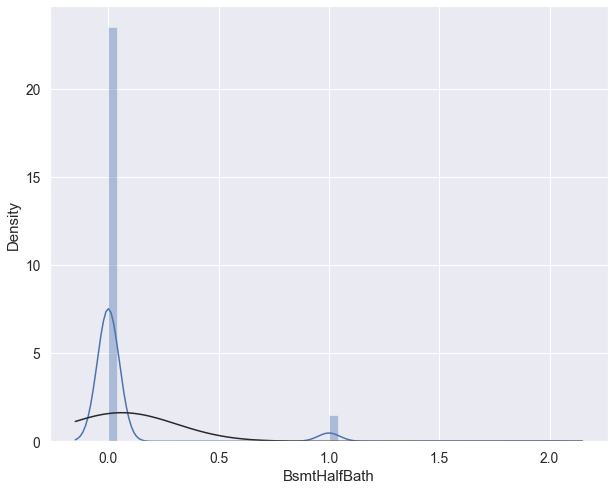

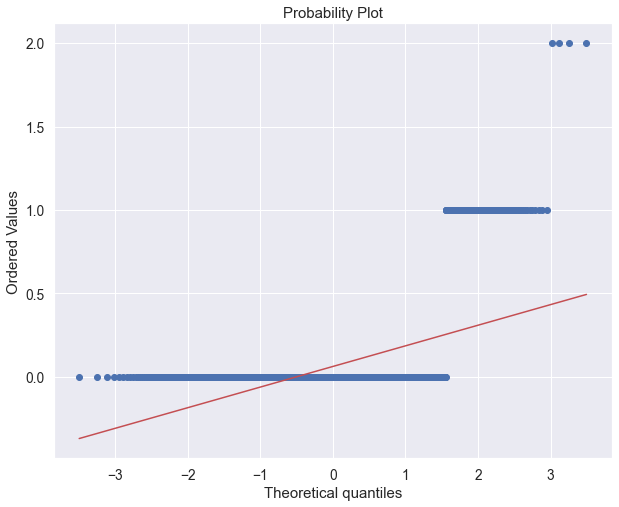

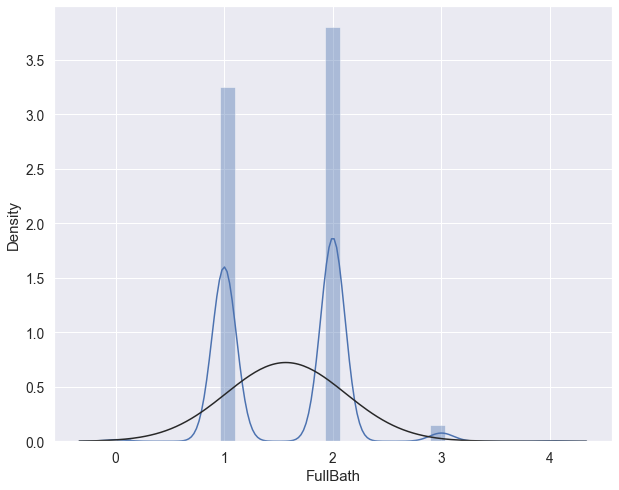

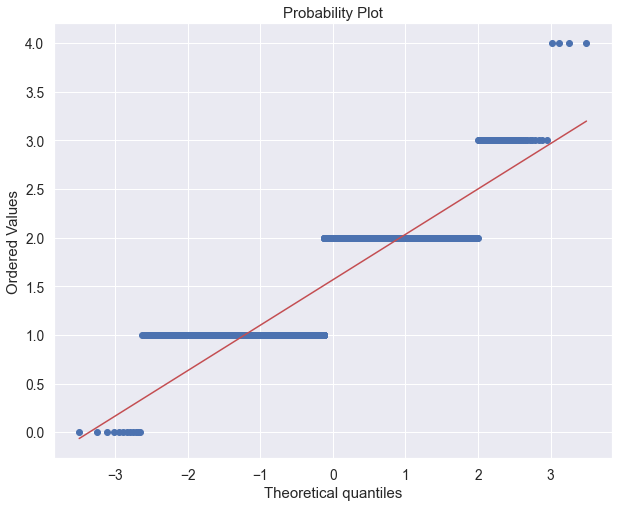

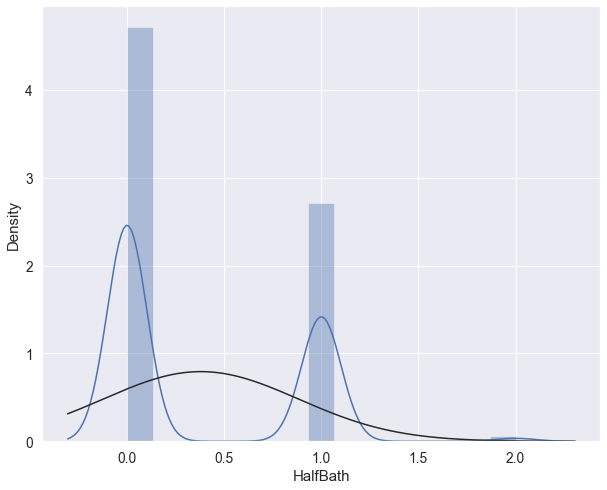

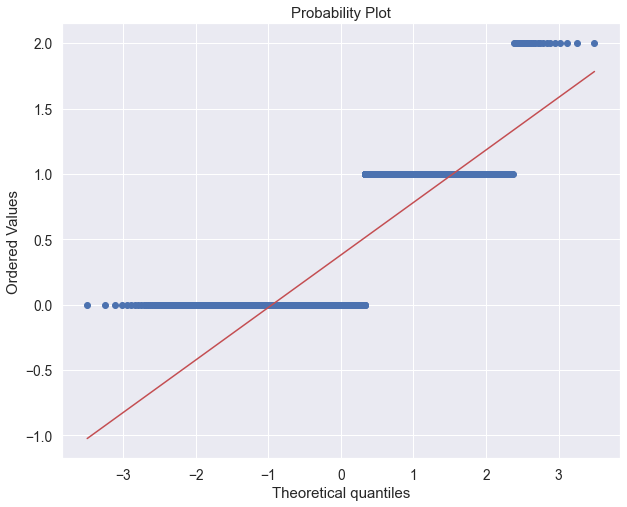

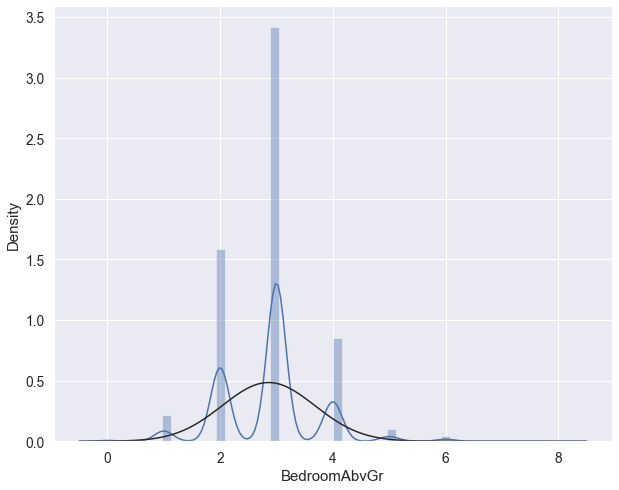

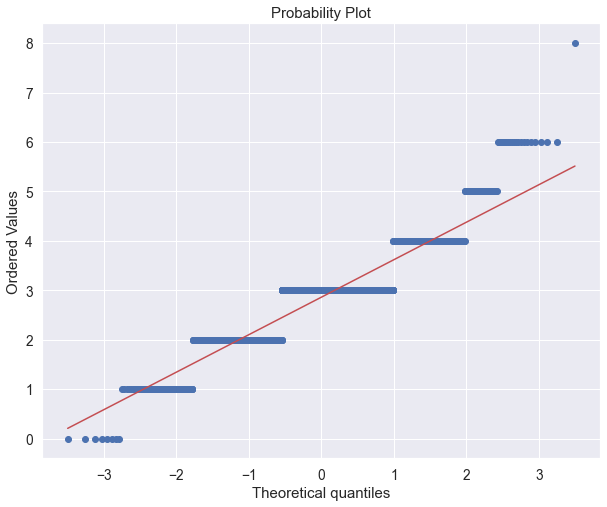

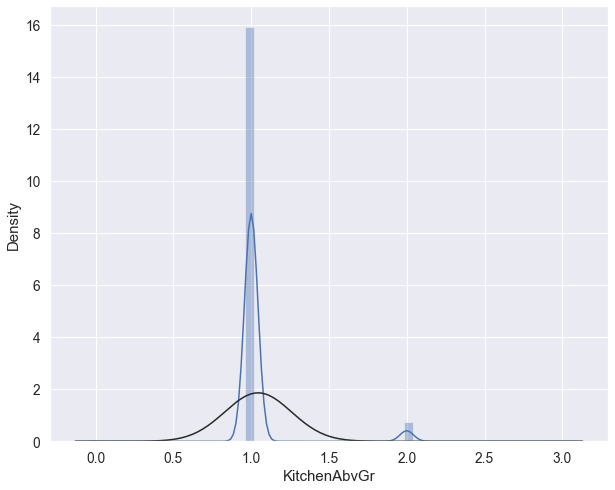

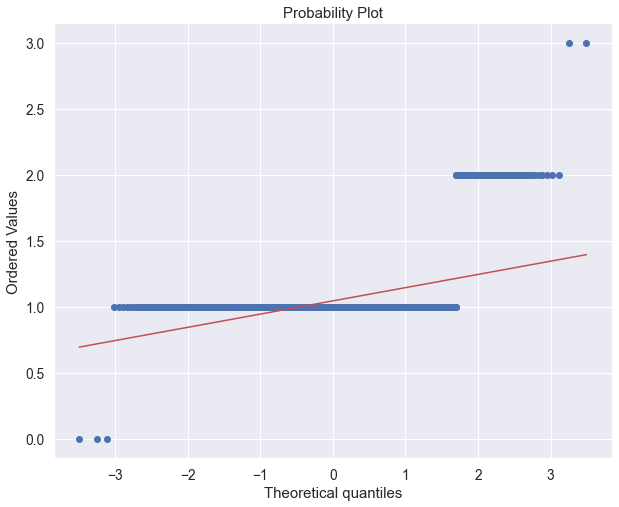

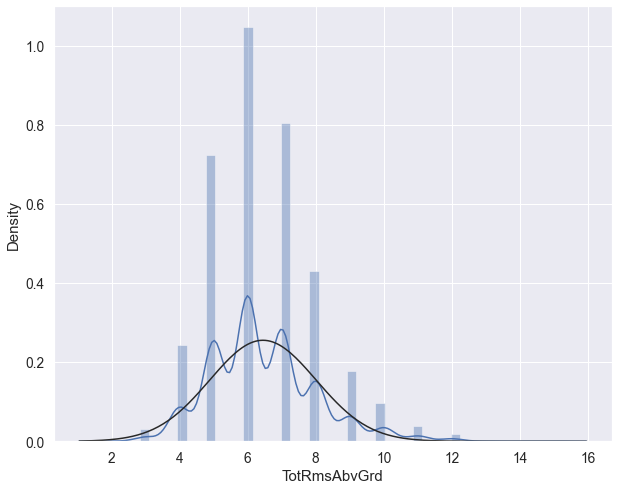

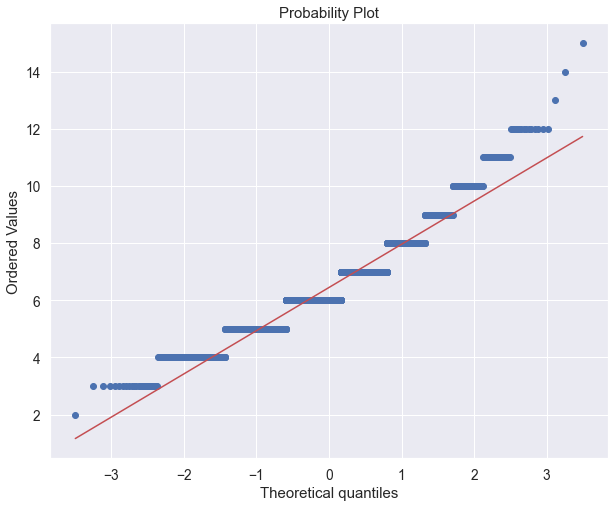

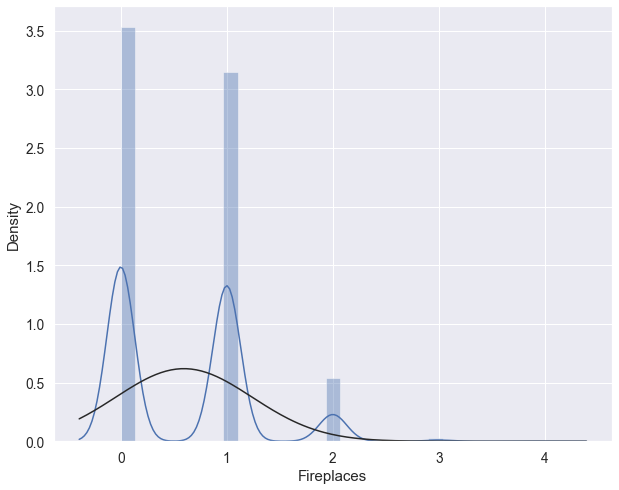

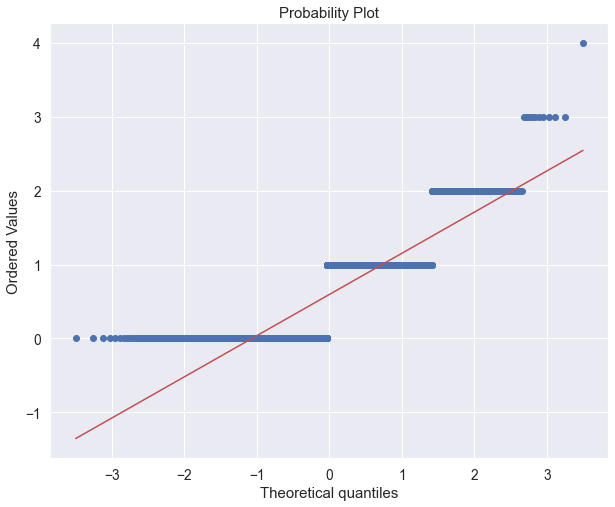

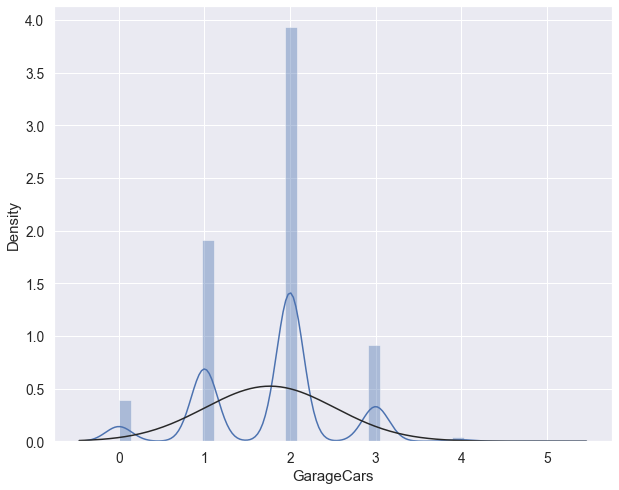

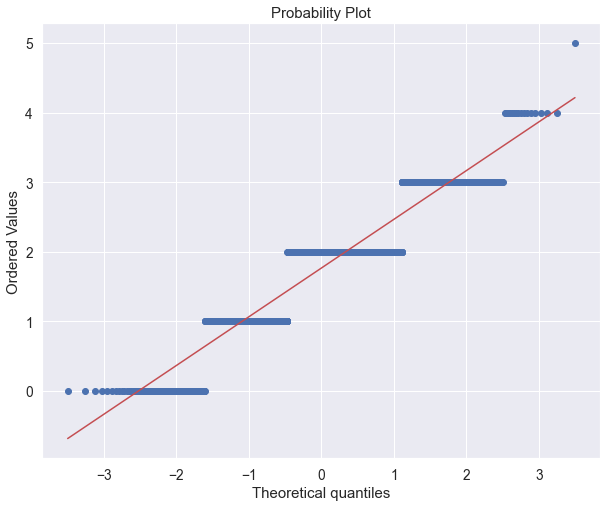

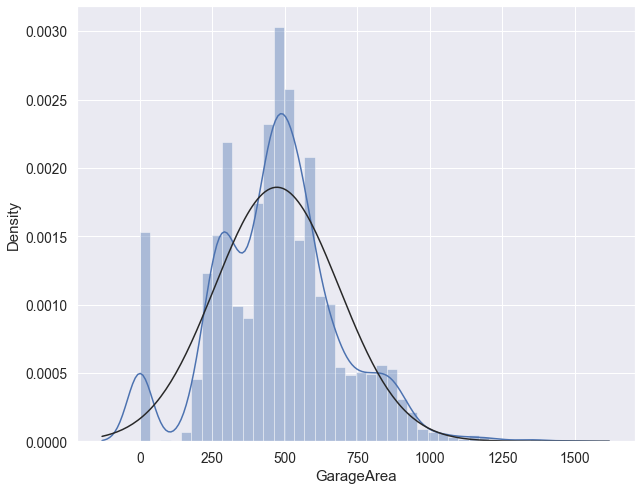

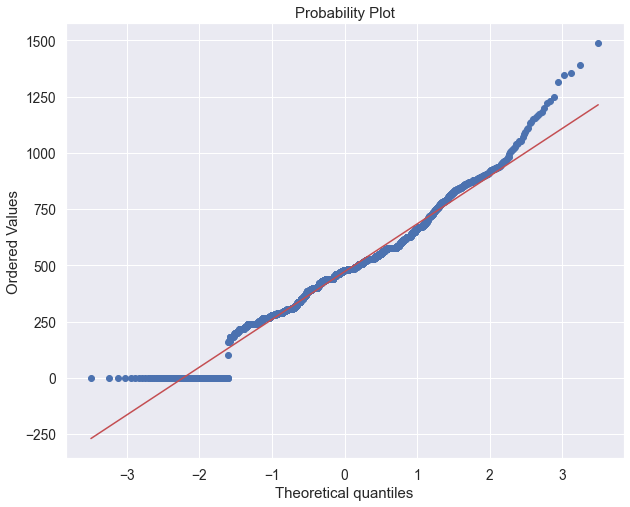

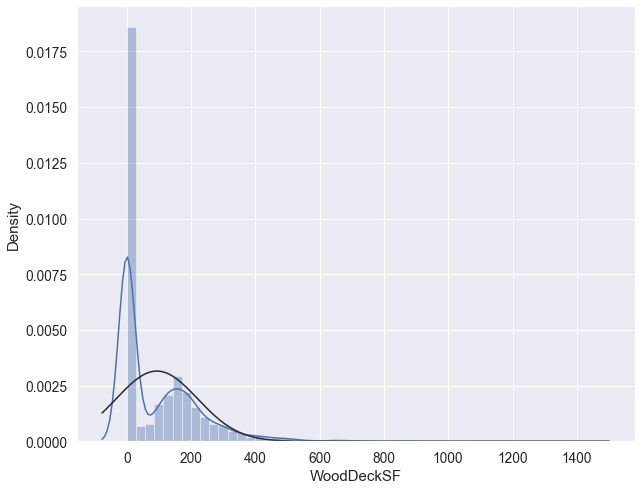

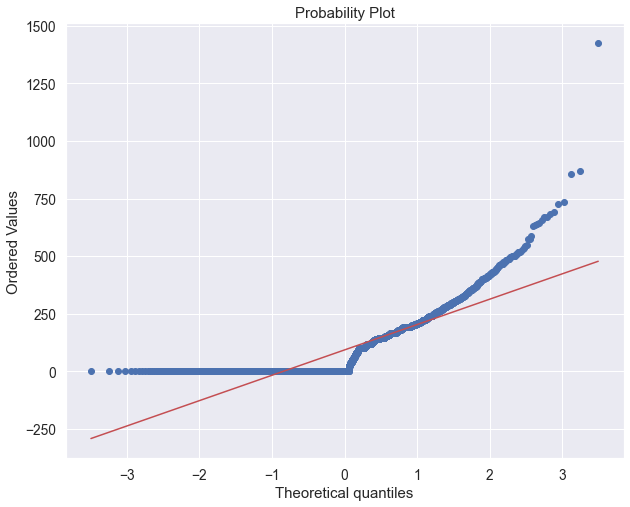

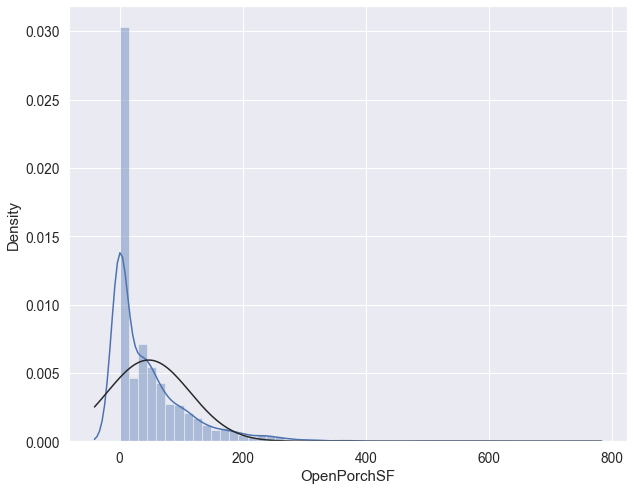

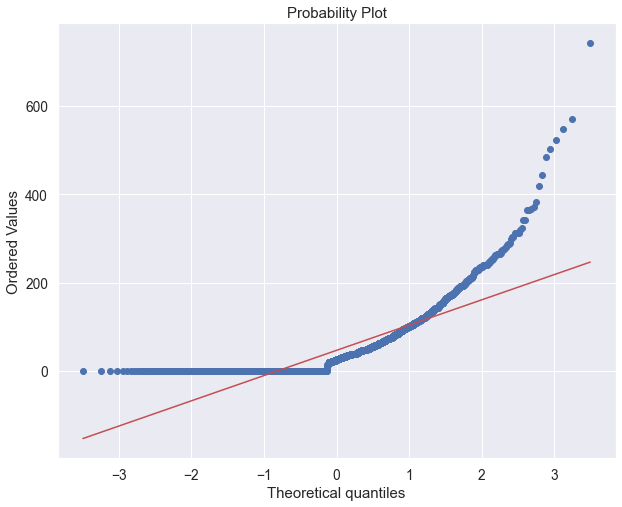

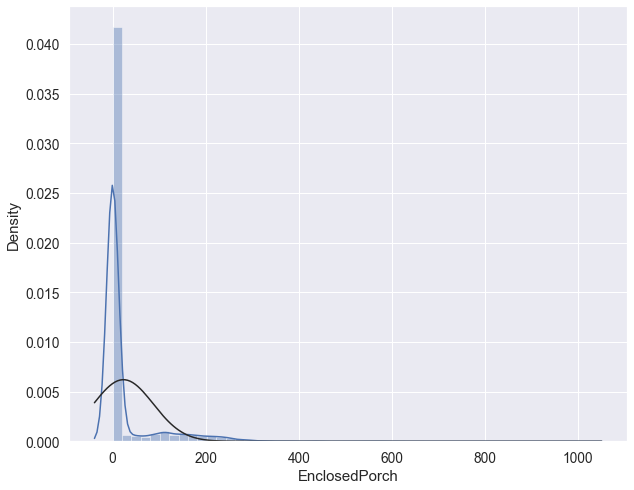

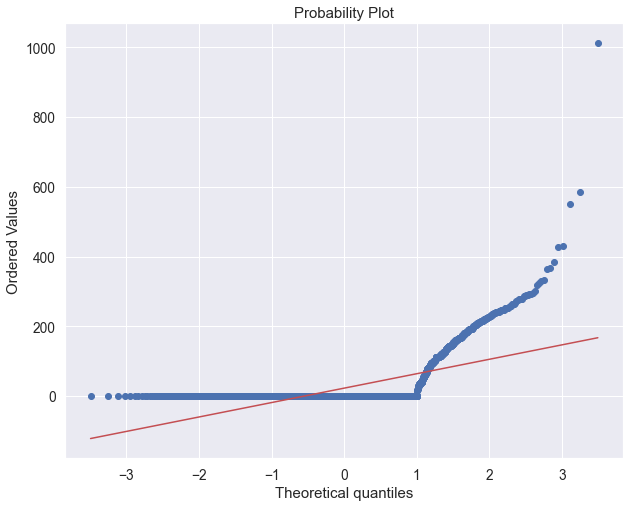

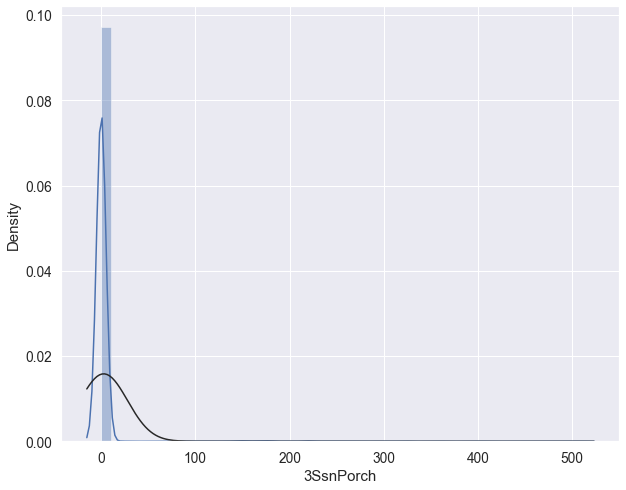

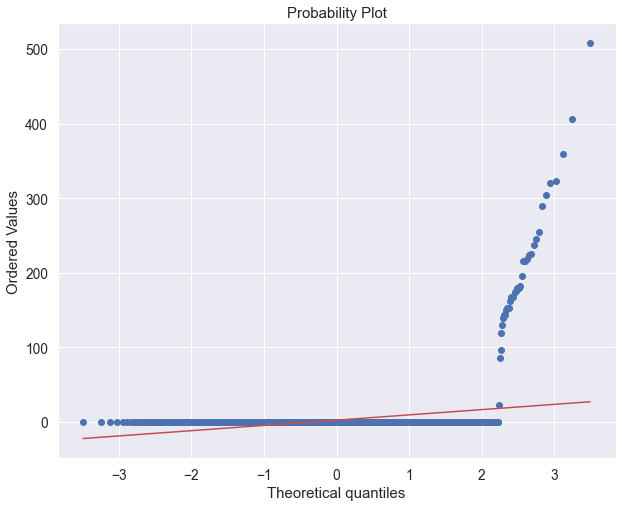

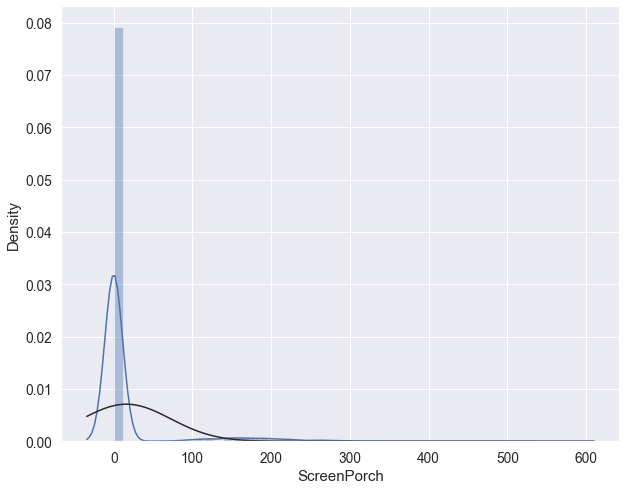

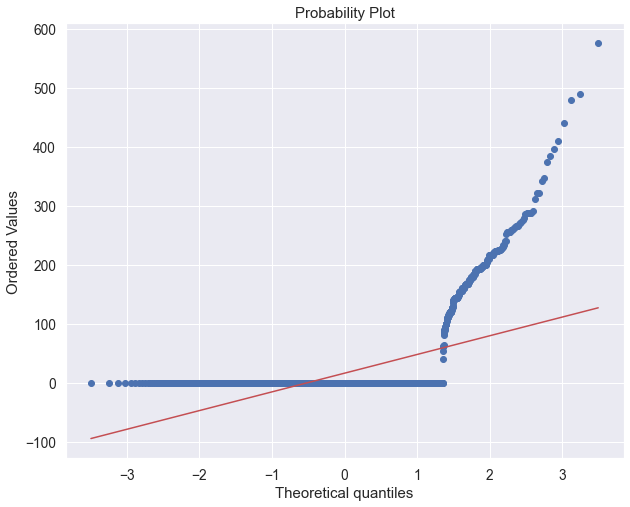

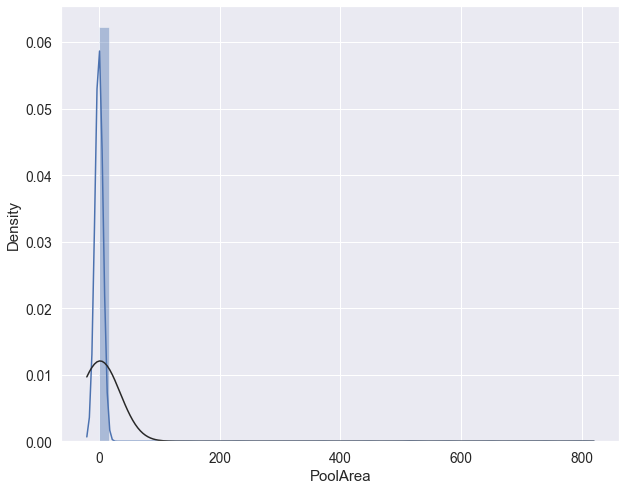

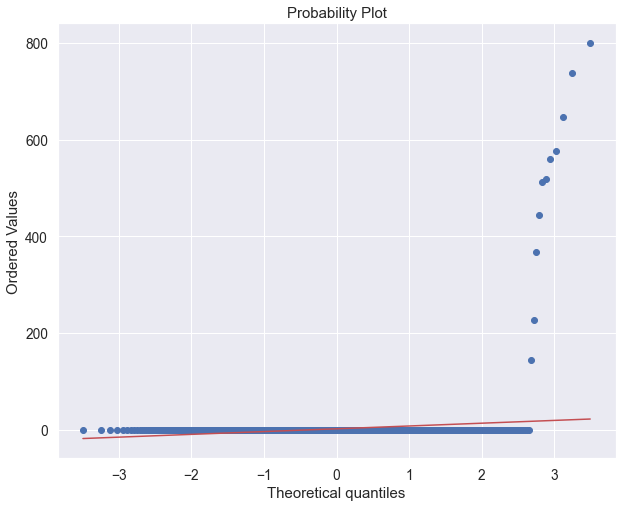

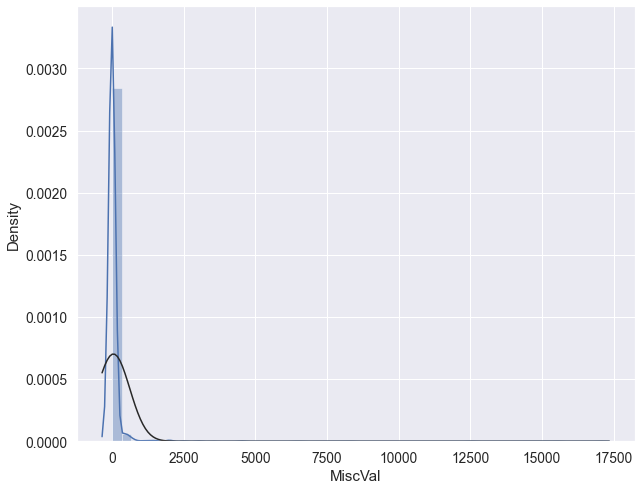

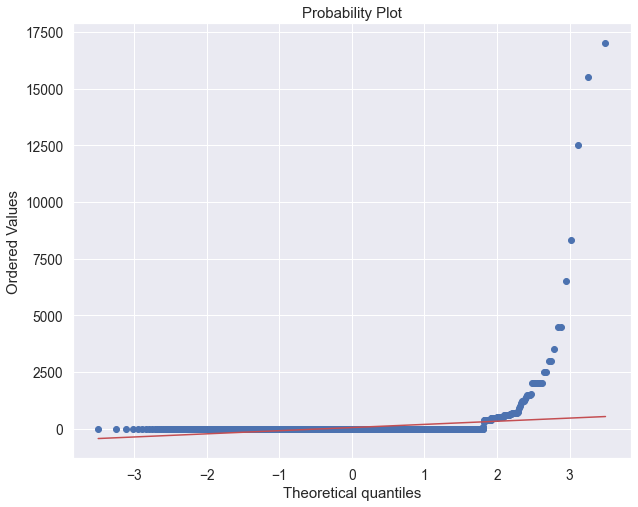

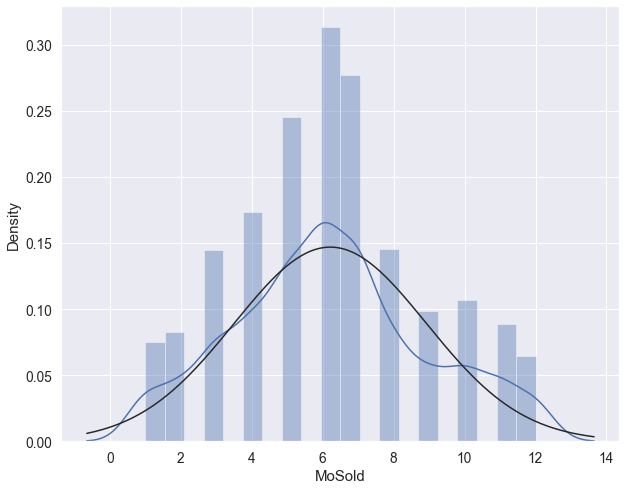

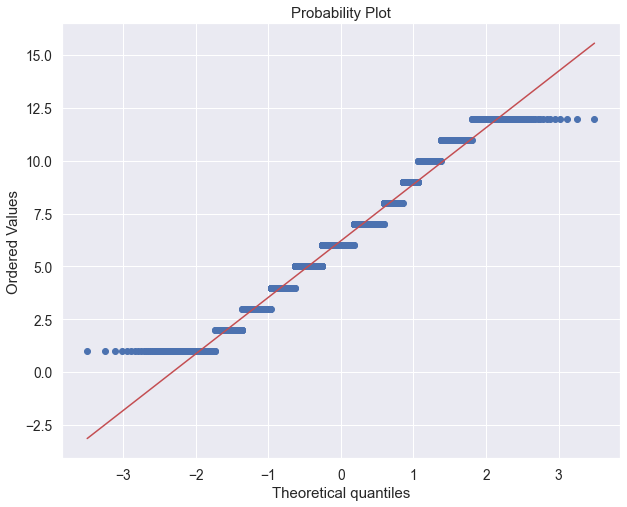

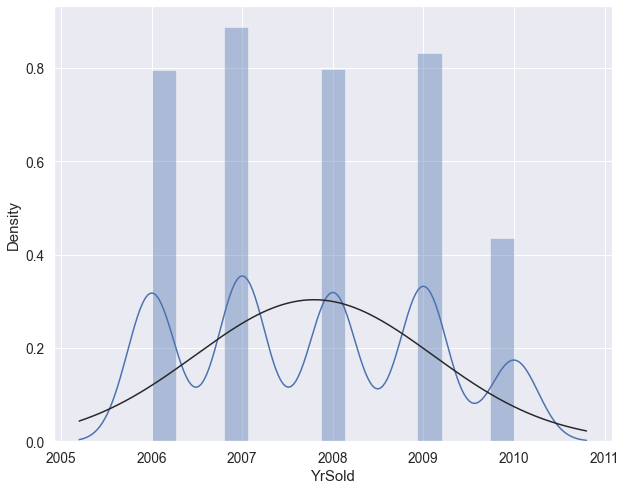

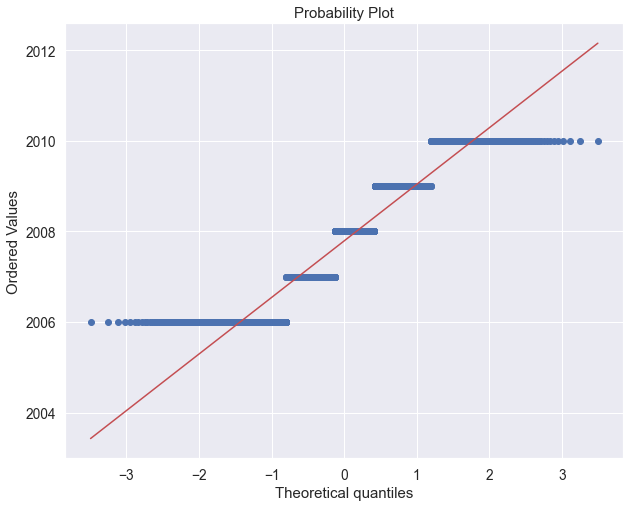

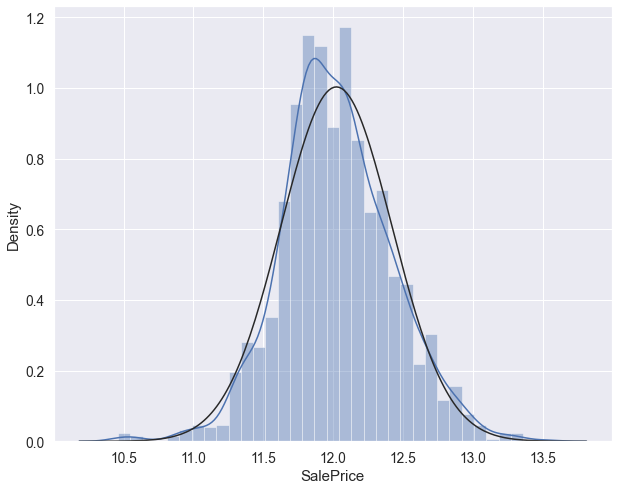

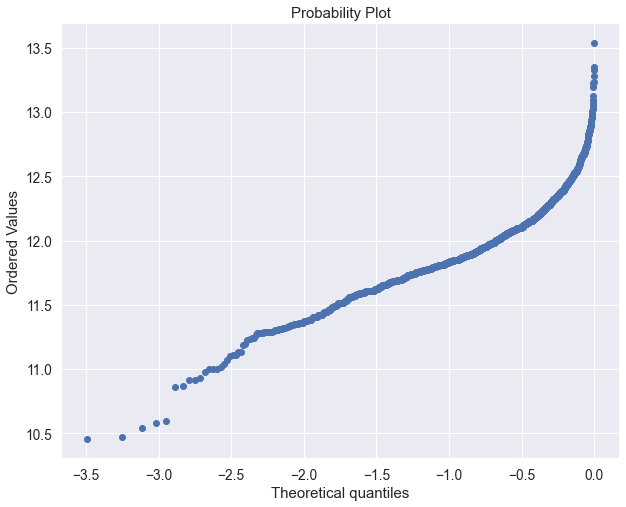

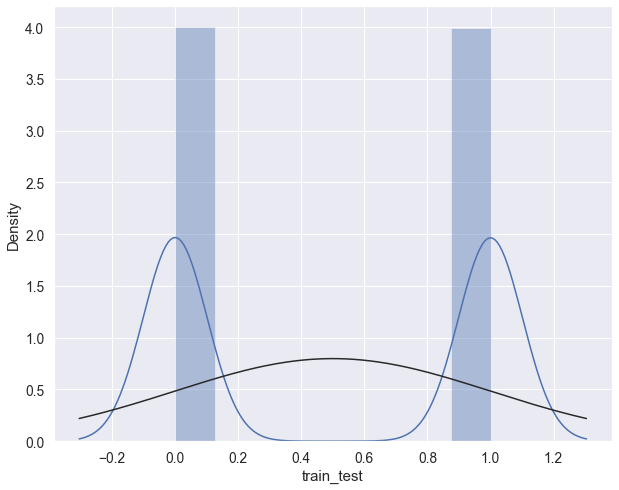

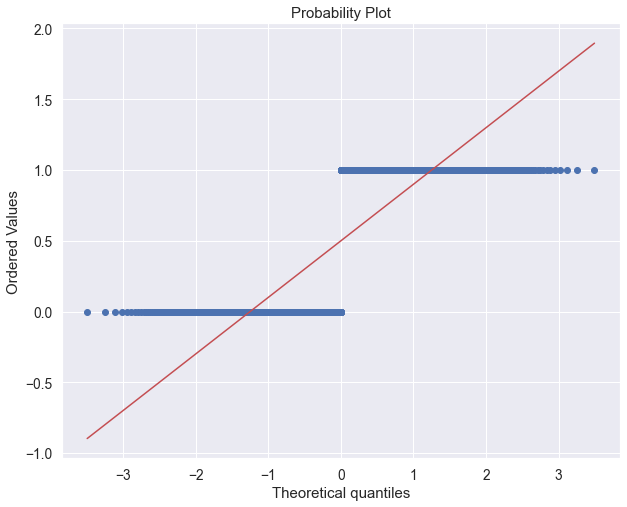

In [36]:
# PLOTTING THE NUMERICAL COLUMNS BEFORE SKEWNESS
all_data_numeric = all_data.loc[:, all_data.dtypes != np.object]

for i in all_data_numeric:
    fig = plt.figure()
    sns.distplot(all_data[i], fit=norm);
    fig = plt.figure()
    res = stats.probplot(all_data[i], plot=plt)

In [37]:
# finding skewed data columns
all_data_numeric = all_data.loc[:, all_data.dtypes != np.object]
# we dont want to include 'SalePrice' in our skewed features cuz it is has already undergone the log transformation.
all_data_numeric = all_data_numeric.drop('SalePrice', axis = 1)
# all_data_numeric.dtypes
# skewed = all_data_numeric.apply (lambda x : skew(x))
skewness = pd.DataFrame(all_data_numeric.skew().sort_values(ascending = False))

skewed = []
j = 0
for i in skewness.values:
    if abs(i) > 0.75:
        skewed.append(skewness.index[j])
    j += 1
# len(skewed)

C:\Users\Pouria\AppData\Local\Temp/ipykernel_11920/3415010223.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  all_data_numeric = all_data.loc[:, all_data.dtypes != np.object]


In [38]:
# now we use boxcox transformation toreduce skewness of the skewed features.
from scipy.special import boxcox1p
lam = 0.15
for item in skewed:
    all_data[item] = boxcox1p(all_data[item], lam)

C:\Users\Pouria\AppData\Local\Temp/ipykernel_11920/4007888097.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  all_data_numeric = all_data.loc[:, all_data.dtypes != np.object]
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `d

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

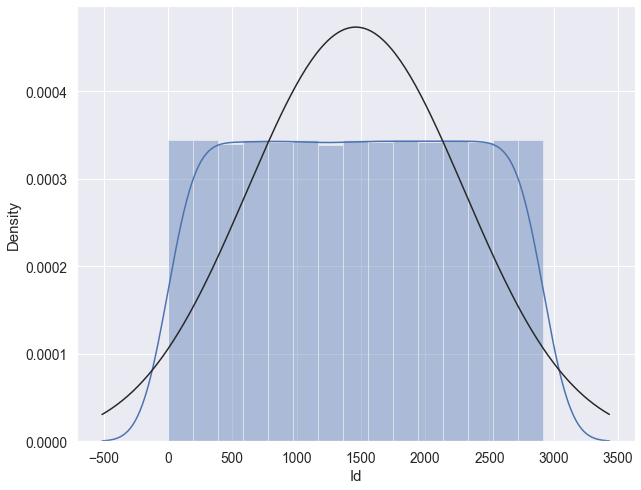

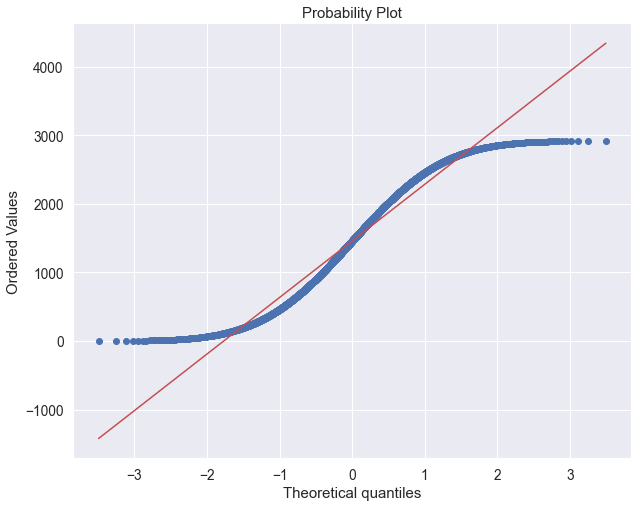

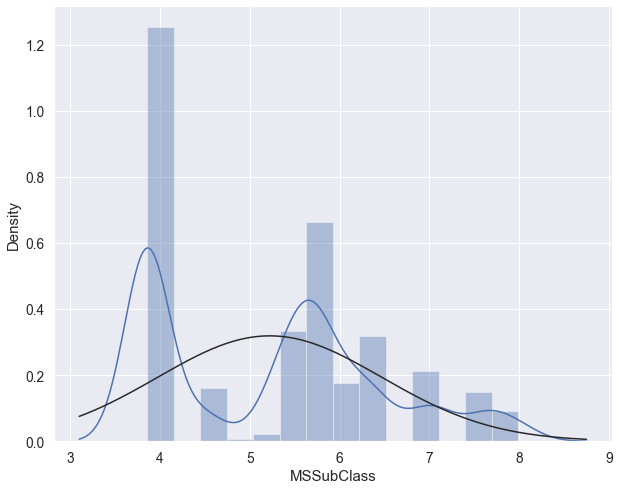

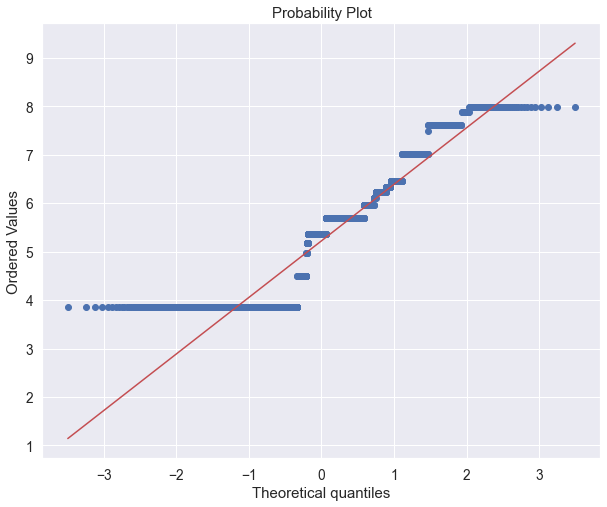

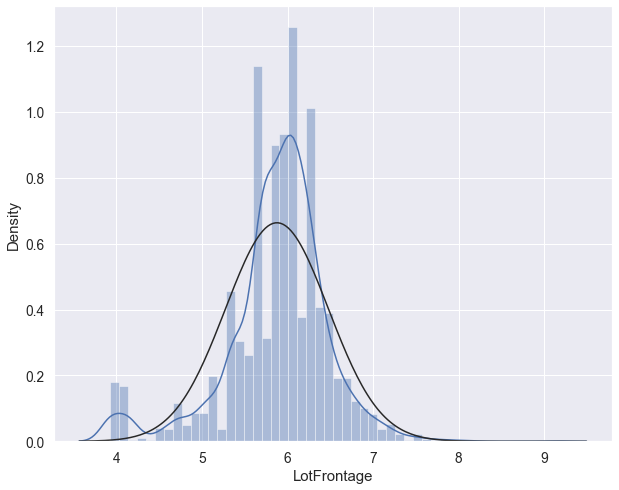

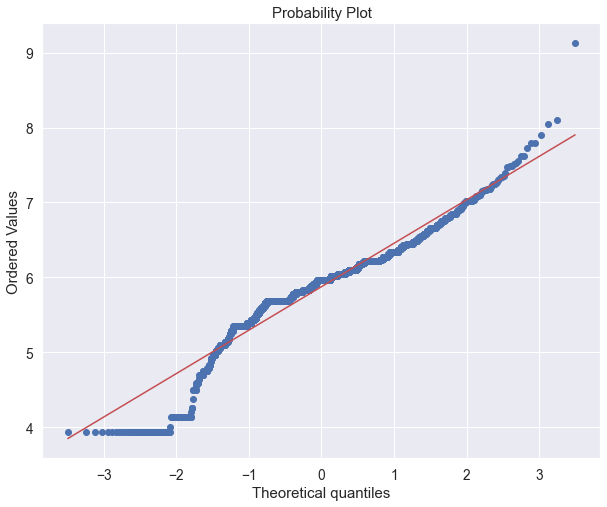

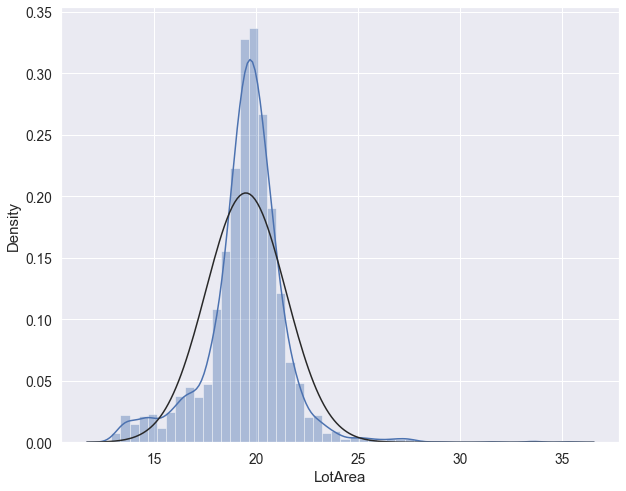

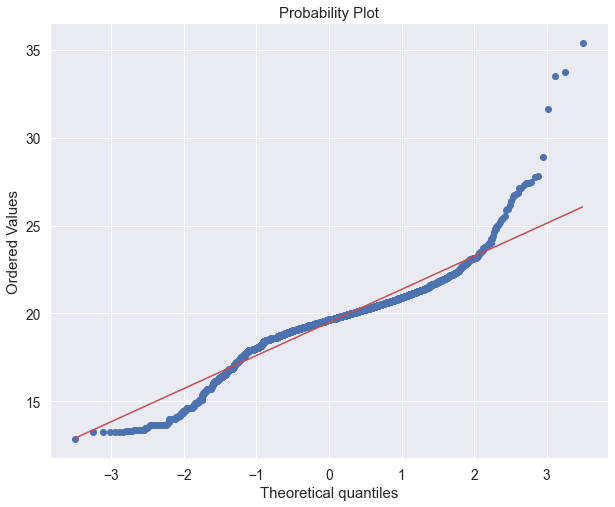

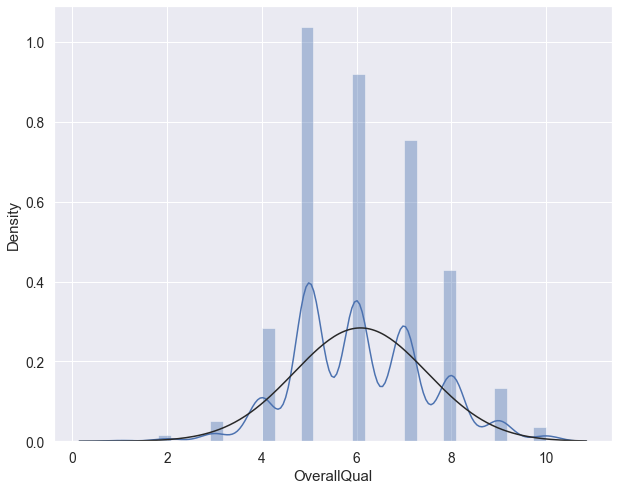

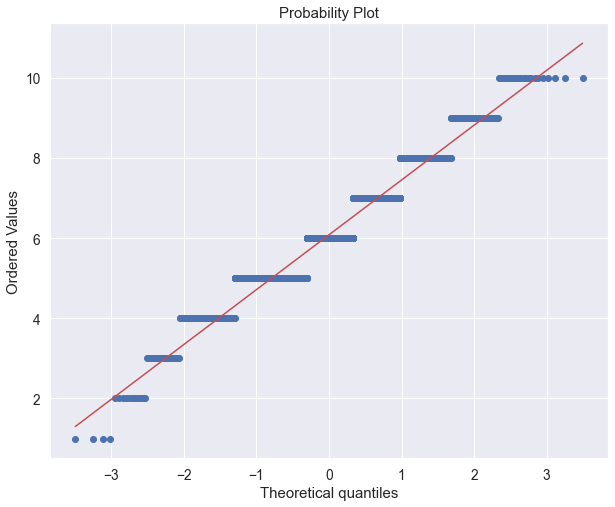

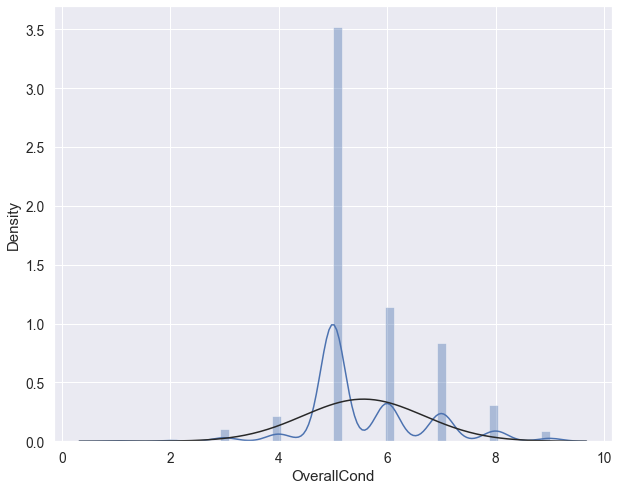

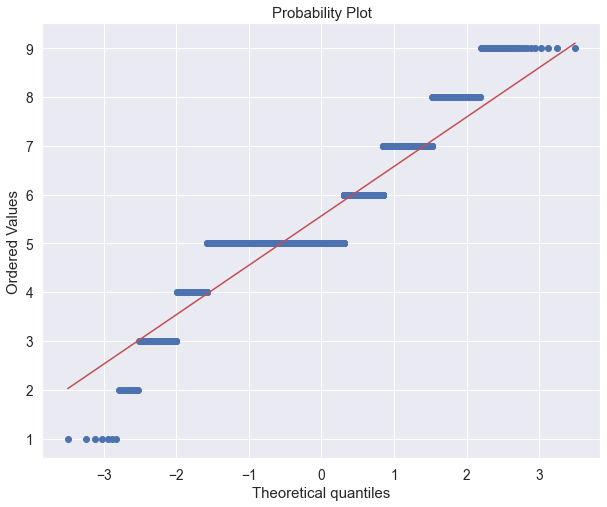

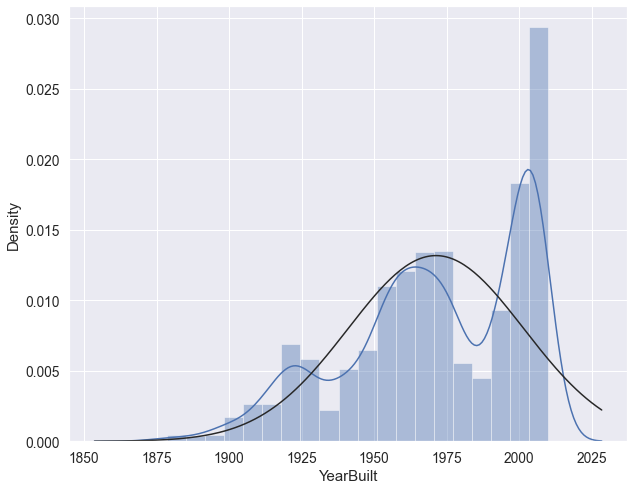

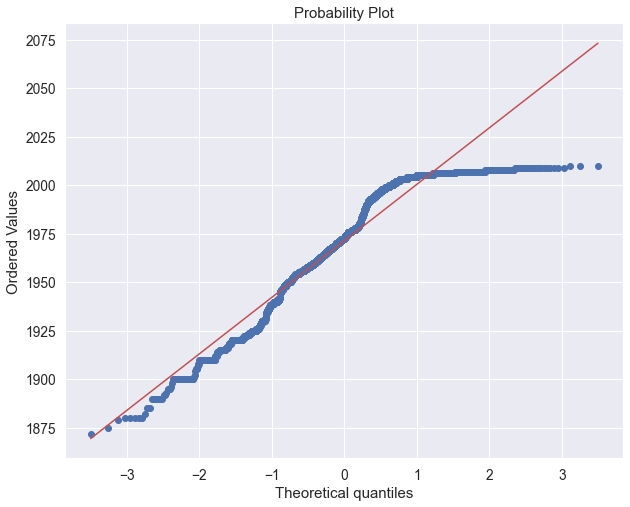

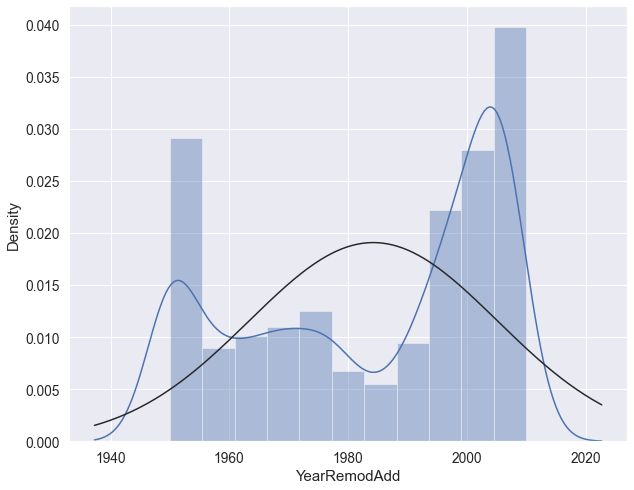

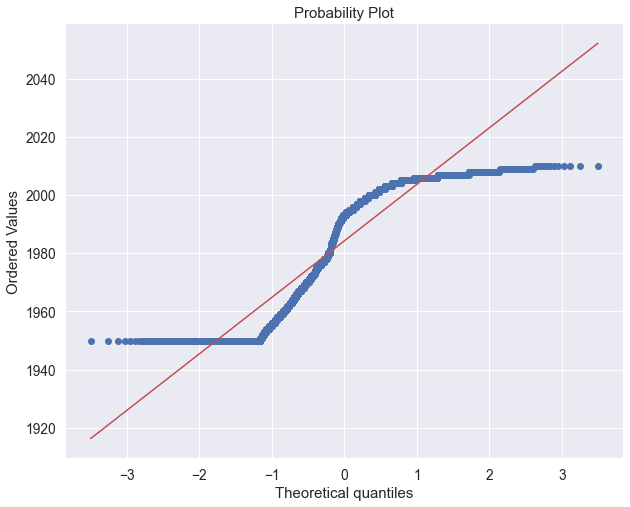

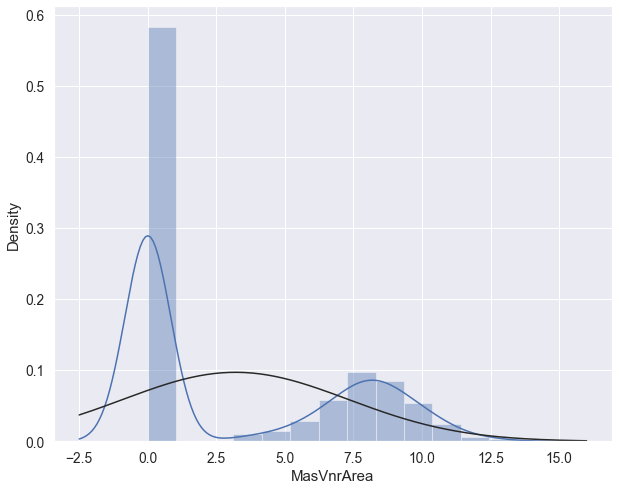

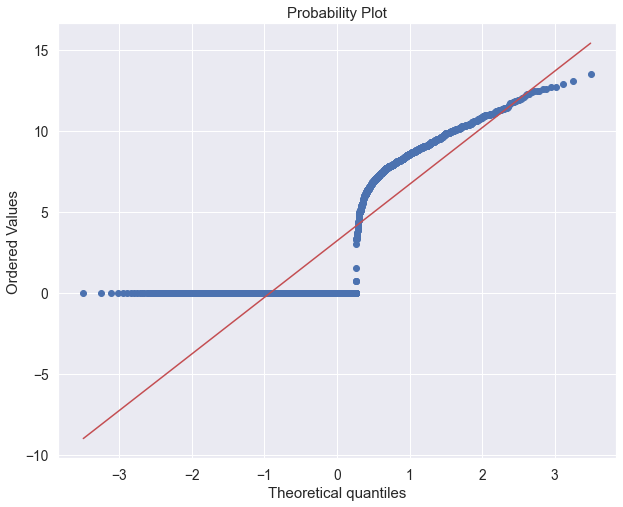

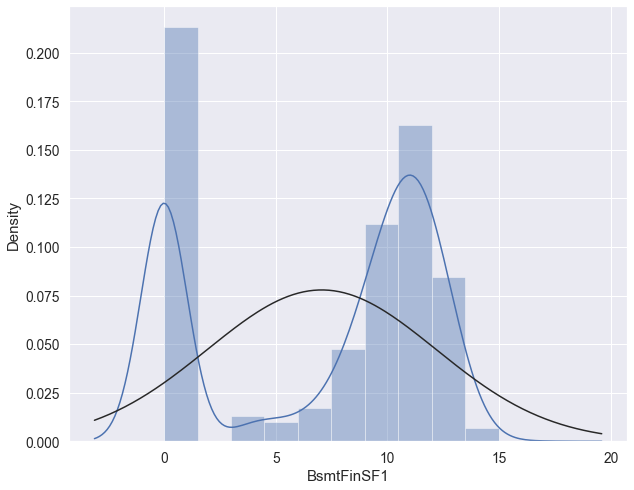

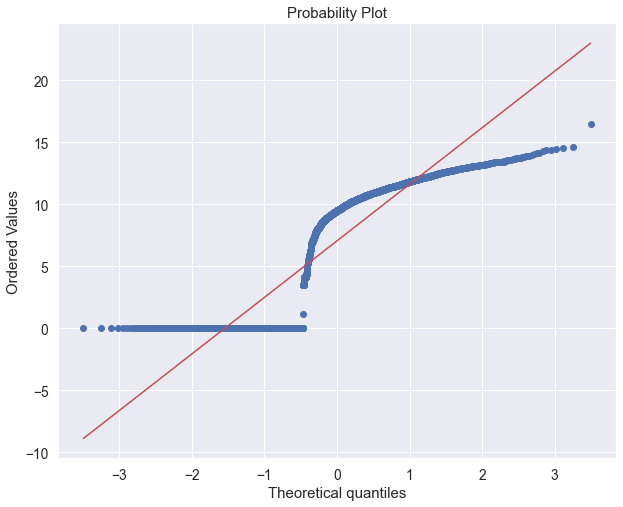

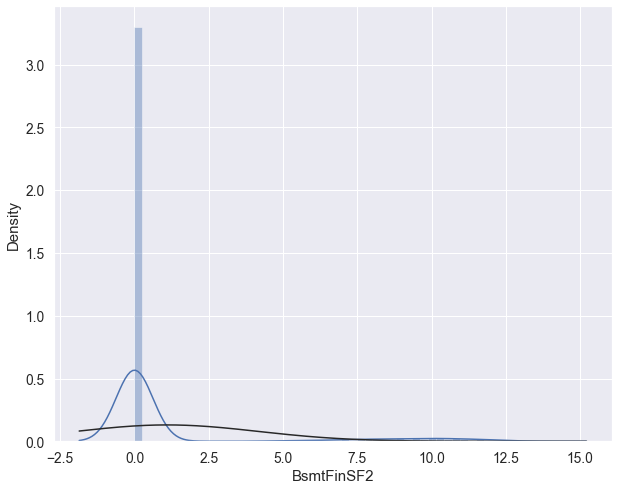

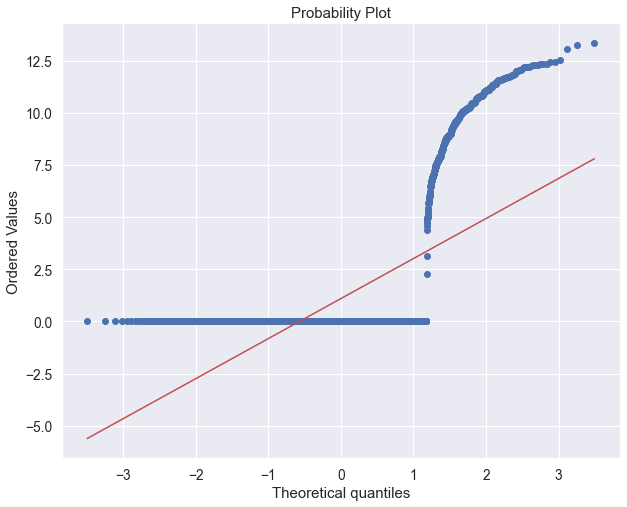

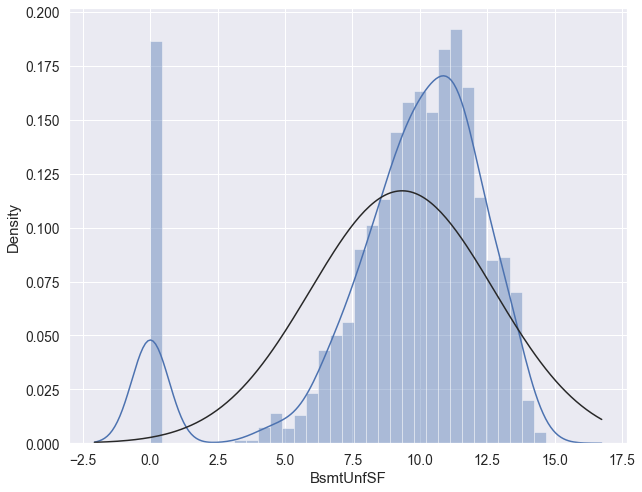

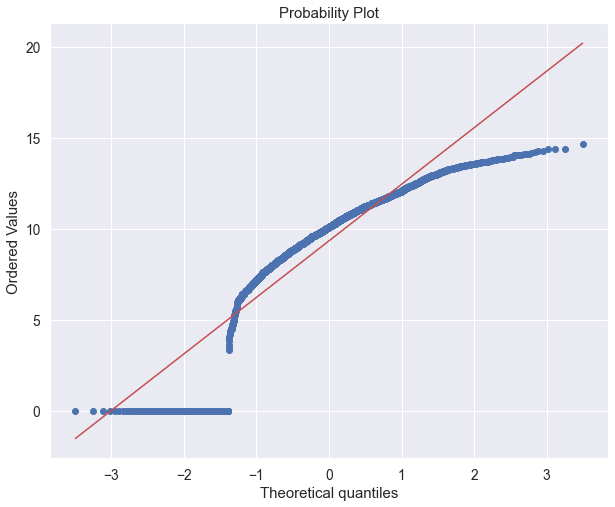

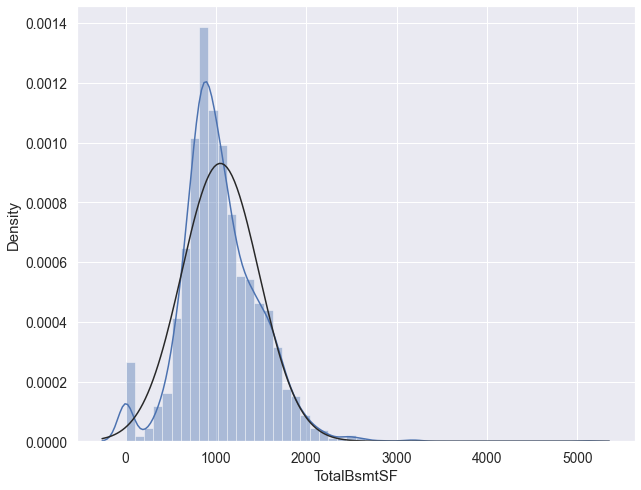

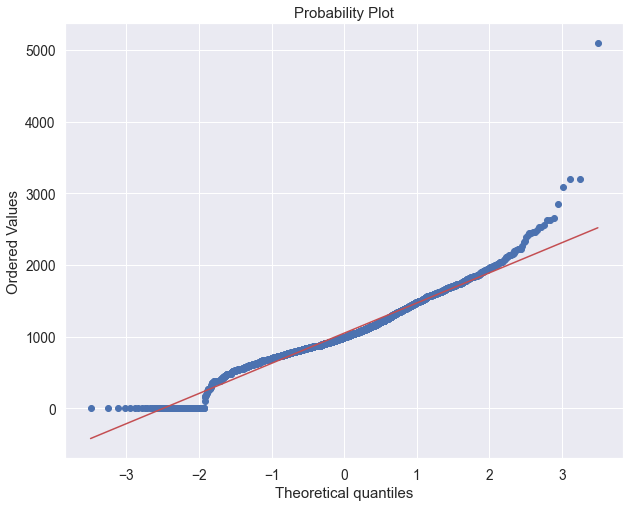

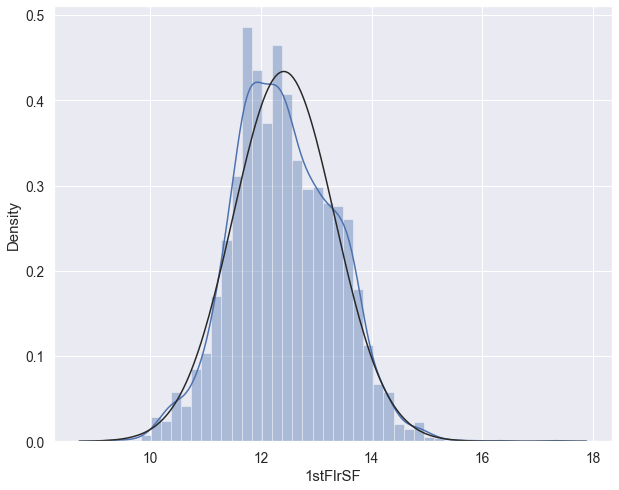

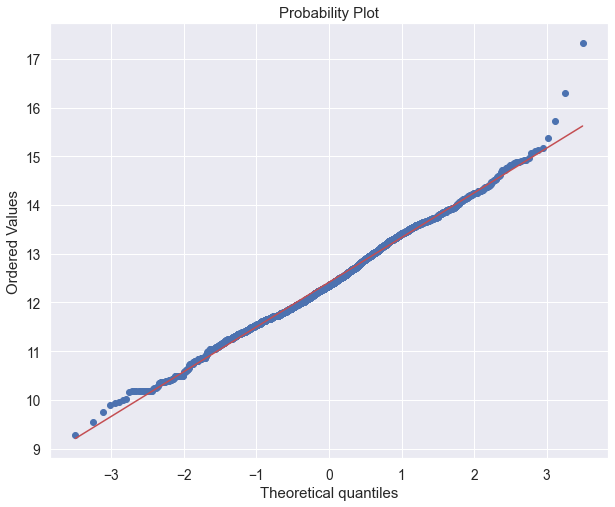

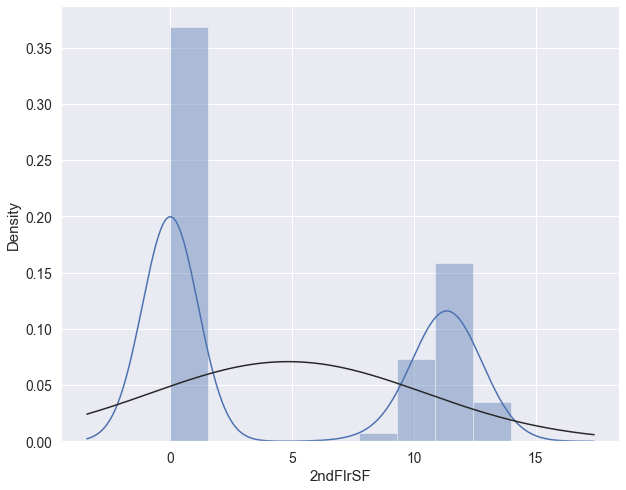

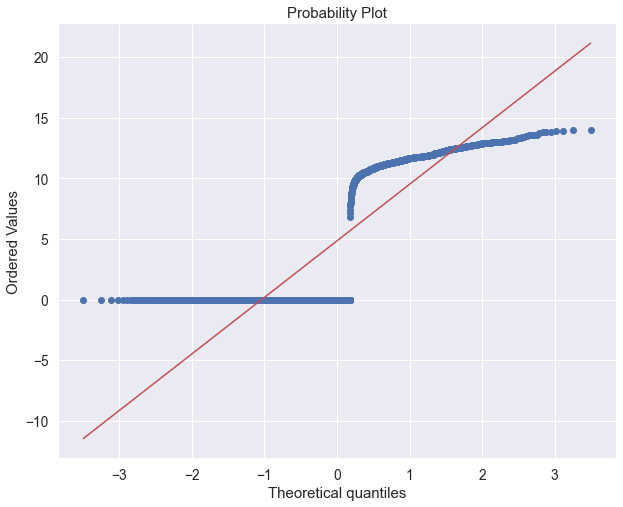

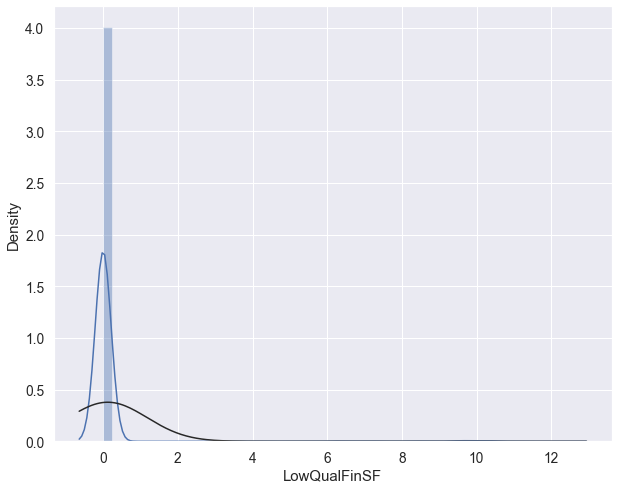

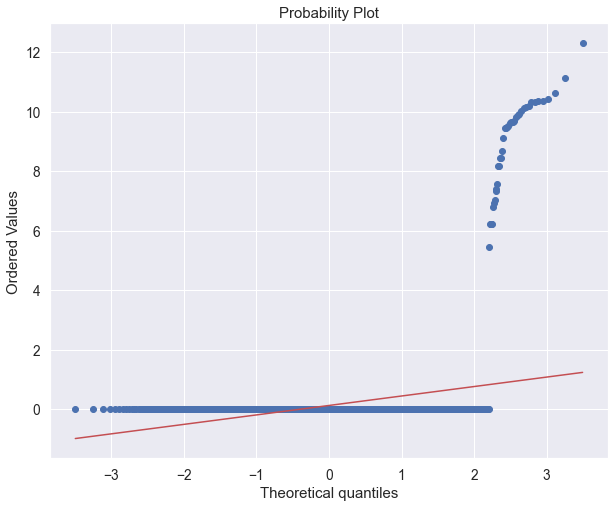

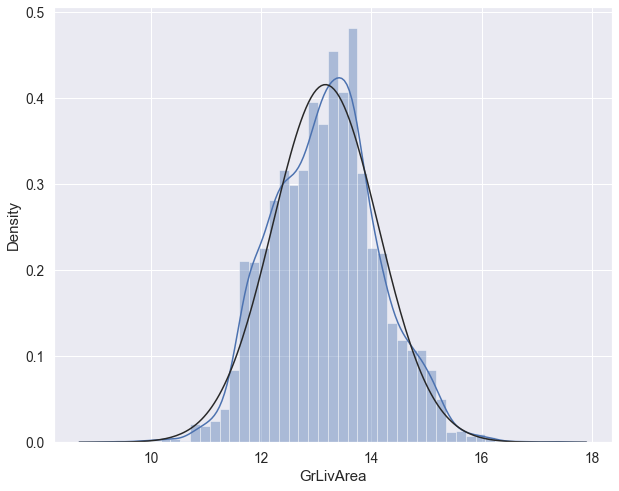

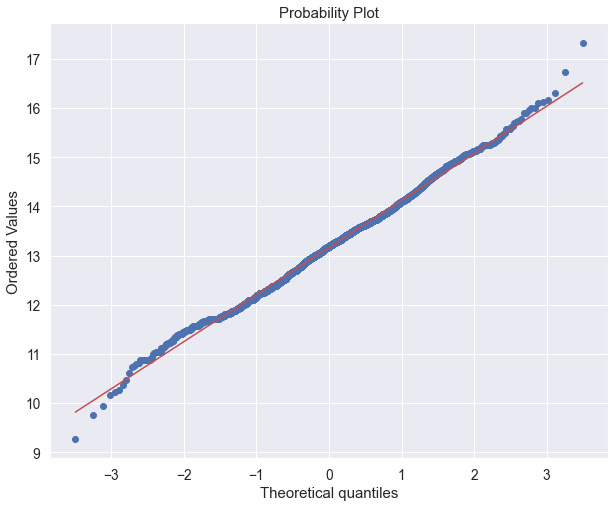

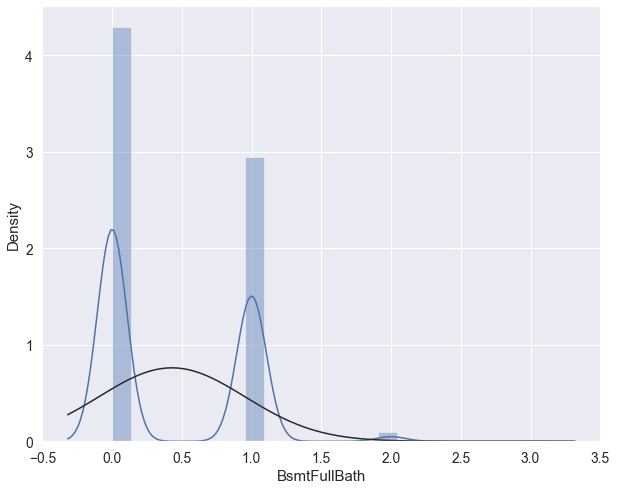

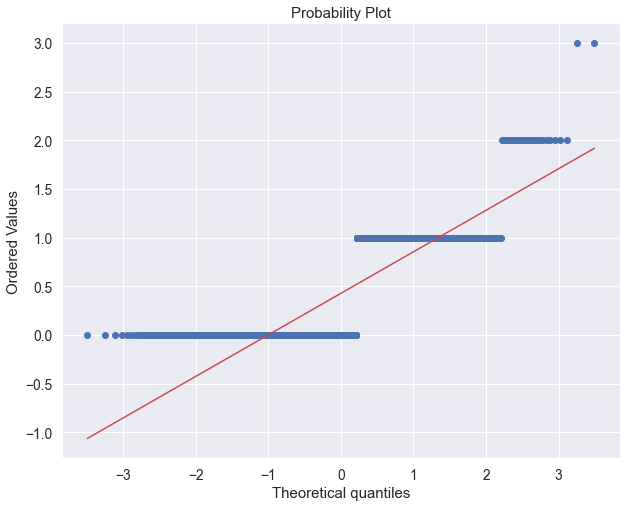

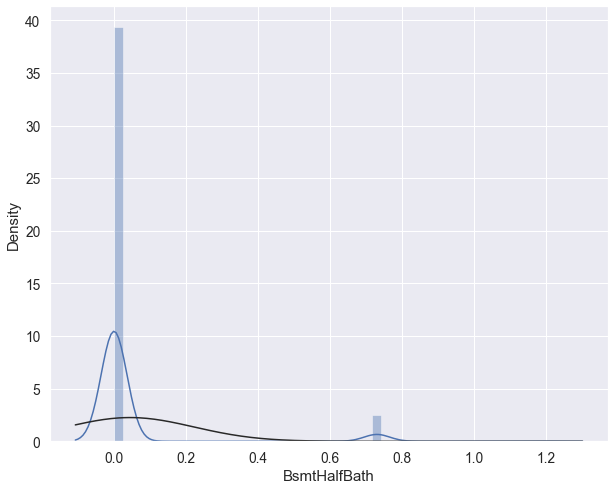

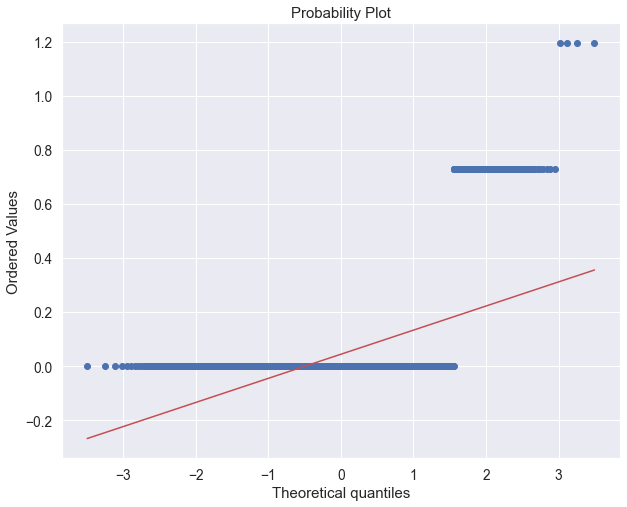

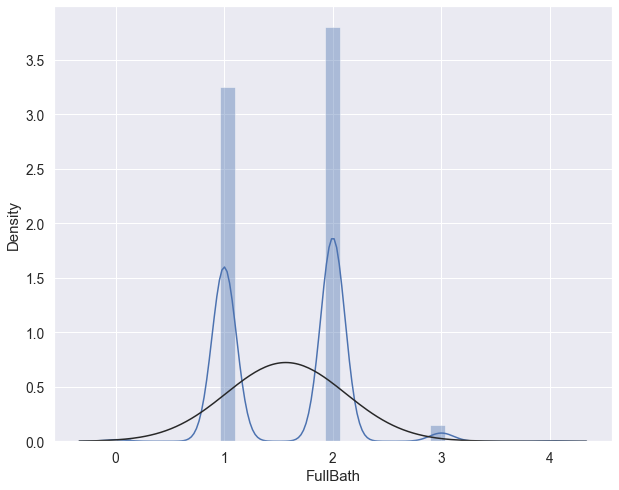

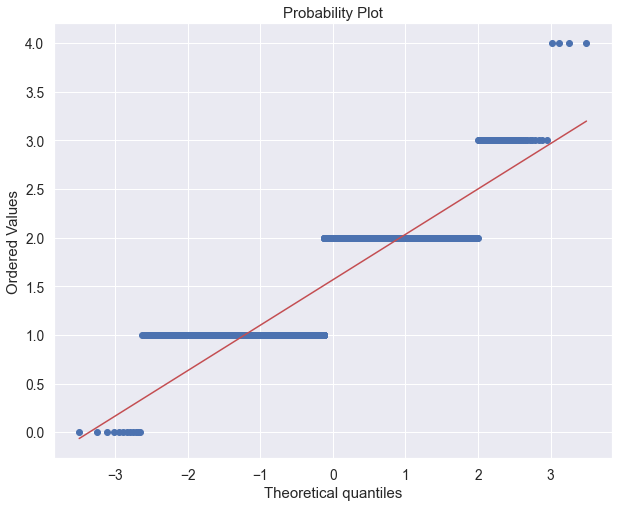

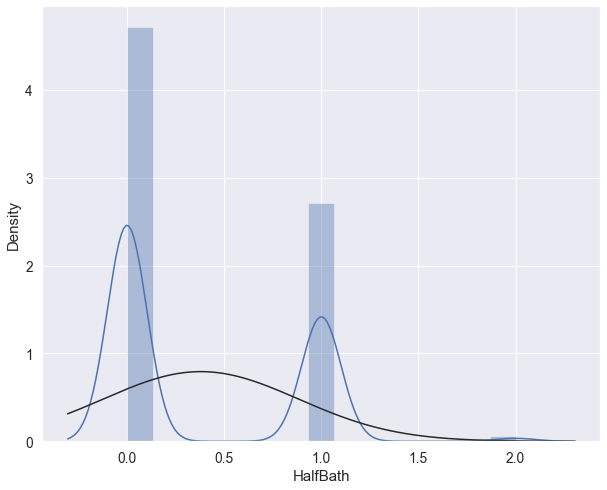

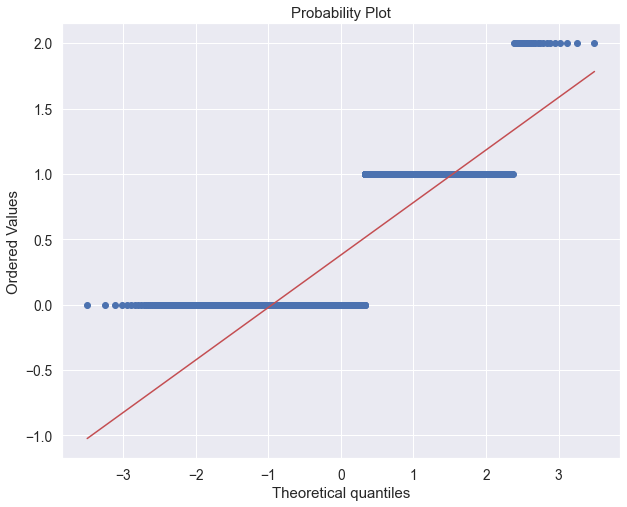

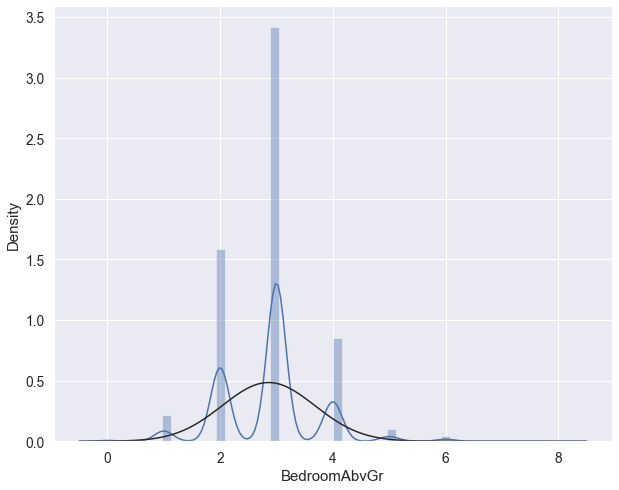

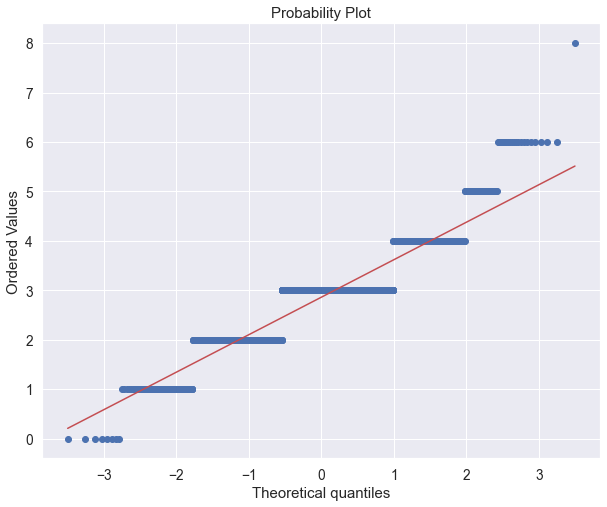

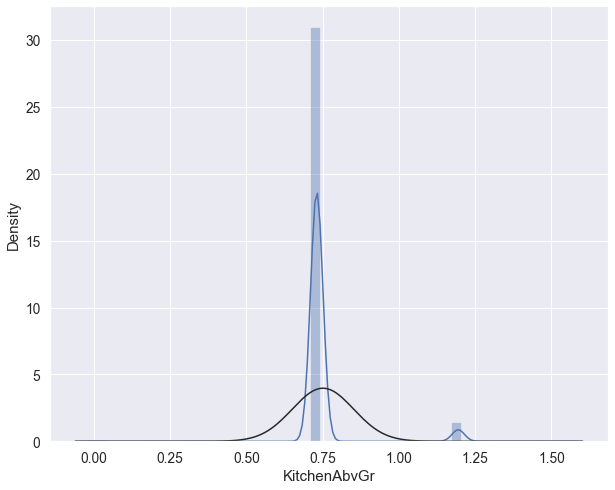

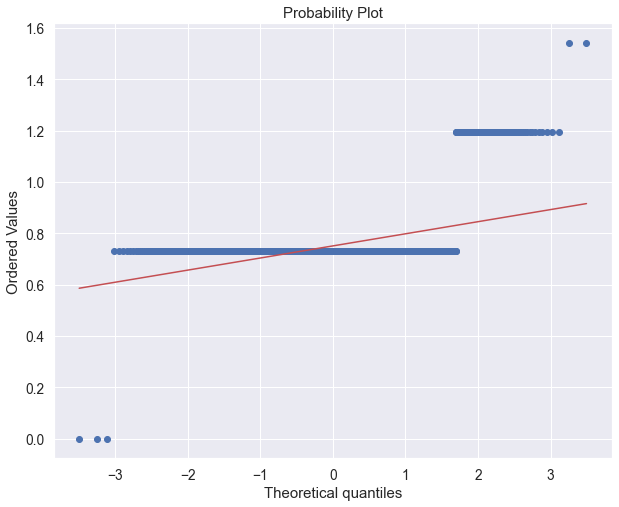

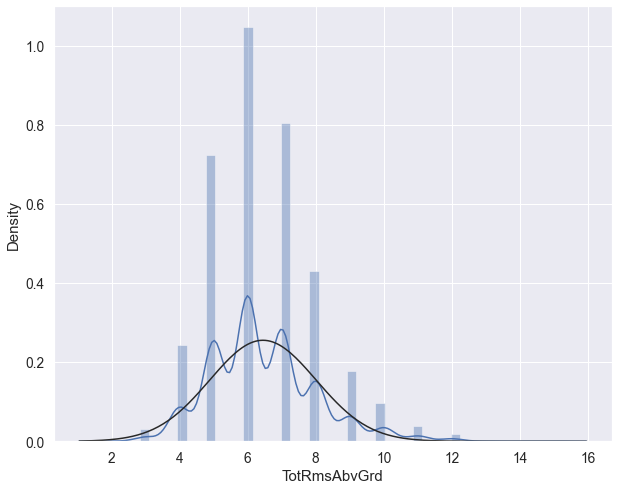

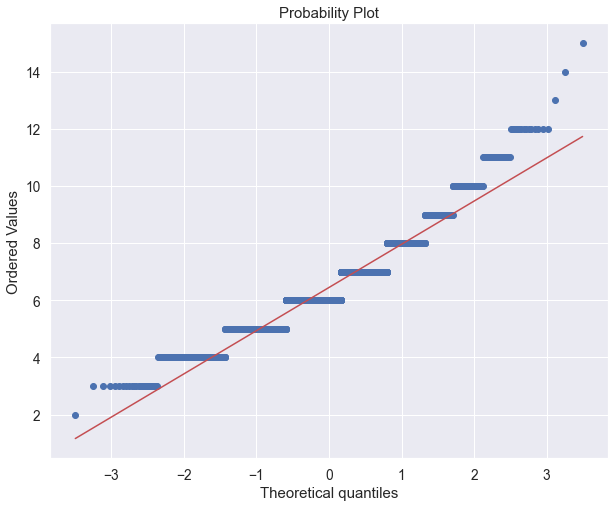

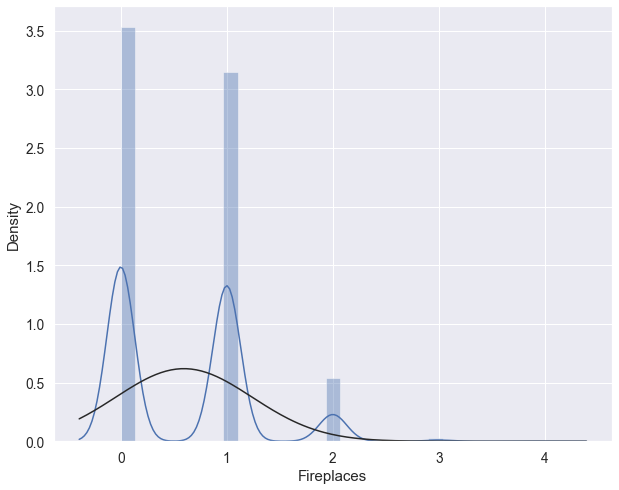

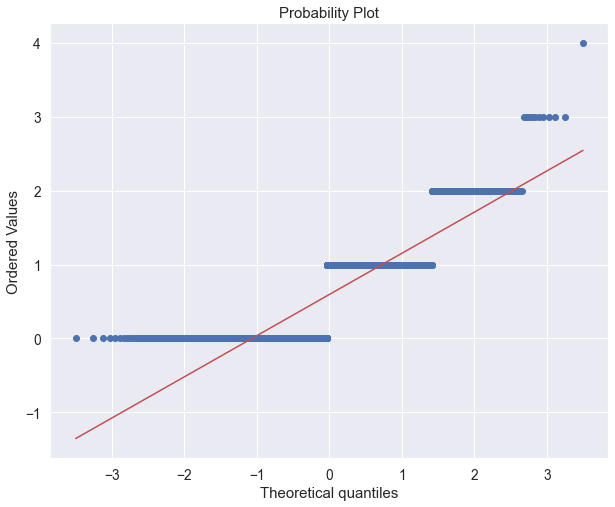

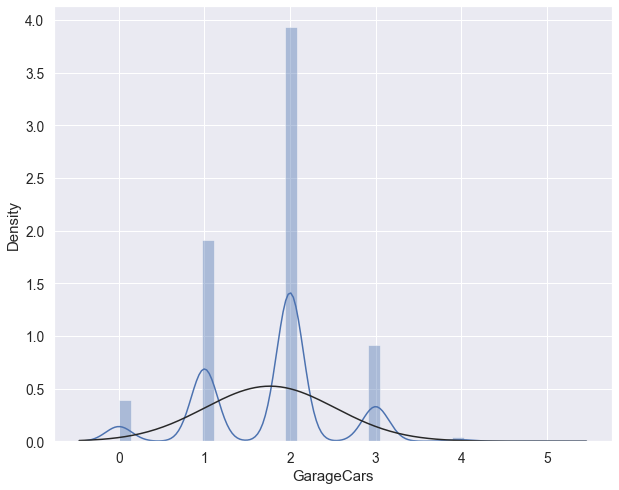

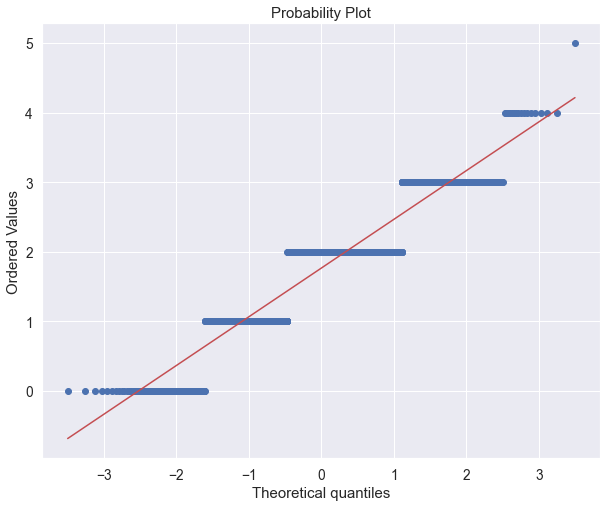

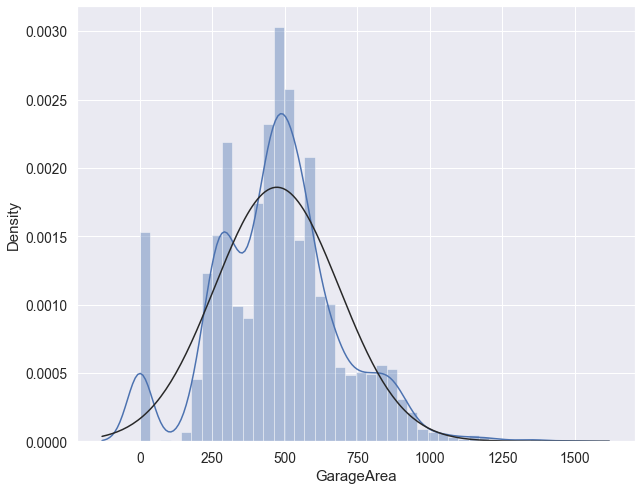

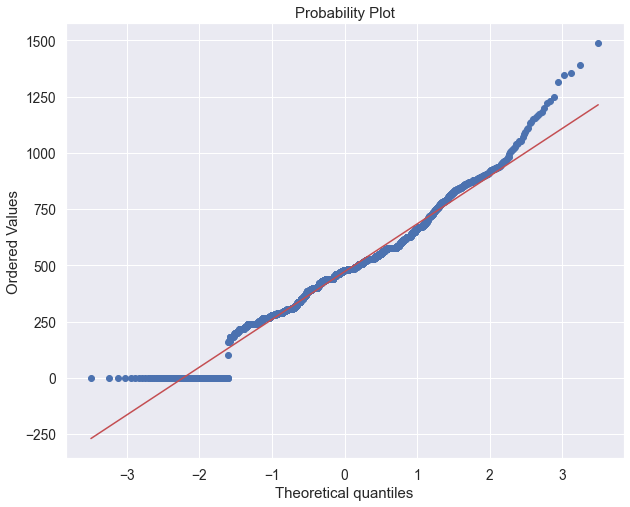

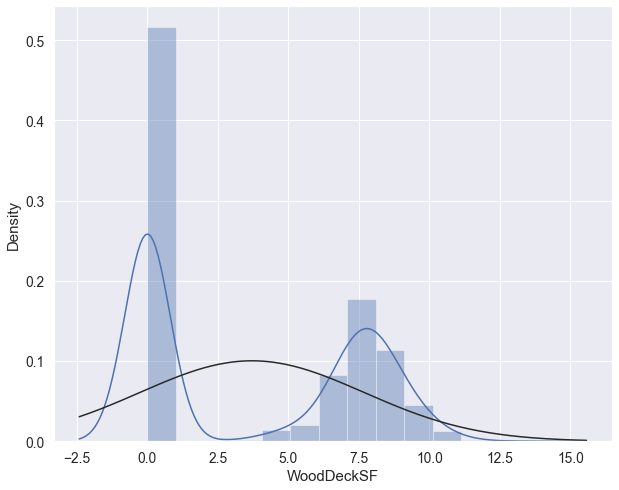

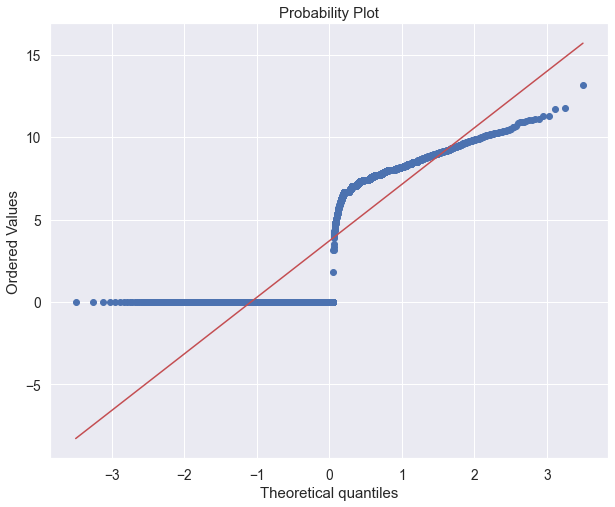

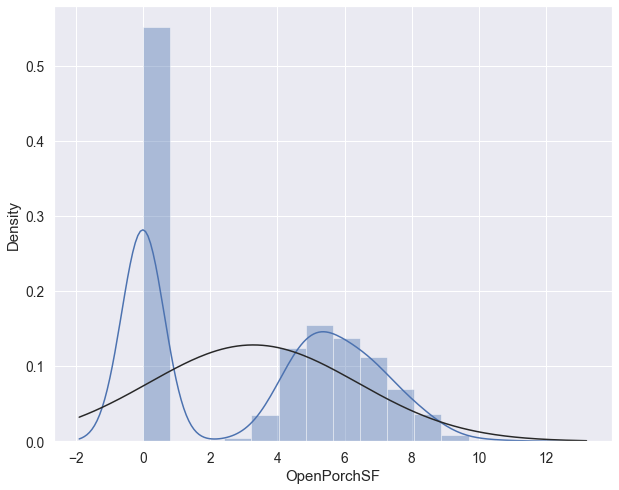

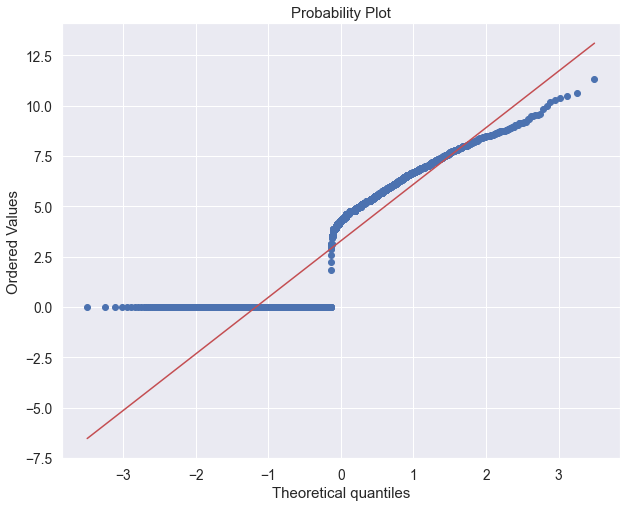

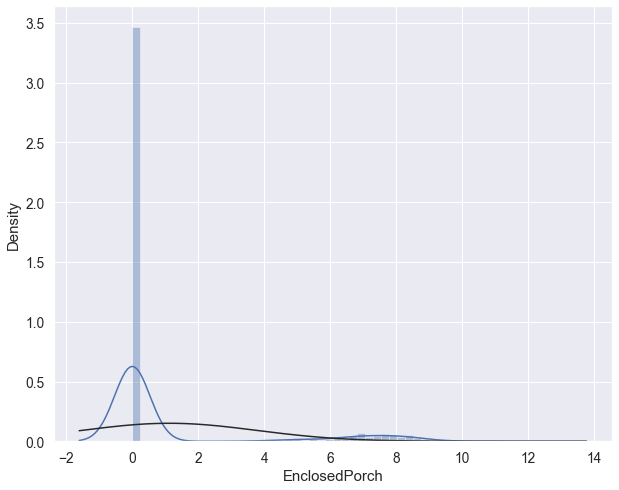

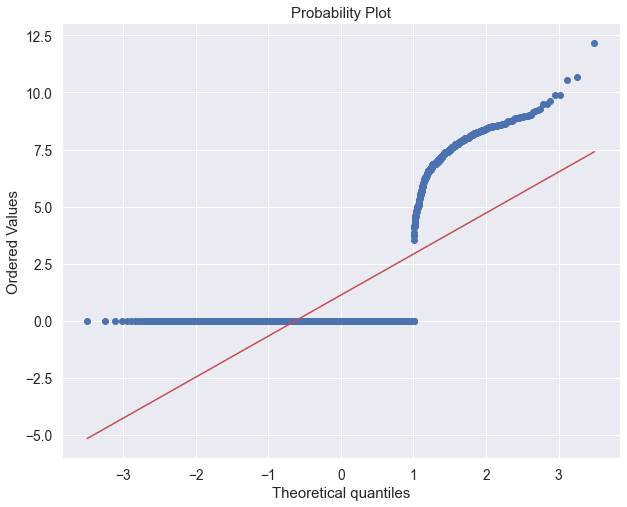

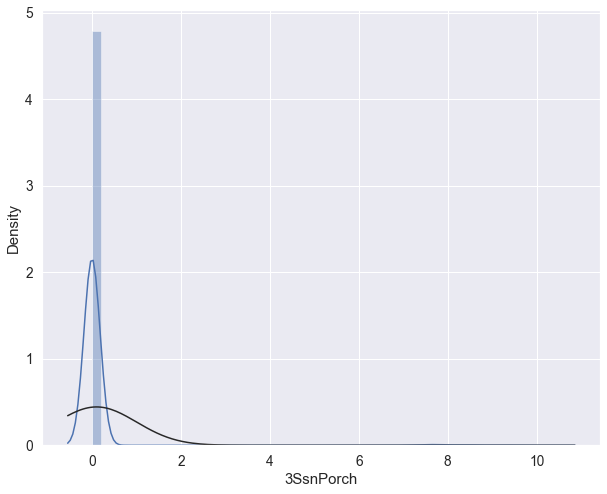

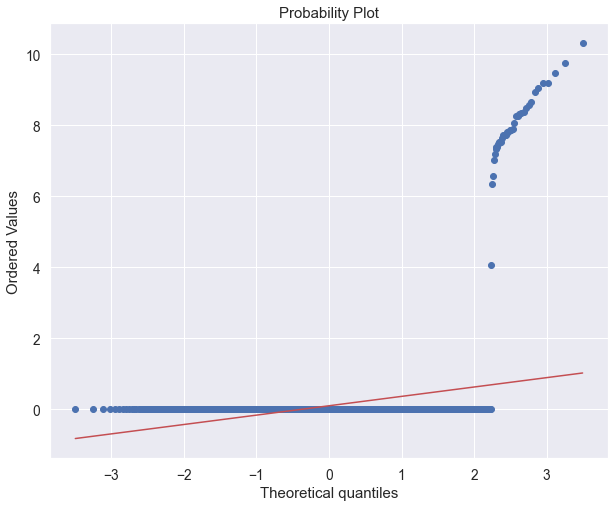

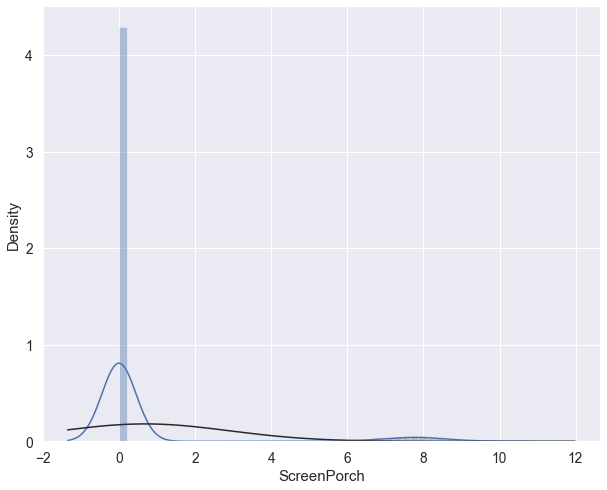

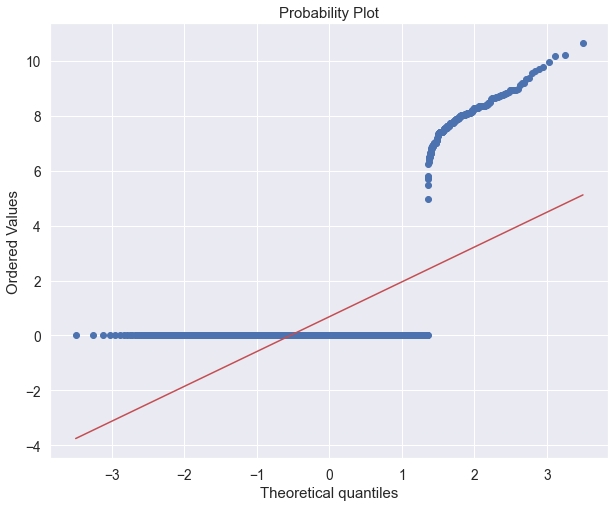

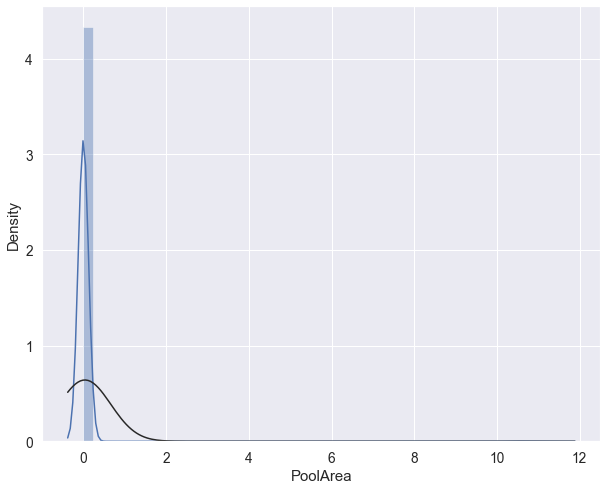

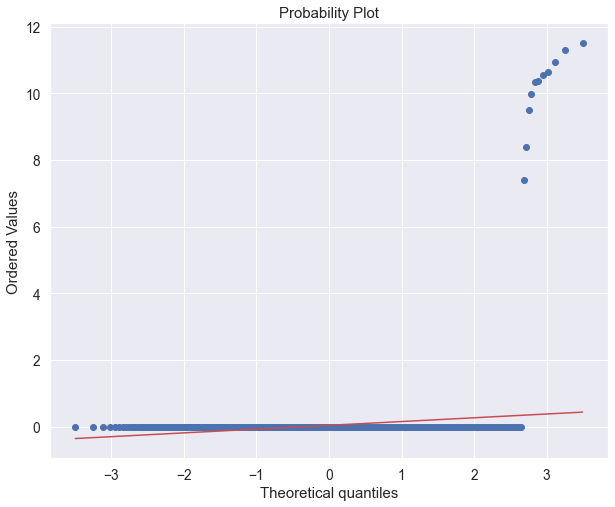

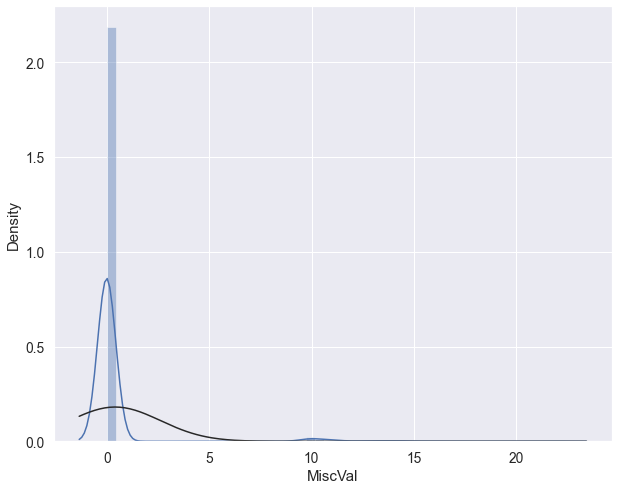

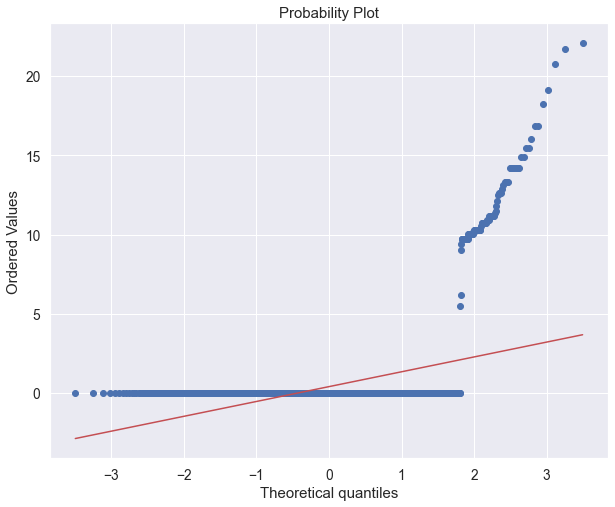

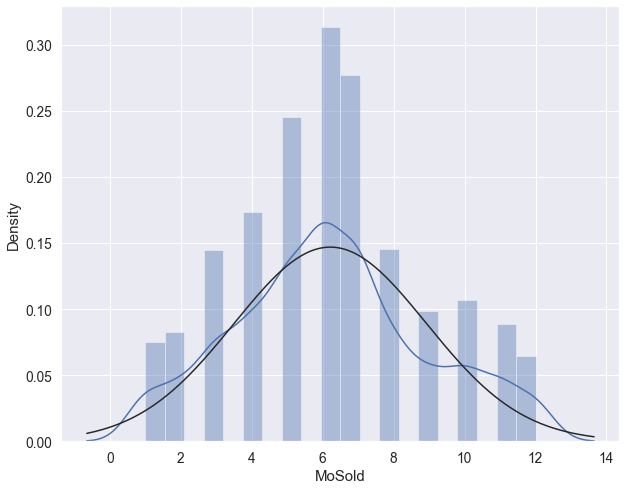

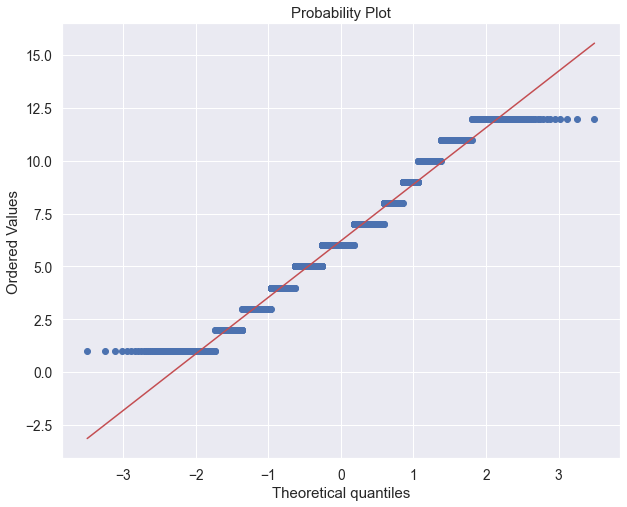

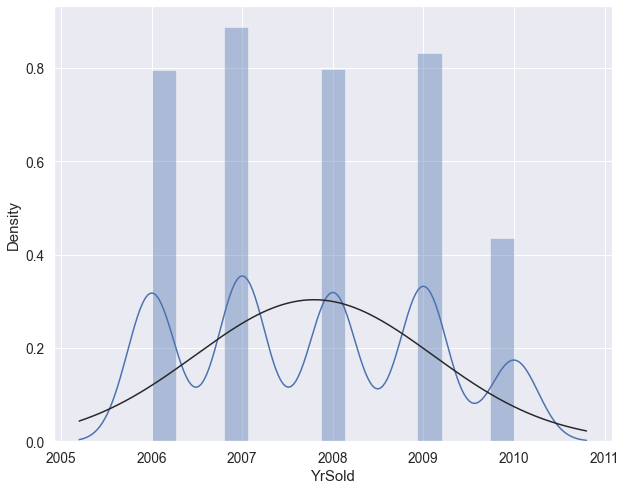

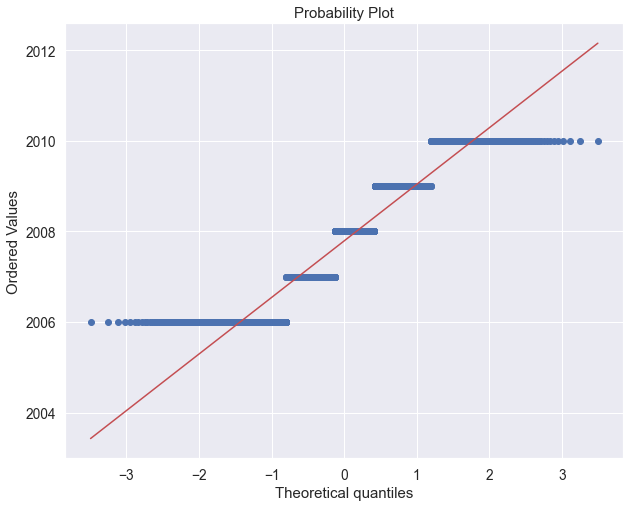

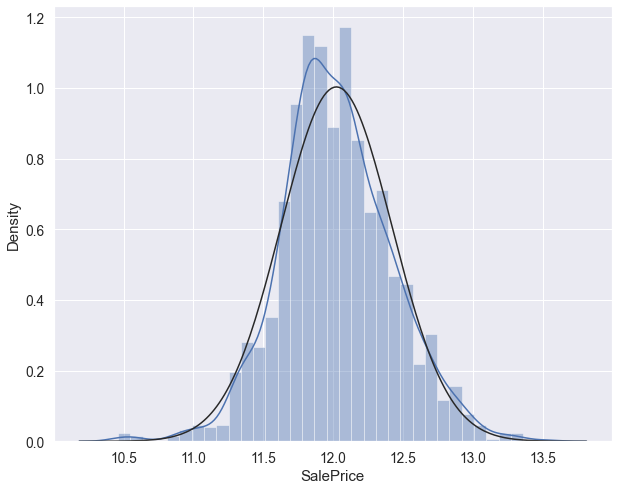

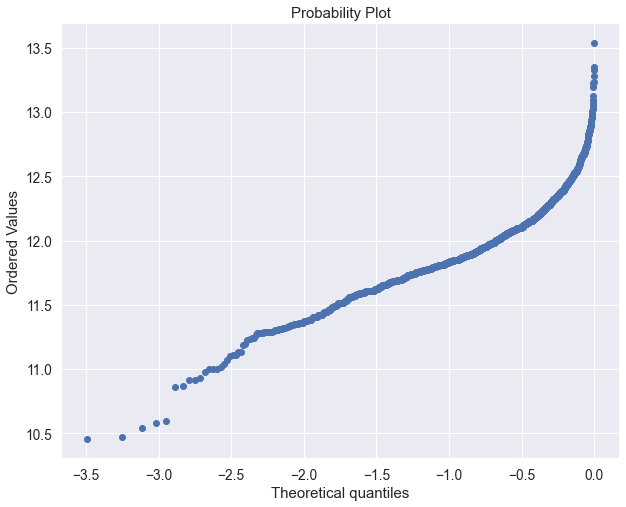

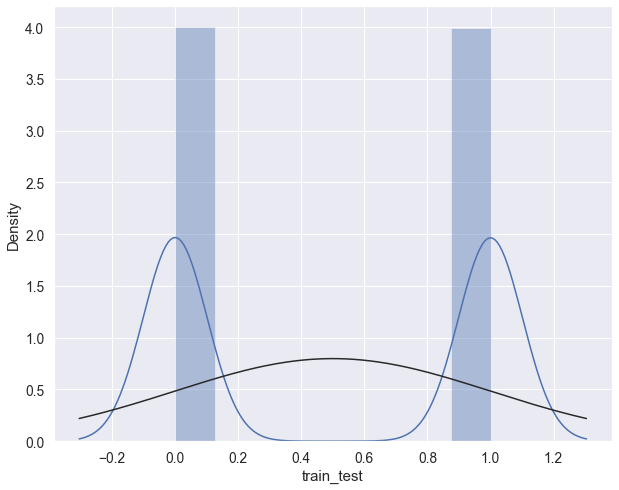

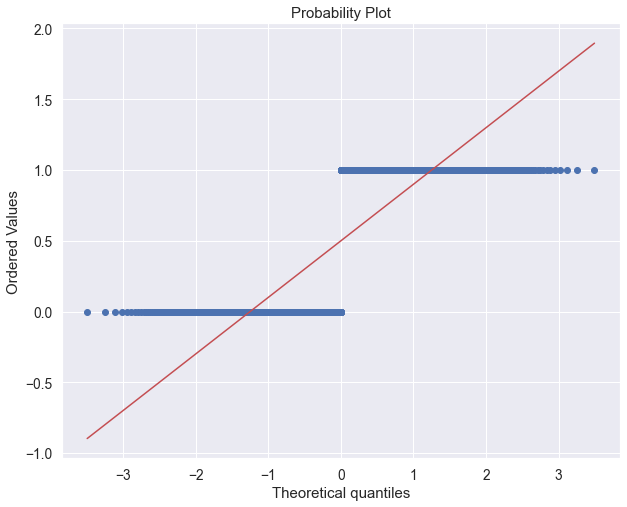

In [39]:
# PLOTTING THE NUMERICAL COLUMNS AFTER SKEWNESS
all_data_numeric = all_data.loc[:, all_data.dtypes != np.object]
for i in all_data_numeric:
    fig = plt.figure()
    sns.distplot(all_data[i], fit=norm);
    fig = plt.figure()
    res = stats.probplot(all_data[i], plot=plt)

# done with skewness

### scaling and one-hot encoding

In [40]:
# cleaning_data
# all_data_clean = clean_data (all_data, 0.0002)
# all_data_clean['SalePrice'] = all_data['SalePrice']
from sklearn.preprocessing import MinMaxScaler
  
scaler= MinMaxScaler()
# getting dummies

all_data_dummied = pd.get_dummies(all_data)
all_data_dummied = all_data_dummied.reset_index(drop=True)

# normalizing data with min_max scaler
# we normalized all columns except for 'Id' and 'SalePrice'
cols = all_data_dummied.columns[~all_data_dummied.columns.isin(['SalePrice', 'Id'])]
all_data_scaled = scaler.fit_transform (all_data_dummied.loc[ : , cols])
all_data_scaled = pd.DataFrame(all_data_scaled, columns = cols)
all_data_scaled ['SalePrice'] = all_data_dummied['SalePrice']
all_data_scaled ['Id'] = all_data_dummied['Id']
all_data_scaled





MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
0       0.441827     0.365634  0.281320     0.666667        0.500   0.949275   
1       0.000000     0.440709  0.303531     0.555556        0.875   0.753623   
2       0.441827     0.381734  0.331740     0.666667        0.500   0.934783   
3       0.510671     0.337362  0.302614     0.666667        0.500   0.311594   
4       0.441827     0.458718  0.375179     0.777778        0.500   0.927536   
...          ...          ...       ...          ...          ...        ...   
2911    0.910239     0.000000  0.053412     0.333333        0.750   0.710145   
2912    0.910239     0.000000  0.050387     0.333333        0.500   0.710145   
2913    0.000000     0.710069  0.439894     0.444444        0.750   0.637681   
2914    0.599862     0.348899  0.318383     0.444444        0.500   0.869565   
2915    0.441827     0.412225  0.304025     0.666667        0.500   0.876812   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  SaleType_Oth  \
0         0.883333    0.597109    0.678012         0.0  ...           0.0   
1         0.433333    0.000000    0.732185         0.0  ...           0.0   
2         0.866667    0.566540    0.619137         0.0  ...           0.0   
3         0.333333    0.000000    0.502228         0.0  ...           0.0   
4         0.833333    0.695850    0.665922         0.0  ...           0.0   
...            ...         ...         ...         ...  ...           ...   
2911      0.333333    0.000000    0.000000         0.0  ...           0.0   
2912      0.333333    0.000000    0.523350         0.0  ...           0.0   
2913      0.766667    0.000000    0.771061         0.0  ...           0.0   
2914      0.700000    0.000000    0.564559         0.0  ...           0.0   
2915      0.733333    0.484047    0.689600         0.0  ...           0.0   

      SaleType_WD  SaleCondition_Abnorml  SaleCondition_AdjLand  \
0             1.0                    0.0                    0.0   
1             1.0                    0.0                    0.0   
2             1.0                    0.0                    0.0   
3             1.0                    1.0                    0.0   
4             1.0                    0.0                    0.0   
...           ...                    ...                    ...   
2911          1.0                    0.0                    0.0   
2912          1.0                    1.0                    0.0   
2913          1.0                    1.0                    0.0   
2914          1.0                    0.0                    0.0   
2915          1.0                    0.0                    0.0   

      SaleCondition_Alloca  SaleCondition_Family  SaleCondition_Normal  \
0                      0.0                   0.0                   1.0   
1                      0.0                   0.0                   1.0   
2                      0.0                   0.0                   1.0   
3                      0.0                   0.0                   0.0   
4                      0.0                   0.0                   1.0   
...                    ...                   ...                   ...   
2911                   0.0                   0.0                   1.0   
2912                   0.0                   0.0                   0.0   
2913                   0.0                   0.0                   0.0   
2914                   0.0                   0.0                   1.0   
2915                   0.0                   0.0                   1.0   

      SaleCondition_Partial  SalePrice    Id  
0                       0.0  12.247699     1  
1                       0.0  12.109016     2  
2                       0.0  12.317171     3  
3                       0.0  11.849405     4  
4                       0.0  12.429220     5  
...                     ...        ...   ...  
2911                    0.0        NaN  2915  
2912                    0.0        NaN  2916  
291

### separating train and test data

In [41]:
train_f = all_data_scaled[all_data_scaled['train_test']==1].drop(['train_test'], axis =1)
test_f = all_data_scaled[all_data_scaled['train_test']==0].drop(['train_test', 'SalePrice'], axis =1)
# test_f.drop()


### preparation of train and test dataframes

In [42]:
#now we train a RF model on our training data to use it on test Data later on
from sklearn.model_selection import cross_val_score
# rf_model = RandomForestRegressor ()
from sklearn.ensemble import RandomForestRegressor
X = train_f.drop (['Id', 'SalePrice'], axis = 1)
y = train_f ['SalePrice']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor()
rf_model.fit (X, y)

cvs = cross_val_score (rf_model, X, y, cv = 5)
print (cvs)
print (cvs.mean())

[0.87384242 0.89126809 0.87204804 0.88822743 0.8726873 ]
0.8796146557040526


In [43]:

# from sklearn.metrics import mean_absolute_error as MAE
X_f = test_f.drop (['Id'], axis = 1)
# # X_f
# y_pred = rf_model.predict (X_f)
# # print('sklearn MAE = ', MAE(test_f.Id, y_pred))

# MODEL CREATION

In [44]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from math import sqrt
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X)
    rmse= np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

# we start model creations

In [45]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

####  here we just name our models and assign parameters.

In [46]:
rf_model = RandomForestRegressor(n_estimators = 1000)

In [47]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

In [48]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

In [49]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

In [50]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

In [51]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

In [52]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [53]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)

### using the above class, we include our7 models to predict and then we average theoutput.

In [54]:
averaged_models = AveragingModels(models = (model_xgb, GBoost, lasso, model_lgb, KRR, ENet, rf_model))

score = rmsle_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

[20:59:54] WARNING: ..\src\learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[21:00:32] WARNING: ..\src\lea

In [55]:
averaged_models.fit(X, y)

[21:03:03] WARNING: ..\src\learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


AveragingModels(models=(XGBRegressor(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.4603,
                                     enable_categorical=False, gamma=0.0468,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.05, max_delta_step=None,
                                     max_depth=3, min_child_weight=1.7817,
                                     missing=nan, monotone_constraints=None,
                                     n_...
                                      learning_rate=0.05, max_bin=55,
                                      min_data_in_leaf=6,
                                      min_sum_hessian_in_leaf=11,
                                      n_estimators=720, num_leaves

In [56]:
# in this cell, we explicitly define X, y and train and predict our average_model to get the final output, and save it as a csv file for submission.
X = train_f.drop (['Id', 'SalePrice'], axis = 1)
y = train_f ['SalePrice']
averaged_models.fit(X, y)
X_f = test_f.drop (['Id'], axis = 1)
# X_f = test_f.drop[['Id'], inplace = True]
y_pred = np.expm1(averaged_models.predict(X_f))
result_1 = {'Id': test_f['Id'], 'SalePrice': y_pred}
result_1 = pd.DataFrame.from_dict(result_1)
result_1.to_csv('result_4.csv', index = False)

[21:03:49] WARNING: ..\src\learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




In [57]:
y_pred

array([123155.33216415, 155189.50002786, 185196.20693127, ...,
       163519.28887379, 118207.66915299, 222083.38984323])

# our y_pred got into the top 10% of the competition results in kaggle.